# Problem Statement

BCCI has hired an external analytics consulting firm for data analytics. The major objective of
this tie up is to extract actionable insights from the historical match data and make strategic
changes to make India win. Primary objective is to create Machine Learning models which
correctly predicts a win for the Indian Cricket Team. Once a model is developed then you have
to extract actionable insights and recommendation.
Also, below are the details of the next 10 matches, India is going to play. You have to predict the
result of the matches and if you are getting prediction as a Loss then suggest some changes and
re-run your model again until you are getting Win as a prediction. You cannot use the same
strategy in the entire series, because opponent will get to know your strategy and they can come
with counter strategy. Hence for all the below 5 matches you have to suggest unique strategies to
make India win. The suggestions should be in-line with the variables that have been mentioned
in the given data set. Do consider the feasibility of the suggestions very carefully as well.
1. 1 Test match with England in England. All the match are day matches. In England, it will be
rainy season at the time to match.
2. 2 T20 match with Australia in India. All the match are Day and Night matches. In India, it will
be winter season at the time to match.
3. 2 ODI match with Sri Lanka in India. All the match are Day and Night matches. In India, it
will be winter season at the time to match.

Variables	Description

Game_number	Unique ID for each match

Result	Final result of the match

Avg_team_Age	Average age of the playing 11 players for that match

Match_light_type	type of match: Day, night or day & night

Match_format	Format of the match: T20, ODI or test

Bowlers_in_team	how many full time bowlers has been player in the team

Wicket_keeper_in_team	how many full time wicket keeper has been player in the team

All_rounder_in_team	how many full time all rounder has been player in the team

First_selection	First inning of team: batting or bowling

Opponent	Opponent team in the match

Season	What is the season of the city, where match has been played

Audience_number	Total number of audience in the stadium

Offshore	Match played within country or outside of the country

Max_run_scored_1over	Maximum run scored in 1 over by team

Max_wicket_taken_1over	Maximum wicket taken in 1 over by team

Extra_bowls_bowled	Total number of extras bowled by team

Min_run_given_1over	Minimum run given by the bowler in one over

Min_run_scored_1over	Minimum run scored in 1 over by team

Max_run_given_1over	Maximum run given by the bowler in one over

extra_bowls_opponent	Total number of extras bowled by opponent

player_highest_run	Highest score in the match by one player

Players_scored_zero	Number of player out on zero run

player_highest_wicket	Highest wickets taken by single player in match

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
win_pred= pd.read_excel('Sports Data.xlsx','Sports data for DSBA')

In [4]:
win_pred.head()

Game_number Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1   Loss          18.0              Day          ODI   
1      Game_2    Win          24.0              Day          T20   
2      Game_3   Loss          24.0    Day and Night          T20   
3      Game_4    Win          24.0              NaN          ODI   
4      Game_5   Loss          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

  First_selection  Opponent  ... Max_run_scored_1over  Max_wicket_taken_1over  \
0         Bowling  Srilanka  ...                 13.0                       3   
1         Batting  Zimbabwe  ...                 12.0                       1   
2         Bowling  Zimbabwe  ...                 14.0                       4   
3         Bowling     Kenya  ...                 15.0                       4   
4         Bowling  Srilanka  ...                 12.0                       4   

  Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
0                0.0                    2                   3.0   
1                0.0                    0                   3.0   
2                0.0                    0                   3.0   
3                0.0                    2                   3.0   
4                0.0                    0                   3.0   

   Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
0                  6.0                     0                54.0   
1                  6.0                     0                69.0   
2                  6.0                     0                69.0   
3                  6.0                     0                73.0   
4                  6.0                     0                80.0   

   Players_scored_zero  player_highest_wicket  
0                    3                      1  
1                    2                      1  
2                    3                      1  
3                    3                      1  
4                    3                      1  

[5 rows x 23 columns]

In [5]:
pd.options.display.max_columns = None

In [6]:
win_pred.head()

Game_number Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1   Loss          18.0              Day          ODI   
1      Game_2    Win          24.0              Day          T20   
2      Game_3   Loss          24.0    Day and Night          T20   
3      Game_4    Win          24.0              NaN          ODI   
4      Game_5   Loss          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

  First_selection  Opponent  Season  Audience_number Offshore  \
0         Bowling  Srilanka  Summer           9940.0       No   
1         Batting  Zimbabwe  Summer           8400.0       No   
2         Bowling  Zimbabwe     NaN          13146.0      Yes   
3         Bowling     Kenya  Summer           7357.0       No   
4         Bowling  Srilanka  Summer          13328.0       No   

   Max_run_scored_1over  Max_wicket_taken_1over  Extra_bowls_bowled  \
0                  13.0                       3                 0.0   
1                  12.0                       1                 0.0   
2                  14.0                       4                 0.0   
3                  15.0                       4                 0.0   
4                  12.0                       4                 0.0   

   Min_run_given_1over  Min_run_scored_1over  Max_run_given_1over  \
0                    2                   3.0                  6.0   
1                    0                   3.0                  6.0   
2                    0                   3.0                  6.0   
3                    2                   3.0                  6.0   
4                    0                   3.0                  6.0   

   extra_bowls_opponent  player_highest_run Players_scored_zero  \
0                     0                54.0                   3   
1                     0                69.0                   2   
2                     0                69.0                   3   
3                     0                73.0                   3   
4                     0                80.0                   3   

  player_highest_wicket  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [7]:
win_pred.tail()

Game_number Result  Avg_team_Age Match_light_type Match_format  \
2925   Game_2926    Win          30.0              Day          T20   
2926   Game_2927    Win          30.0              Day          ODI   
2927   Game_2928    Win          30.0    Day and Night          ODI   
2928   Game_2929    Win          30.0              Day          ODI   
2929   Game_2930    Win          30.0              Day          ODI   

      Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
2925              3.0                      1                  4.0   
2926              4.0                      1                  3.0   
2927              4.0                      1                  3.0   
2928              4.0                      1                  3.0   
2929              4.0                      1                  3.0   

     First_selection      Opponent  Season  Audience_number Offshore  \
2925         Batting  South Africa  Summer          33950.0       No   
2926         Bowling         Kenya  Summer          19663.0       No   
2927         Bowling      Pakistan   Rainy          39823.0      Yes   
2928         Batting         Kenya   Rainy          14007.0       No   
2929         Batting         Kenya   Rainy          20839.0       No   

      Max_run_scored_1over  Max_wicket_taken_1over  Extra_bowls_bowled  \
2925                  15.0                       3                 8.0   
2926                  14.0                       4                 8.0   
2927                  14.0                       4                10.0   
2928                  14.0                       2                20.0   
2929                  12.0                       4                 4.0   

      Min_run_given_1over  Min_run_scored_1over  Max_run_given_1over  \
2925                    0                   3.0                  6.0   
2926                    2                   3.0                  6.0   
2927                    2                   4.0                 10.0   
2928                    2                   3.0                  6.0   
2929                    5                   3.0                  6.0   

      extra_bowls_opponent  player_highest_run Players_scored_zero  \
2925                     3                50.0                   3   
2926                     2                52.0                   2   
2927                     2                80.0                   3   
2928                     3                98.0                   3   
2929                     3                62.0                   1   

     player_highest_wicket  
2925                     2  
2926                     1  
2927                     2  
2928                     1  
2929                     1

In [8]:
print(f'The shape of the dataset has {win_pred.shape[0]} rows and {win_pred.shape[1]} columns')

The shape of the dataset has 2930 rows and 23 columns


In [9]:
win_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [10]:
win_pred.describe().T

count          mean           std     min      25%  \
Avg_team_Age            2833.0     29.242852      2.264230    12.0     30.0   
Bowlers_in_team         2848.0      2.913624      1.023907     1.0      2.0   
Wicket_keeper_in_team   2930.0      1.000000      0.000000     1.0      1.0   
All_rounder_in_team     2890.0      2.722491      1.092699     1.0      2.0   
Audience_number         2849.0  46267.960688  48599.581459  7063.0  20363.0   
Max_run_scored_1over    2902.0     15.199862      3.661010    11.0     12.0   
Max_wicket_taken_1over  2930.0      2.713993      1.080623     1.0      2.0   
Extra_bowls_bowled      2901.0     11.252671      7.780829     0.0      6.0   
Min_run_given_1over     2930.0      1.952560      1.678332     0.0      0.0   
Min_run_scored_1over    2903.0      2.762659      0.705759     1.0      2.0   
Max_run_given_1over     2896.0      8.669199      5.003525     6.0      6.0   
extra_bowls_opponent    2930.0      4.229693      3.626108     0.0      2.0   
player_highest_run      2902.0     65.889387     20.331614    30.0     48.0   

                            50%       75%        max  
Avg_team_Age               30.0     30.00       70.0  
Bowlers_in_team             3.0      4.00        5.0  
Wicket_keeper_in_team       1.0      1.00        1.0  
All_rounder_in_team         3.0      4.00        4.0  
Audience_number         34349.0  57876.00  1399930.0  
Max_run_scored_1over       14.0     18.00       25.0  
Max_wicket_taken_1over      3.0      4.00        4.0  
Extra_bowls_bowled         10.0     15.00       40.0  
Min_run_given_1over         2.0      3.00        6.0  
Min_run_scored_1over        3.0      3.00        4.0  
Max_run_given_1over         6.0      9.25       40.0  
extra_bowls_opponent        3.0      7.00       18.0  
player_highest_run         66.0     84.00      100.0

In [11]:
win_pred.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [12]:
for col in win_pred.columns:
    unique_values = win_pred[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Game_number': ['Game_1' 'Game_2' 'Game_3' ... 'Game_2928' 'Game_2929' 'Game_2930']
Unique values in column 'Result': ['Loss' 'Win']
Unique values in column 'Avg_team_Age': [18. 24. nan 17. 12. 25. 26. 27. 28. 29. 30. 70. 69. 50.]
Unique values in column 'Match_light_type': ['Day' 'Day and Night' nan 'Night']
Unique values in column 'Match_format': ['ODI' 'T20' 'Test' '20-20' nan]
Unique values in column 'Bowlers_in_team': [ 3.  2.  1. nan  4.  5.]
Unique values in column 'Wicket_keeper_in_team': [1]
Unique values in column 'All_rounder_in_team': [ 3.  4.  2.  1. nan]
Unique values in column 'First_selection': ['Bowling' 'Batting' 'Bat' nan]
Unique values in column 'Opponent': ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh' nan]
Unique values in column 'Season': ['Summer' nan 'Winter' 'Rainy']
Unique values in column 'Audience_number': [ 9940.  8400. 13146. ... 20937. 28756. 14007.]
Unique values in colu

In [13]:
# Drop rows where Avg_team_Age is greater than 50
win_pred = win_pred[win_pred['Avg_team_Age'] < 50]

In [14]:
# Replace 'three' with 3 in the 'Players_scored_zero' column (if it exists)
win_pred['Players_scored_zero'] = win_pred['Players_scored_zero'].replace('Three', 3)
win_pred['Players_scored_zero'] = win_pred['Players_scored_zero'].astype(int)

In [15]:
win_pred['player_highest_wicket'] = win_pred['player_highest_wicket'].replace('Three', 3)
win_pred['player_highest_wicket'] = win_pred['player_highest_wicket'].astype(int)

In [16]:
win_pred['Match_format'] = win_pred['Match_format'].replace('20-20', 'T20')
win_pred['First_selection'] = win_pred['First_selection'].replace('Bat', 'Batting')

In [17]:
for col in win_pred.columns:
    unique_values = win_pred[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Game_number': ['Game_1' 'Game_2' 'Game_3' ... 'Game_2928' 'Game_2929' 'Game_2930']
Unique values in column 'Result': ['Loss' 'Win']
Unique values in column 'Avg_team_Age': [18. 24. 17. 12. 25. 26. 27. 28. 29. 30.]
Unique values in column 'Match_light_type': ['Day' 'Day and Night' nan 'Night']
Unique values in column 'Match_format': ['ODI' 'T20' 'Test' nan]
Unique values in column 'Bowlers_in_team': [ 3.  2.  1.  4. nan  5.]
Unique values in column 'Wicket_keeper_in_team': [1]
Unique values in column 'All_rounder_in_team': [ 3.  4.  2.  1. nan]
Unique values in column 'First_selection': ['Bowling' 'Batting' nan]
Unique values in column 'Opponent': ['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh' nan]
Unique values in column 'Season': ['Summer' nan 'Winter' 'Rainy']
Unique values in column 'Audience_number': [ 9940.  8400. 13146. ... 28756. 61859. 14007.]
Unique values in column 'Offshore': ['No' 'Yes' nan

In [18]:
win_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2829 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2829 non-null   object 
 1   Result                  2829 non-null   object 
 2   Avg_team_Age            2829 non-null   float64
 3   Match_light_type        2777 non-null   object 
 4   Match_format            2759 non-null   object 
 5   Bowlers_in_team         2811 non-null   float64
 6   Wicket_keeper_in_team   2829 non-null   int64  
 7   All_rounder_in_team     2789 non-null   float64
 8   First_selection         2770 non-null   object 
 9   Opponent                2793 non-null   object 
 10  Season                  2767 non-null   object 
 11  Audience_number         2748 non-null   float64
 12  Offshore                2765 non-null   object 
 13  Max_run_scored_1over    2801 non-null   float64
 14  Max_wicket_taken_1over  2829 non-null   int64

In [19]:
from sklearn.impute import KNNImputer

# Identify columns with numerical data for KNN imputation
numerical_cols = win_pred.select_dtypes(include=np.number).columns

# Create a KNN imputer with k=5 (you can adjust this value)
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the numerical columns
win_pred[numerical_cols] = imputer.fit_transform(win_pred[numerical_cols])

# Now win_pred has imputed numerical columns
print(win_pred.isnull().sum())

Game_number                0
Result                     0
Avg_team_Age               0
Match_light_type          52
Match_format              70
Bowlers_in_team            0
Wicket_keeper_in_team      0
All_rounder_in_team        0
First_selection           59
Opponent                  36
Season                    62
Audience_number            0
Offshore                  64
Max_run_scored_1over       0
Max_wicket_taken_1over     0
Extra_bowls_bowled         0
Min_run_given_1over        0
Min_run_scored_1over       0
Max_run_given_1over        0
extra_bowls_opponent       0
player_highest_run         0
Players_scored_zero        0
player_highest_wicket      0
dtype: int64


In [20]:
# Drop rows with null values in 'Opponent'  columns
win_pred = win_pred.dropna(subset=['Opponent'])

# Verify the changes
print(win_pred.isnull().sum())

Game_number                0
Result                     0
Avg_team_Age               0
Match_light_type          52
Match_format              70
Bowlers_in_team            0
Wicket_keeper_in_team      0
All_rounder_in_team        0
First_selection           59
Opponent                   0
Season                    62
Audience_number            0
Offshore                  64
Max_run_scored_1over       0
Max_wicket_taken_1over     0
Extra_bowls_bowled         0
Min_run_given_1over        0
Min_run_scored_1over       0
Max_run_given_1over        0
extra_bowls_opponent       0
player_highest_run         0
Players_scored_zero        0
player_highest_wicket      0
dtype: int64


In [21]:
# Separate the dataset into train and test based on 'Match Format' null values
train_data = win_pred[win_pred['Match_format'].notnull()]
test_data = win_pred[win_pred['Match_format'].isnull()]

# Separate features (X) and target variable (y) for training
X_train = train_data.drop('Match_format', axis=1)
y_train = train_data['Match_format']

# Separate features (X) for testing
X_test = test_data.drop('Match_format', axis=1)

# Handle non-numerical columns in train and test sets
# Convert non-numerical columns to numerical using one-hot encoding or label encoding
# Example using pandas get_dummies for one-hot encoding (adjust as needed)

# Get a list of non-numerical columns (excluding the target 'Match_format')
non_numerical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Perform one-hot encoding on non-numerical columns
X_train = pd.get_dummies(X_train, columns=non_numerical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numerical_cols, drop_first=True) 

# Ensure both datasets have the same columns after one-hot encoding
# Align columns between X_train and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Choose a suitable model to predict 'Match Format' (e.g., RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42) # You can tune hyperparameters
model.fit(X_train, y_train)

# Predict the 'Match Format' for the test data
predicted_match_format = model.predict(X_test)



In [22]:
X_train

Avg_team_Age  Bowlers_in_team  Wicket_keeper_in_team  \
0             18.0              3.0                    1.0   
1             24.0              3.0                    1.0   
2             24.0              3.0                    1.0   
3             24.0              2.0                    1.0   
4             24.0              1.0                    1.0   
...            ...              ...                    ...   
2925          30.0              3.0                    1.0   
2926          30.0              4.0                    1.0   
2927          30.0              4.0                    1.0   
2928          30.0              4.0                    1.0   
2929          30.0              4.0                    1.0   

      All_rounder_in_team  Audience_number  Max_run_scored_1over  \
0                     3.0           9940.0                  13.0   
1                     4.0           8400.0                  12.0   
2                     2.0          13146.0                  14.0   
3                     2.0           7357.0                  15.0   
4                     3.0          13328.0                  12.0   
...                   ...              ...                   ...   
2925                  4.0          33950.0                  15.0   
2926                  3.0          19663.0                  14.0   
2927                  3.0          39823.0                  14.0   
2928                  3.0          14007.0                  14.0   
2929                  3.0          20839.0                  12.0   

      Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
0                        3.0                 0.0                  2.0   
1                        1.0                 0.0                  0.0   
2                        4.0                 0.0                  0.0   
3                        4.0                 0.0                  2.0   
4                        4.0                 0.0                  0.0   
...                      ...                 ...                  ...   
2925                     3.0                 8.0                  0.0   
2926                     4.0                 8.0                  2.0   
2927                     4.0                10.0                  2.0   
2928                     2.0                20.0                  2.0   
2929                     4.0                 4.0                  5.0   

      Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
0                      3.0                  6.0                   0.0   
1                      3.0                  6.0                   0.0   
2                      3.0                  6.0                   0.0   
3                      3.0                  6.0                   0.0   
4                      3.0                  6.0                   0.0   
...                    ...                  ...                   ...   
2925                   3.0                  6.0                   3.0   
2926                   3.0                  6.0                   2.0   
2927                   4.0                 10.0                   2.0   
2928                   3.0                  6.0                   3.0   
2929                   3.0                  6.0                   3.0   

      player_highest_run  Players_scored_zero  player_highest_wicket  \
0                   54.0                  3.0                    1.0   
1                   69.0                  2.0                    1.0   
2                   69.0                  3.0                    1.0   
3                   73.0                  3.0                    1.0   
4                   80.0                  3.0                    1.0   
...                  ...                  ...                    ...   
2925                50.0                  3.0                    2.0   
2926                52.0                  2.0                    1.0   
2927                80.0                  

In [23]:
predicted_match_format

array(['T20', 'ODI', 'ODI', 'ODI', 'ODI', 'T20', 'T20', 'T20', 'ODI',
       'ODI', 'ODI', 'T20', 'ODI', 'ODI', 'ODI', 'ODI', 'T20', 'T20',
       'ODI', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI', 'T20', 'ODI',
       'ODI', 'ODI', 'ODI', 'T20', 'T20', 'T20', 'ODI', 'ODI', 'ODI',
       'ODI', 'T20', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI',
       'ODI', 'T20', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI', 'ODI',
       'ODI', 'ODI', 'ODI', 'ODI', 'ODI', 'T20', 'ODI', 'T20', 'ODI',
       'ODI', 'ODI', 'Test', 'ODI', 'ODI', 'ODI', 'ODI'], dtype=object)

In [24]:
# Fill the null values in the original dataset with the predictions
win_pred.loc[win_pred['Match_format'].isnull(), 'Match_format'] = predicted_match_format

# Verify the changes (check if nulls in 'Match Format' are filled)
print(win_pred.isnull().sum())

Game_number                0
Result                     0
Avg_team_Age               0
Match_light_type          52
Match_format               0
Bowlers_in_team            0
Wicket_keeper_in_team      0
All_rounder_in_team        0
First_selection           59
Opponent                   0
Season                    62
Audience_number            0
Offshore                  64
Max_run_scored_1over       0
Max_wicket_taken_1over     0
Extra_bowls_bowled         0
Min_run_given_1over        0
Min_run_scored_1over       0
Max_run_given_1over        0
extra_bowls_opponent       0
player_highest_run         0
Players_scored_zero        0
player_highest_wicket      0
dtype: int64


In [25]:
# Calculate the mode for specified columns
for col in ['Offshore', 'Season', 'First_selection', 'Match_light_type']:
    try:
        mode_value = win_pred[col].mode()[0]  # Get the first mode if multiple exist
        print(f"Mode of {col}: {mode_value}")
    except KeyError:
        print(f"Column '{col}' not found in the DataFrame.")
    except IndexError:
        print(f"No mode found for column '{col}' (possibly all NaN values).")

Mode of Offshore: No
Mode of Season: Rainy
Mode of First_selection: Bowling
Mode of Match_light_type: Day


In [26]:
# Fill categorical columns with the mode
for col in win_pred.select_dtypes(exclude=np.number):
    win_pred[col] = win_pred[col].fillna(win_pred[col].mode()[0])

# Check for remaining null values
print(win_pred.isnull().sum())

Game_number               0
Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64


In [27]:
win_pred.describe().T

count          mean           std     min      25%  \
Avg_team_Age            2793.0     29.182241      1.810729    12.0     30.0   
Bowlers_in_team         2793.0      2.903187      1.022607     1.0      2.0   
Wicket_keeper_in_team   2793.0      1.000000      0.000000     1.0      1.0   
All_rounder_in_team     2793.0      2.717150      1.084679     1.0      2.0   
Audience_number         2793.0  46204.802005  48763.930610  7063.0  20328.0   
Max_run_scored_1over    2793.0     15.215610      3.656942    11.0     12.0   
Max_wicket_taken_1over  2793.0      2.721805      1.081699     1.0      2.0   
Extra_bowls_bowled      2793.0     11.257429      7.775540     0.0      6.0   
Min_run_given_1over     2793.0      1.963122      1.685434     0.0      0.0   
Min_run_scored_1over    2793.0      2.765127      0.702901     1.0      2.0   
Max_run_given_1over     2793.0      8.663086      4.978249     6.0      6.0   
extra_bowls_opponent    2793.0      4.221984      3.621528     0.0      2.0   
player_highest_run      2793.0     65.806731     20.204815    30.0     48.0   
Players_scored_zero     2793.0      2.728965      0.707569     1.0      2.0   
player_highest_wicket   2793.0      2.057644      1.107690     1.0      1.0   

                            50%      75%        max  
Avg_team_Age               30.0     30.0       30.0  
Bowlers_in_team             3.0      4.0        5.0  
Wicket_keeper_in_team       1.0      1.0        1.0  
All_rounder_in_team         3.0      4.0        4.0  
Audience_number         34552.0  57568.0  1399930.0  
Max_run_scored_1over       14.0     18.0       25.0  
Max_wicket_taken_1over      3.0      4.0        4.0  
Extra_bowls_bowled         10.0     15.0       40.0  
Min_run_given_1over         2.0      3.0        6.0  
Min_run_scored_1over        3.0      3.0        4.0  
Max_run_given_1over         6.0      9.0       40.0  
extra_bowls_opponent        3.0      7.0       18.0  
player_highest_run         66.0     83.0      100.0  
Players_scored_zero         3.0      3.0        4.0  
player_highest_wicket       2.0      3.0        5.0

In [28]:
win_pred['Bowlers_in_team'] = win_pred['Bowlers_in_team'].round()
win_pred['Bowlers_in_team'] = win_pred['Bowlers_in_team'].astype(int)

win_pred['All_rounder_in_team'] = win_pred['All_rounder_in_team'].round()
win_pred['All_rounder_in_team'] = win_pred['All_rounder_in_team'].astype(int)

win_pred['Max_run_scored_1over'] = win_pred['Max_run_scored_1over'].round()
win_pred['Max_run_scored_1over'] = win_pred['Max_run_scored_1over'].astype(int)

win_pred['Extra_bowls_bowled'] = win_pred['Extra_bowls_bowled'].round()
win_pred['Extra_bowls_bowled'] = win_pred['Extra_bowls_bowled'].astype(int)

win_pred['Min_run_scored_1over'] = win_pred['Min_run_scored_1over'].round()
win_pred['Min_run_scored_1over'] = win_pred['Min_run_scored_1over'].astype(int)

win_pred['Max_run_given_1over'] = win_pred['Max_run_given_1over'].round()
win_pred['Max_run_given_1over'] = win_pred['Max_run_given_1over'].astype(int)

win_pred['Wicket_keeper_in_team'] = win_pred['Wicket_keeper_in_team'].astype(int)
win_pred['Max_wicket_taken_1over'] = win_pred['Max_wicket_taken_1over'].astype(int)
win_pred['extra_bowls_opponent'] = win_pred['extra_bowls_opponent'].astype(int)

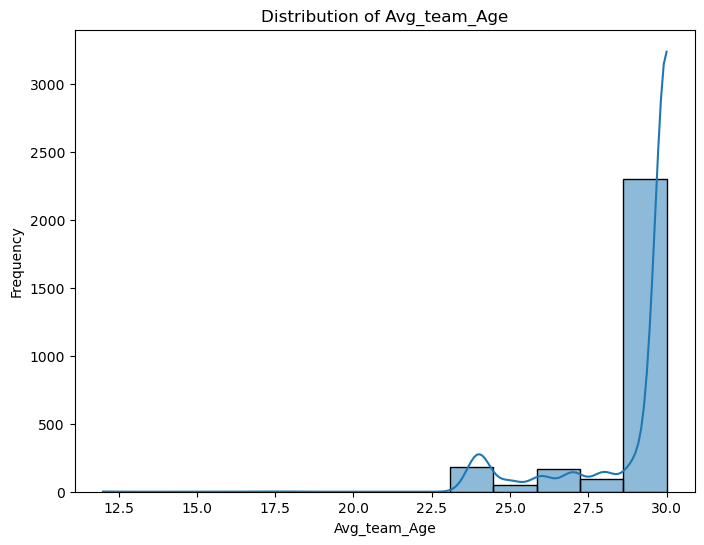

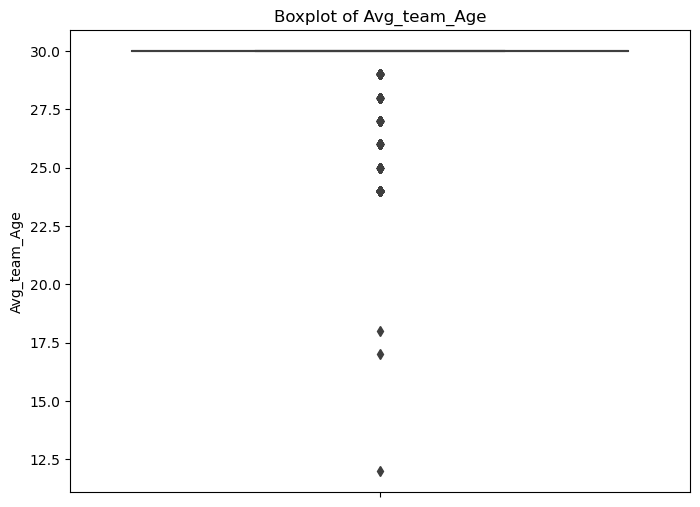

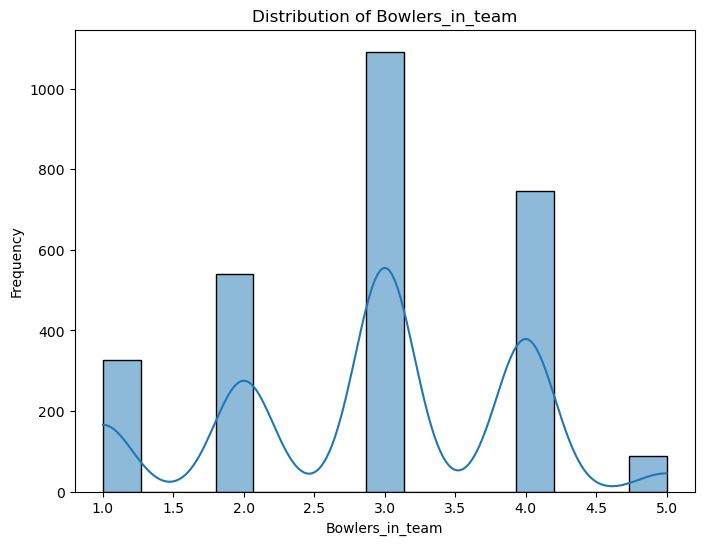

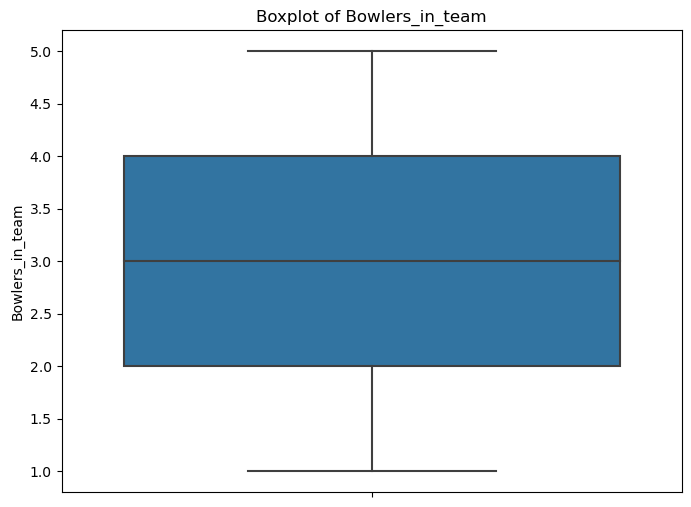

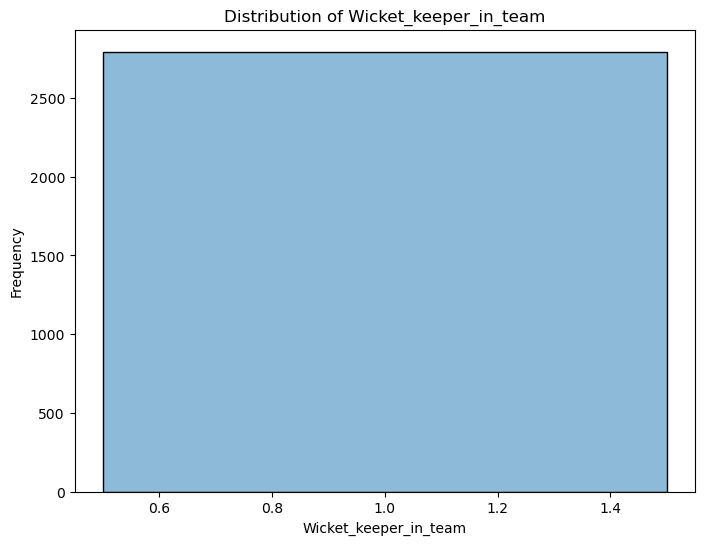

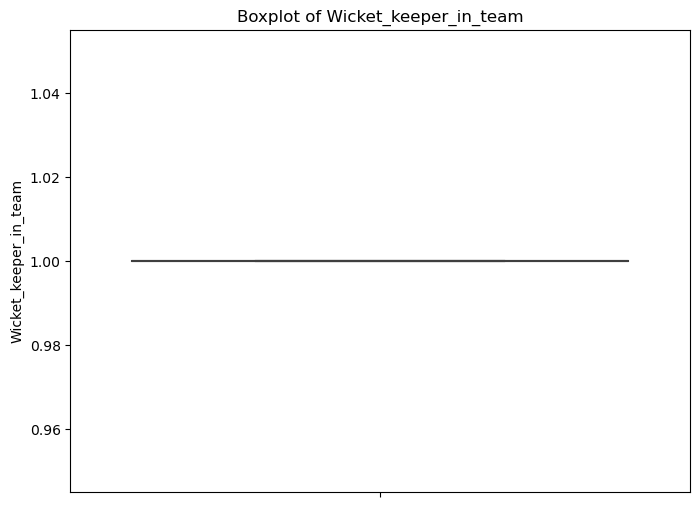

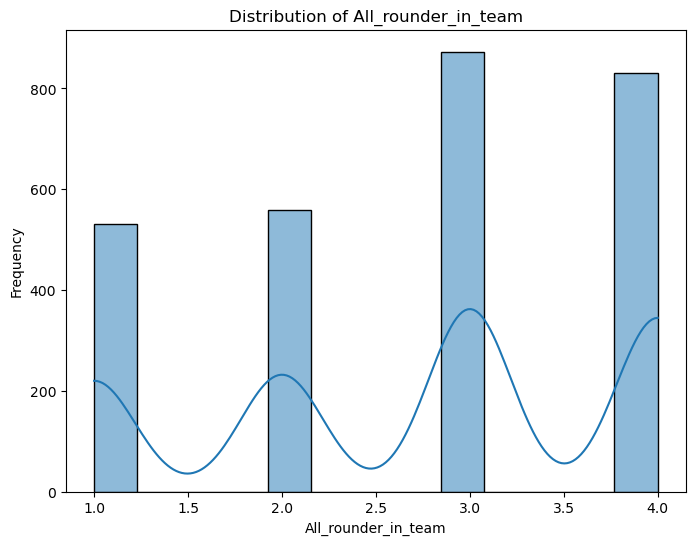

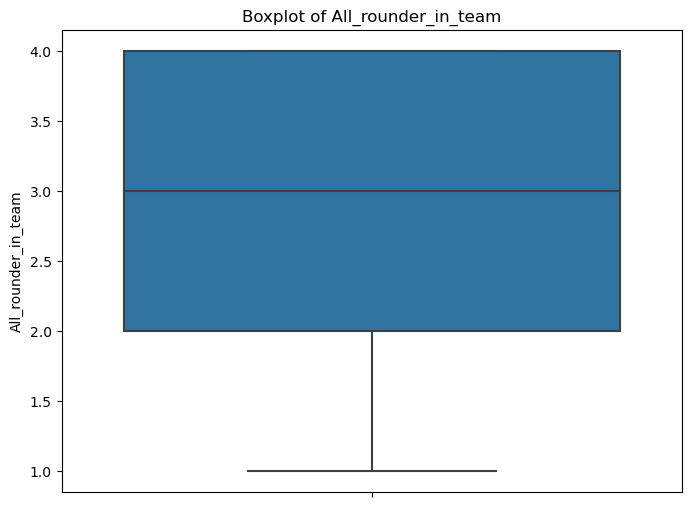

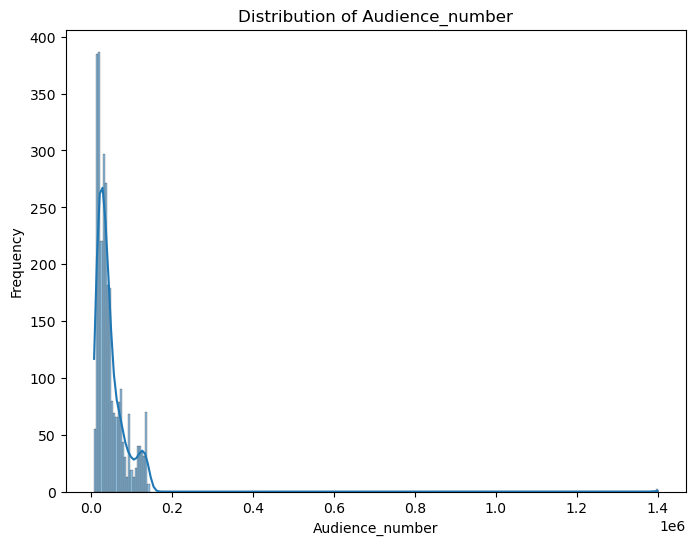

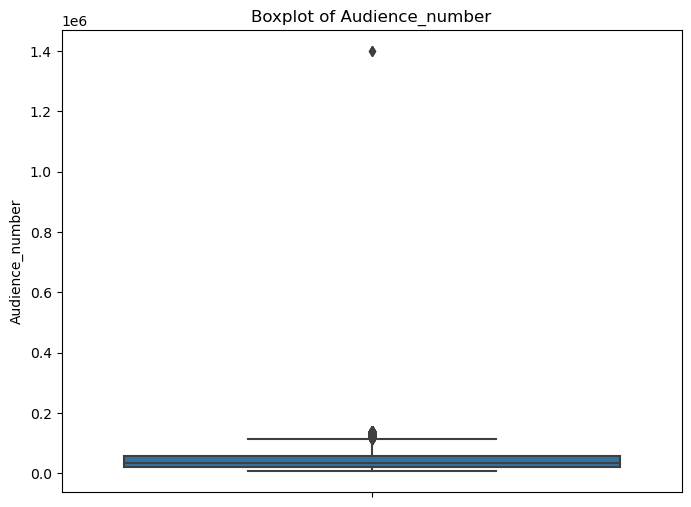

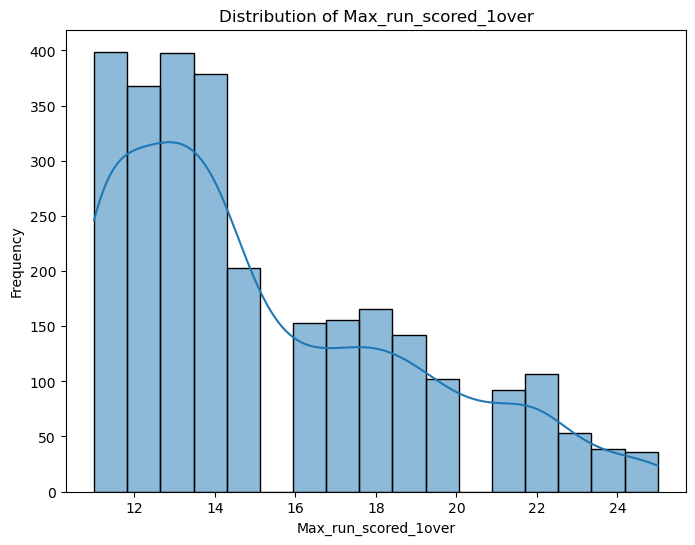

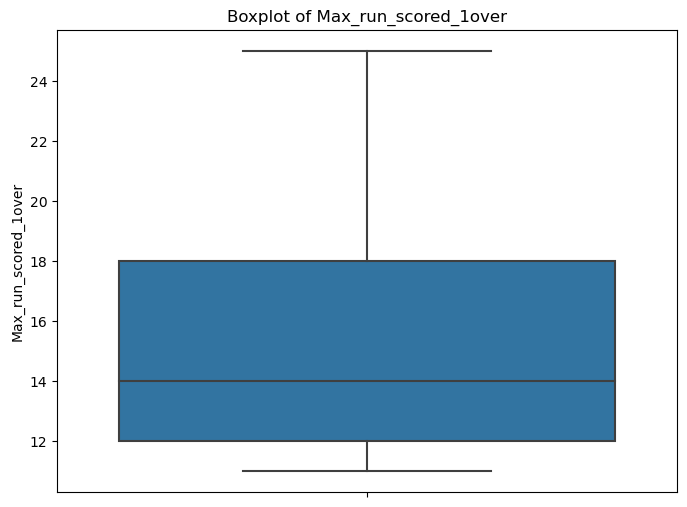

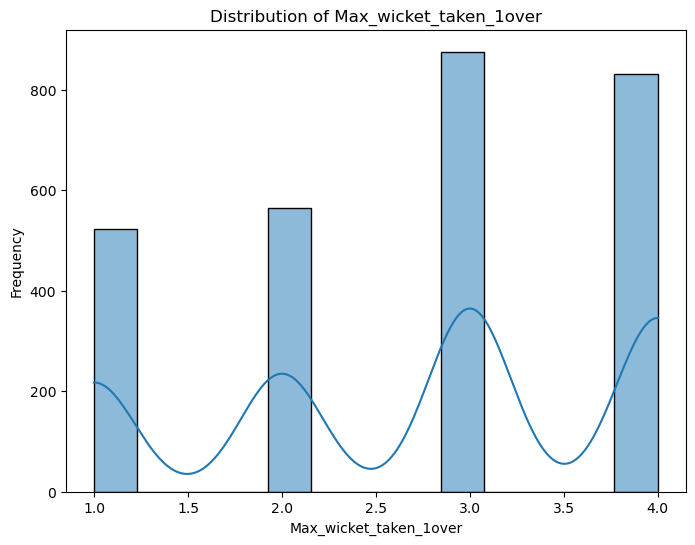

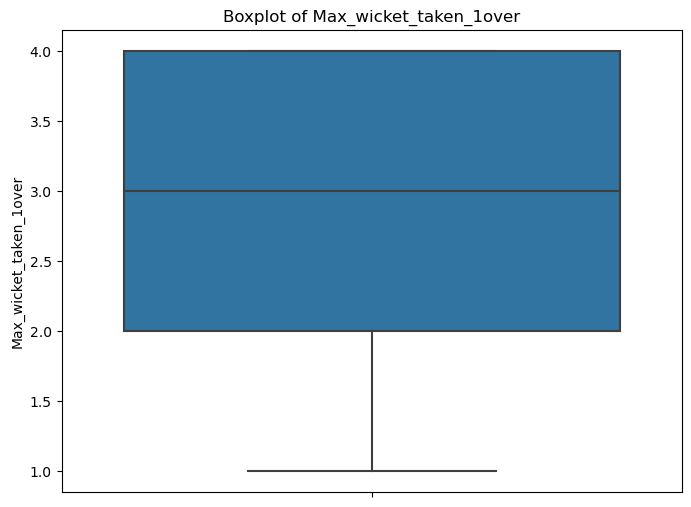

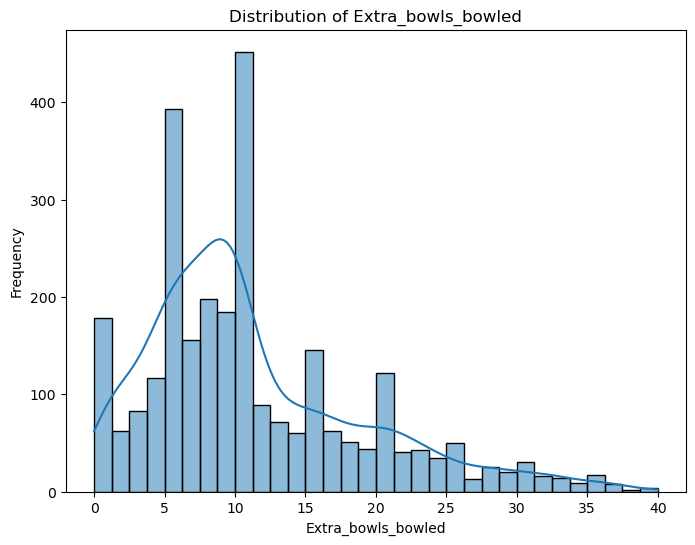

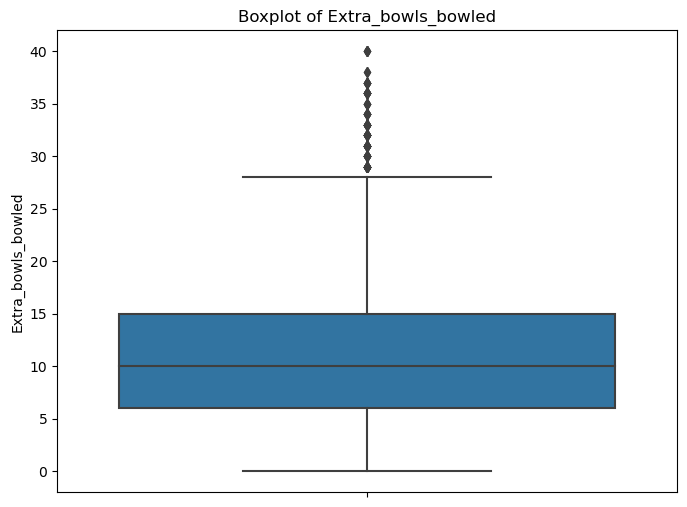

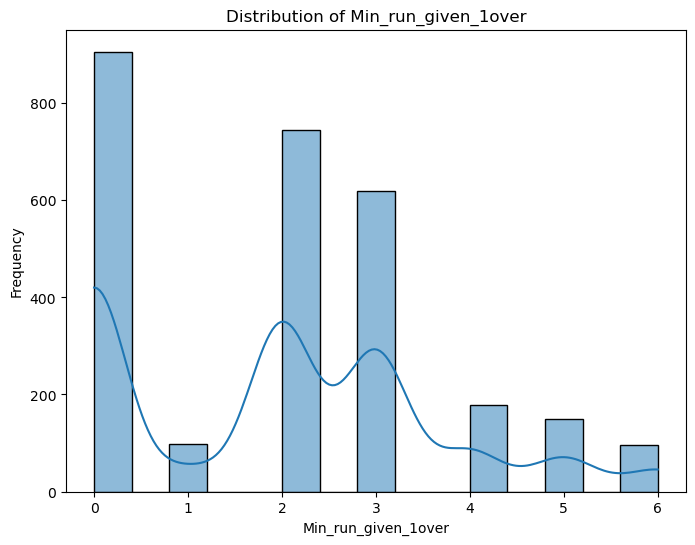

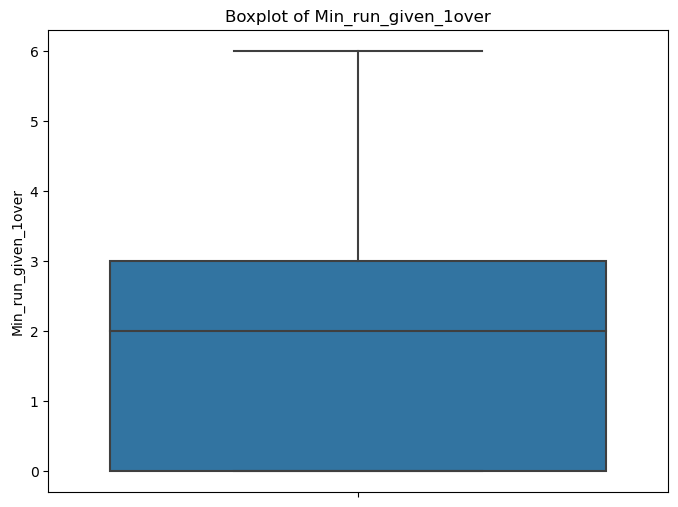

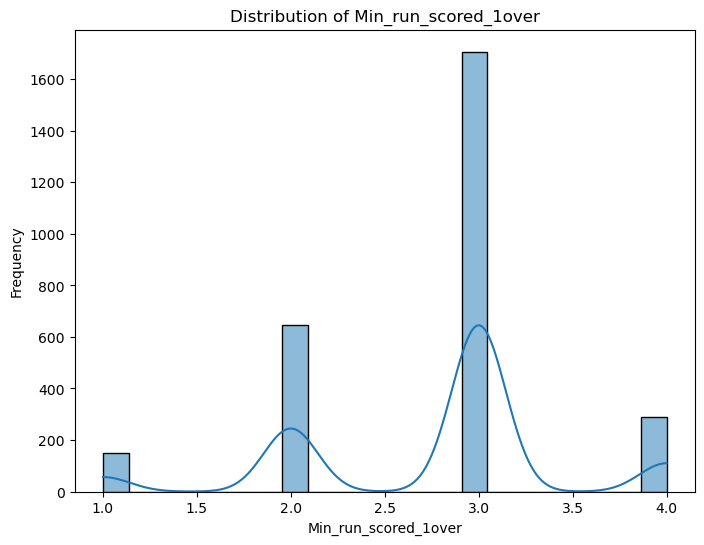

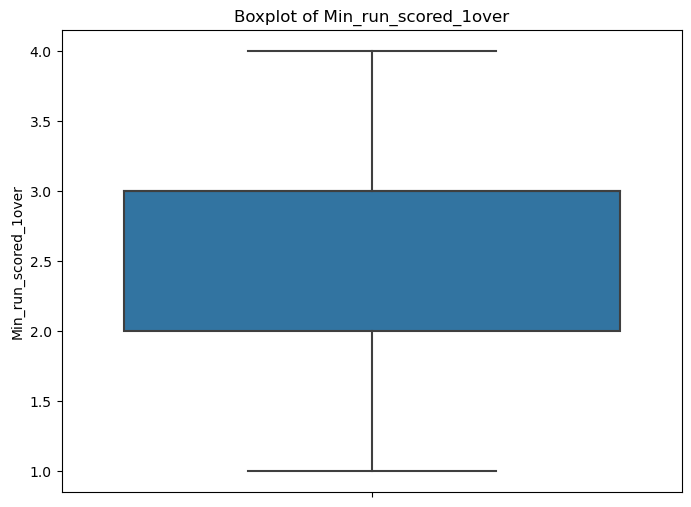

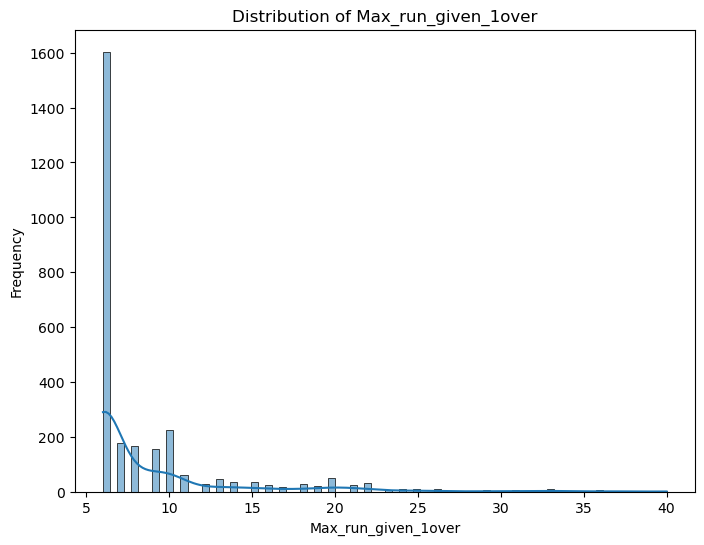

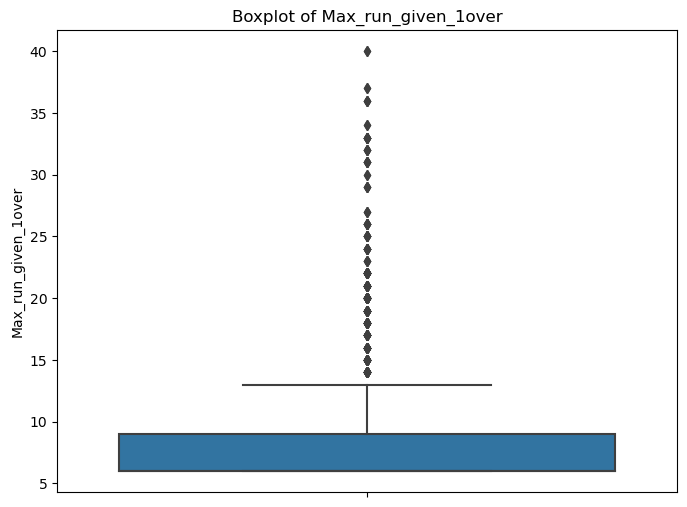

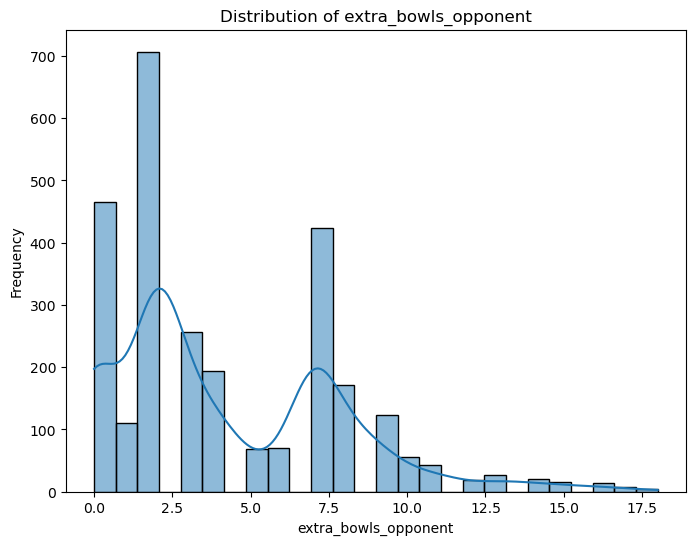

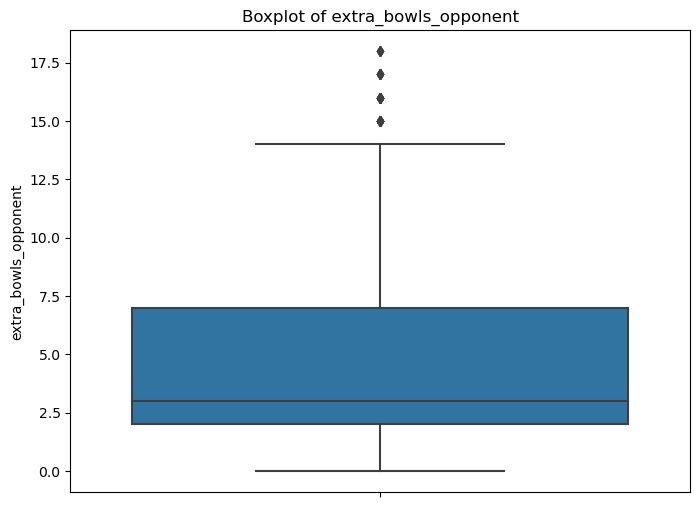

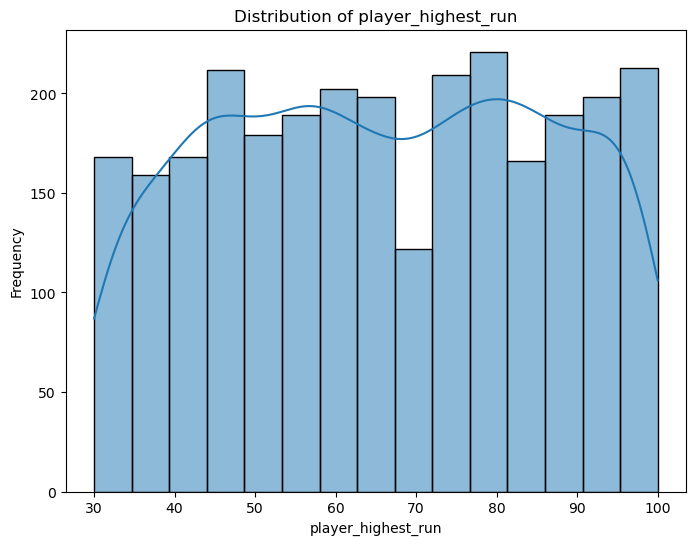

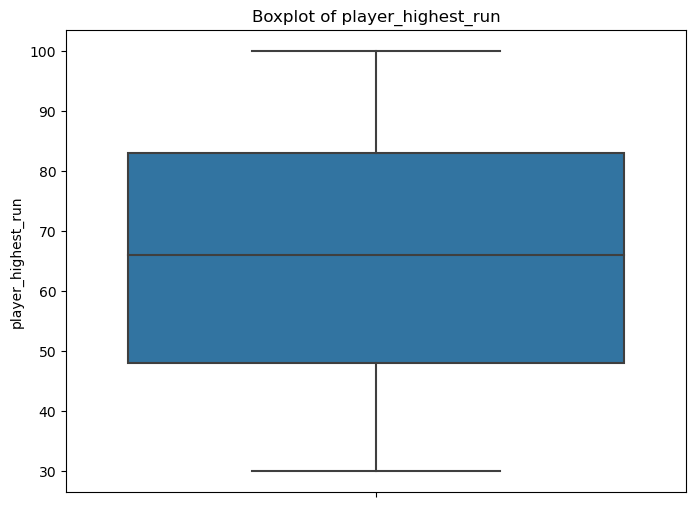

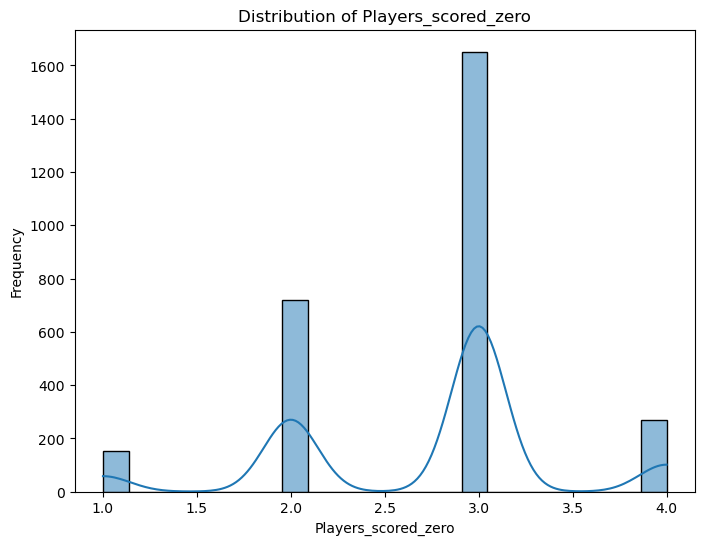

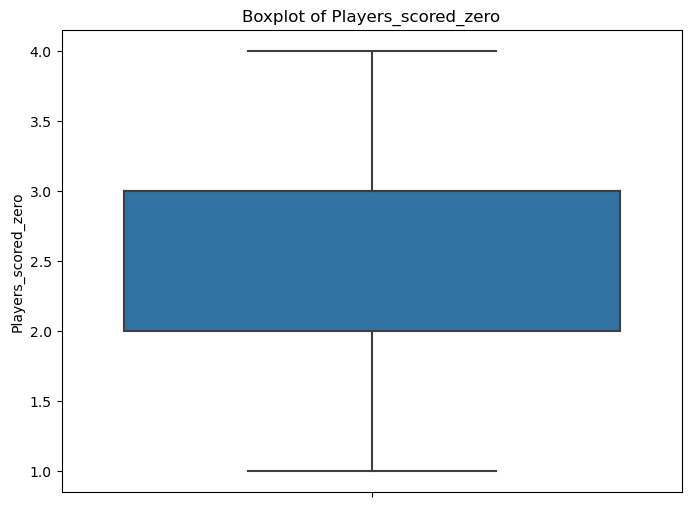

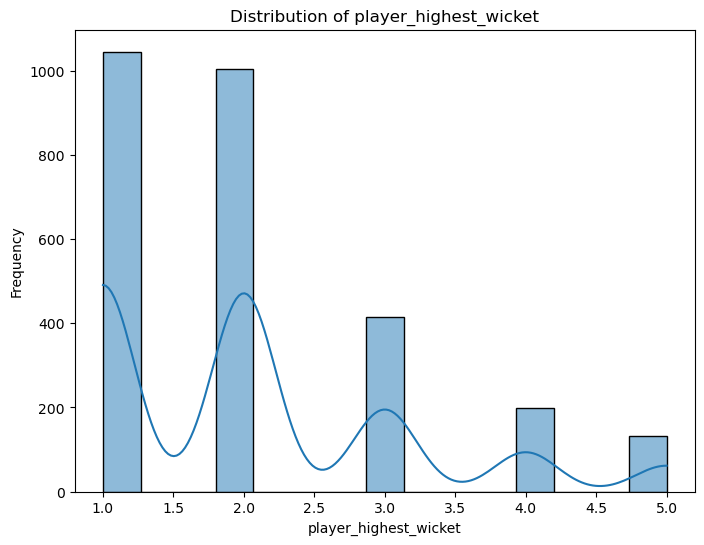

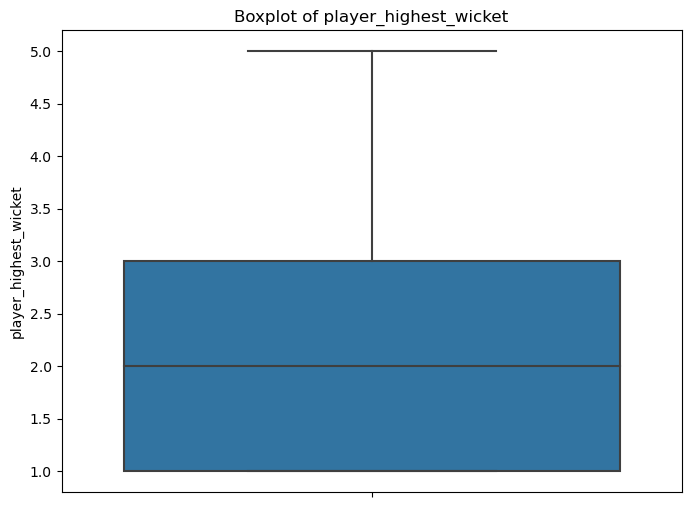

In [29]:
# Univariate analysis for numerical features
numerical_features = win_pred.select_dtypes(include=np.number).columns
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(win_pred[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

  plt.figure(figsize=(8, 6))
  sns.boxplot(y=win_pred[col])
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)
  plt.show()

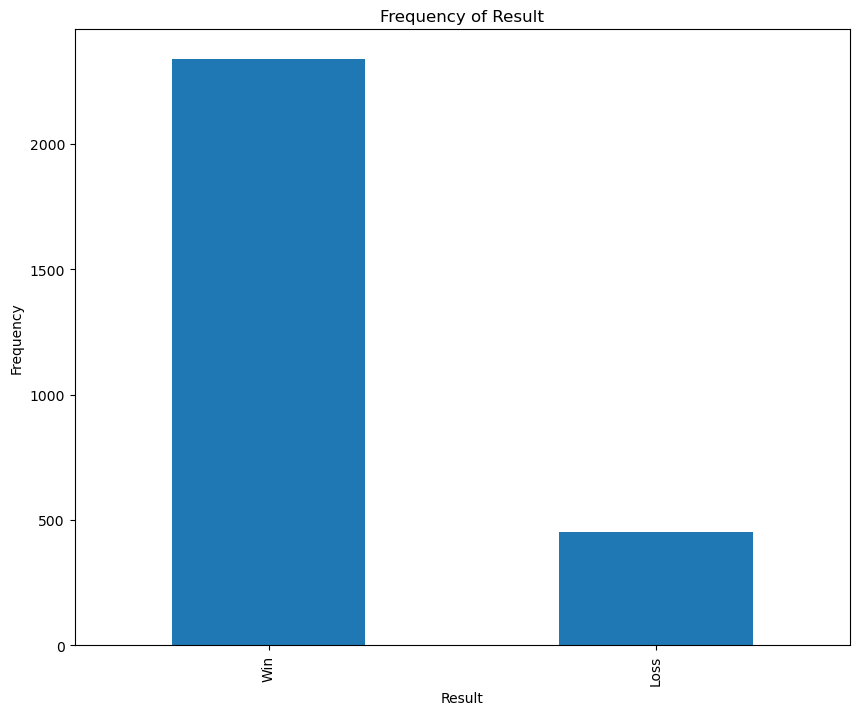

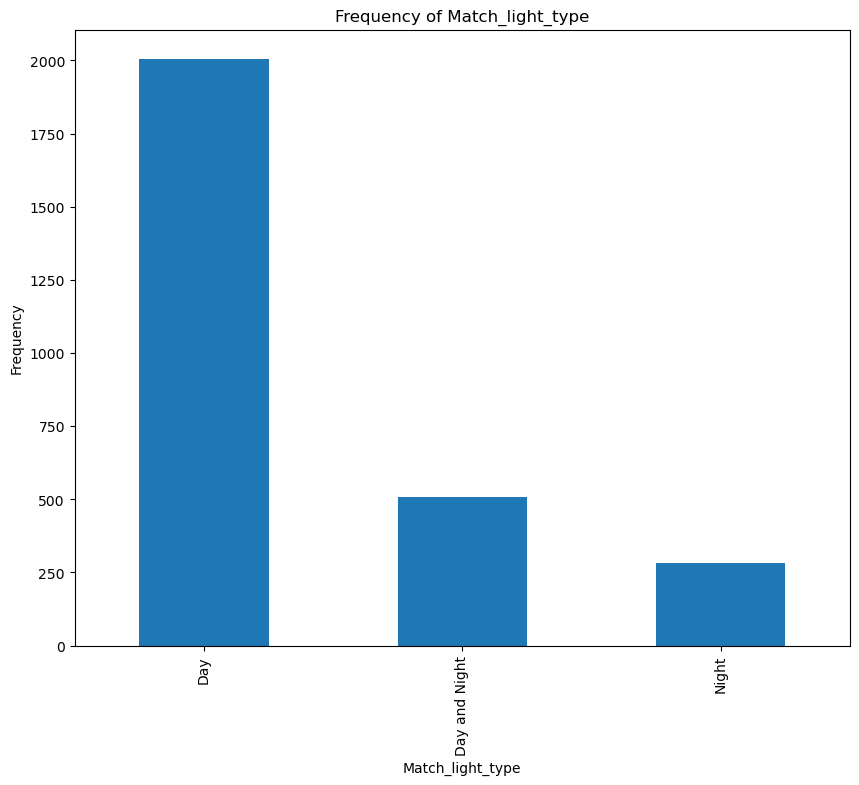

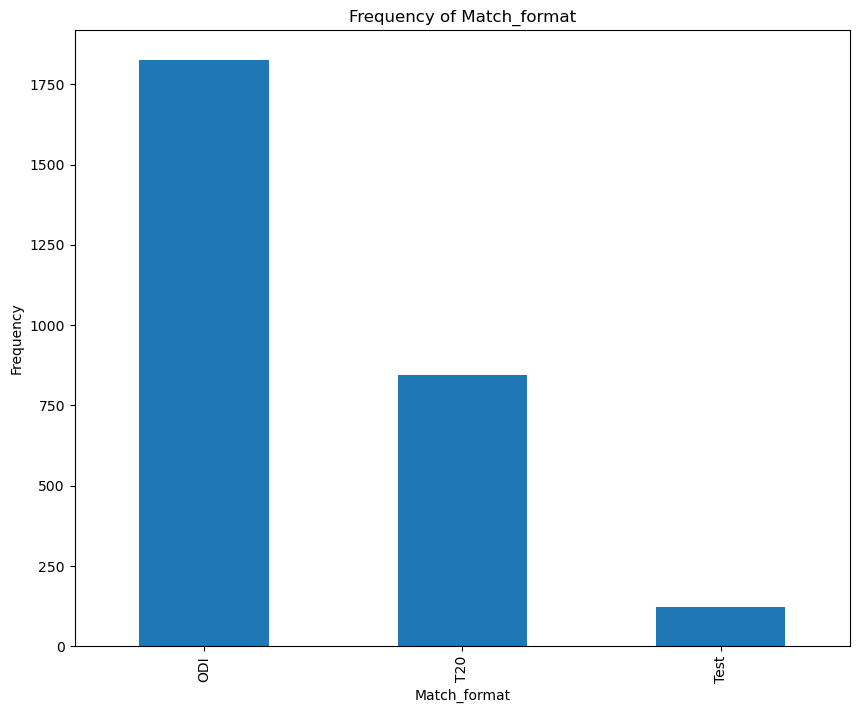

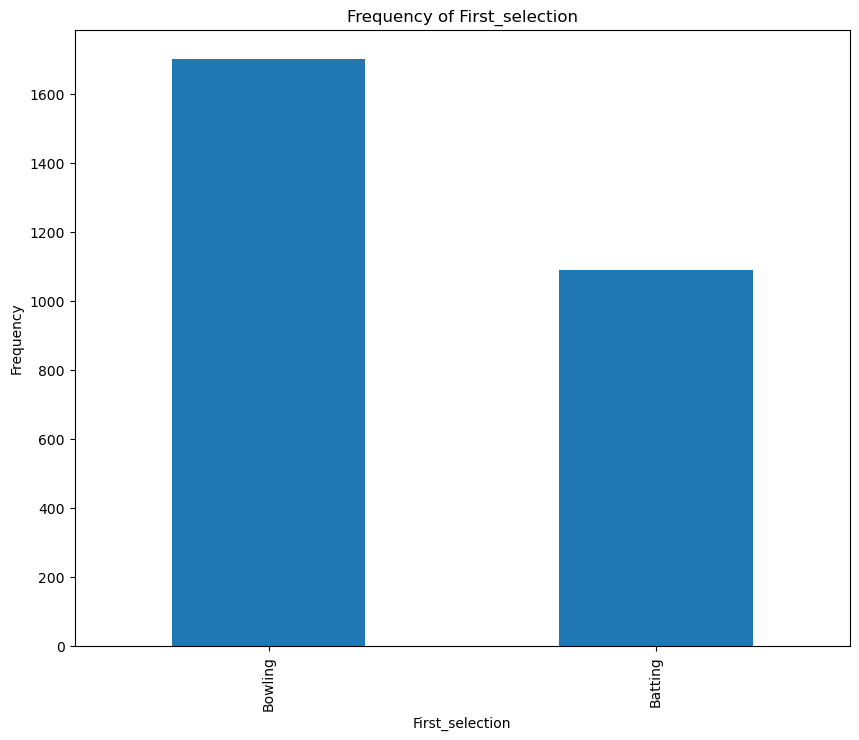

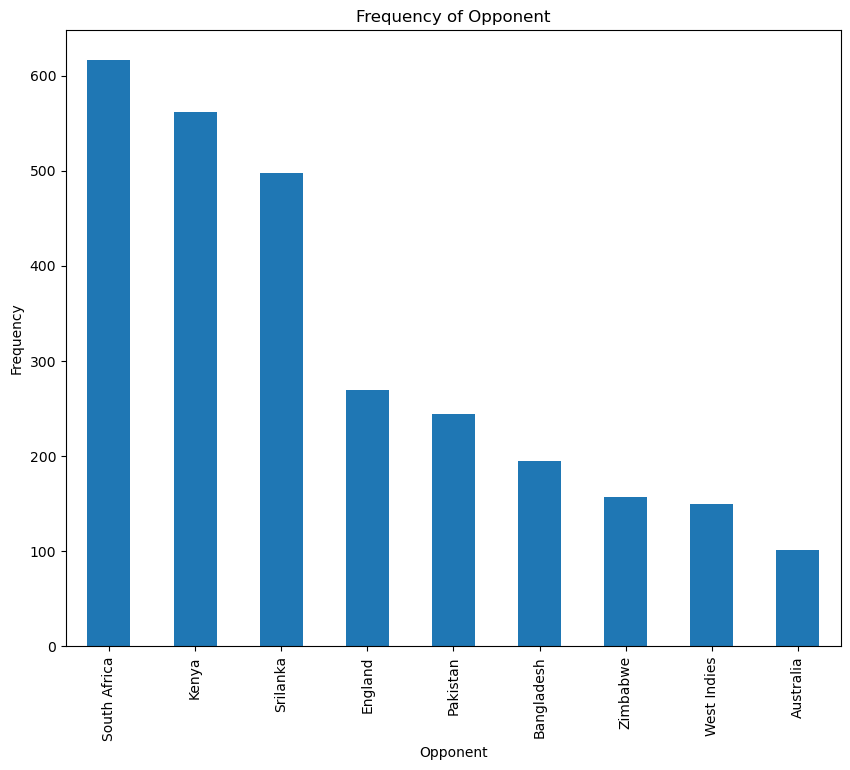

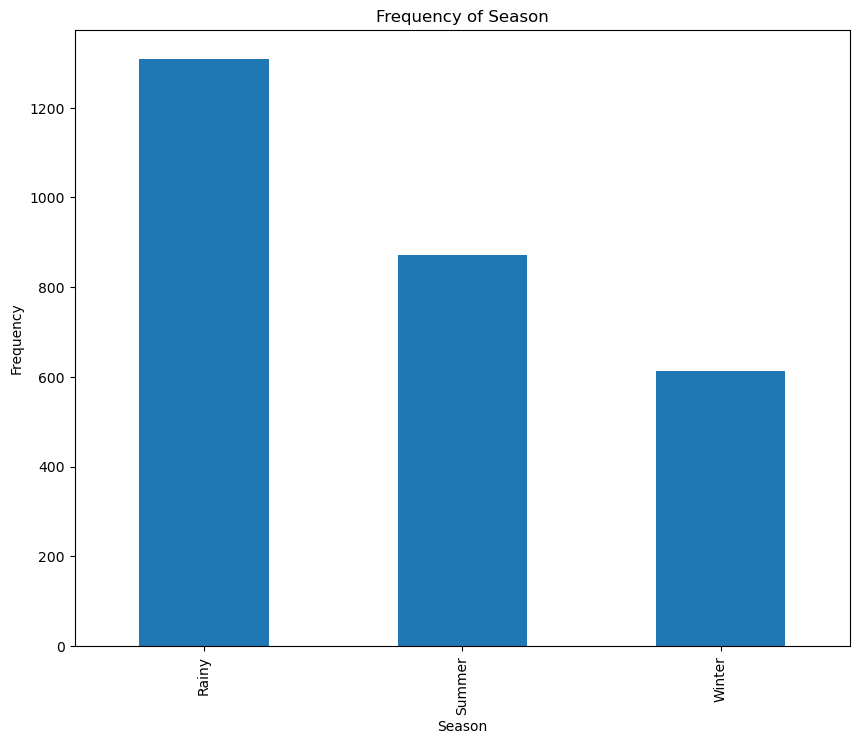

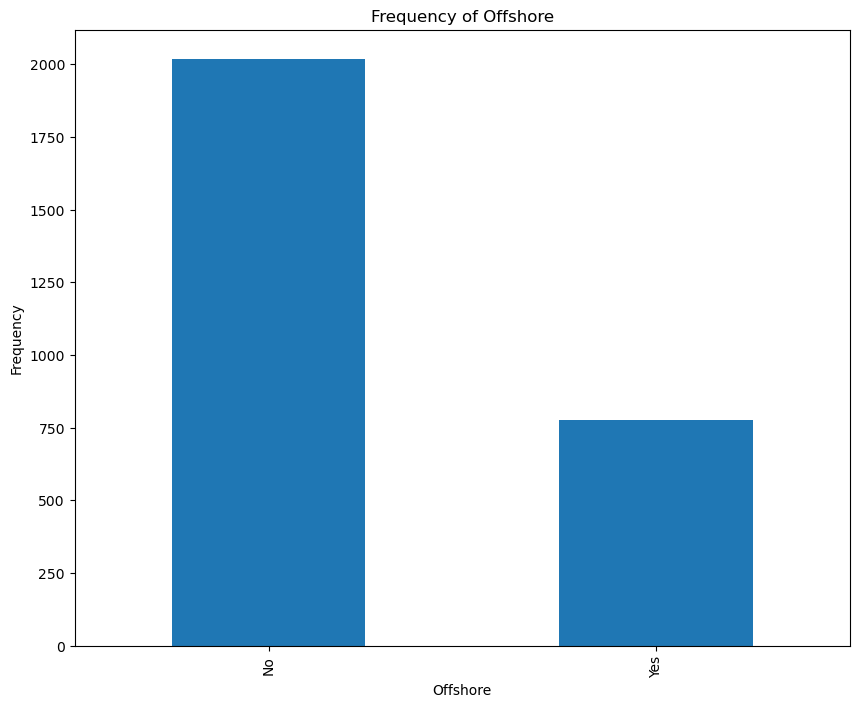

In [30]:
# Univariate analysis for categorical features
categorical_features = win_pred.select_dtypes(include='object').columns
categorical_features = categorical_features.drop('Game_number')

for col in categorical_features:
  plt.figure(figsize=(10, 8))
  win_pred[col].value_counts().plot(kind='bar')
  plt.title(f'Frequency of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

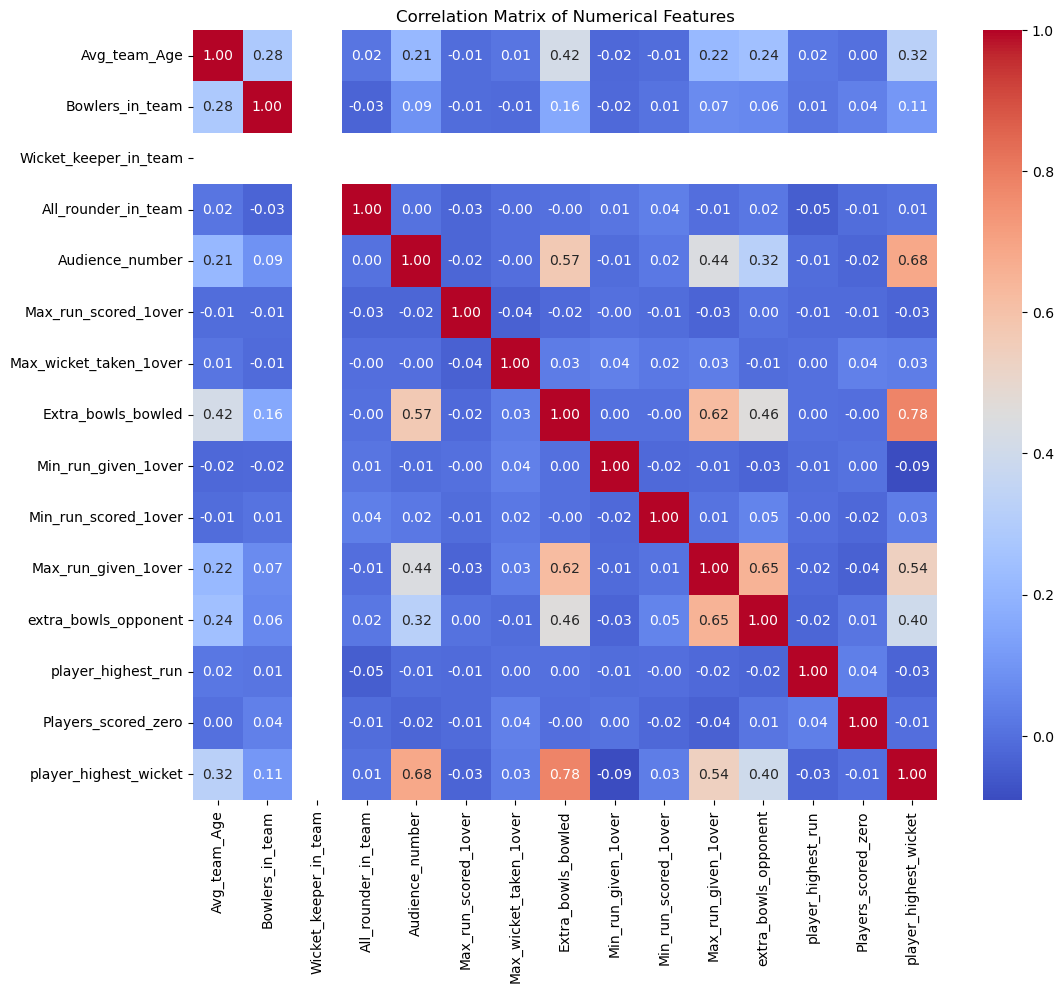

In [31]:
# Select only numerical columns for correlation calculation
numerical_win_pred = win_pred.select_dtypes(include=np.number)

# Numerical features correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_win_pred.corr()  # Calculate correlation for numerical columns only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

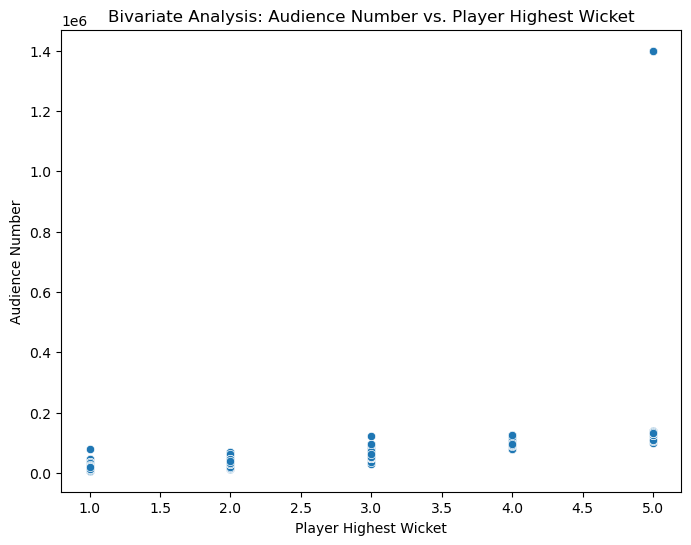

In [32]:
# Bivariate analysis: Audience_number vs. player_highest_wicket
plt.figure(figsize=(8, 6))
sns.scatterplot(x='player_highest_wicket', y='Audience_number', data=win_pred)
plt.title('Bivariate Analysis: Audience Number vs. Player Highest Wicket')
plt.xlabel('Player Highest Wicket')
plt.ylabel('Audience Number')
plt.show()

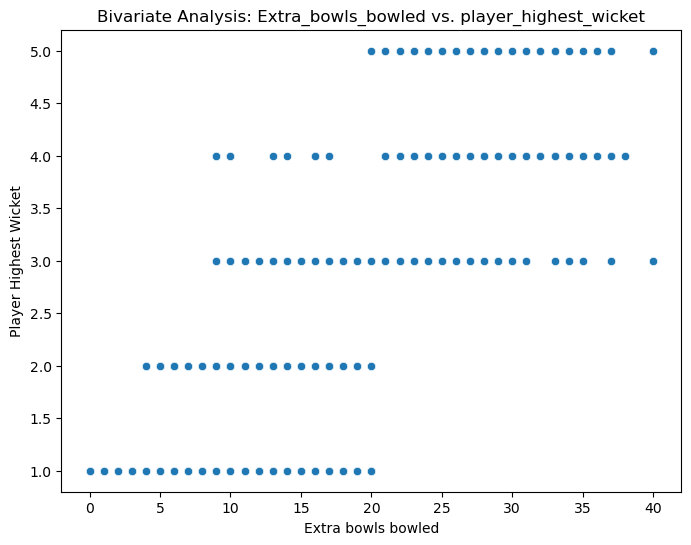

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Extra_bowls_bowled', y='player_highest_wicket', data=win_pred)
plt.title('Bivariate Analysis: Extra_bowls_bowled vs. player_highest_wicket')
plt.xlabel('Extra bowls bowled')
plt.ylabel('Player Highest Wicket')
plt.show()

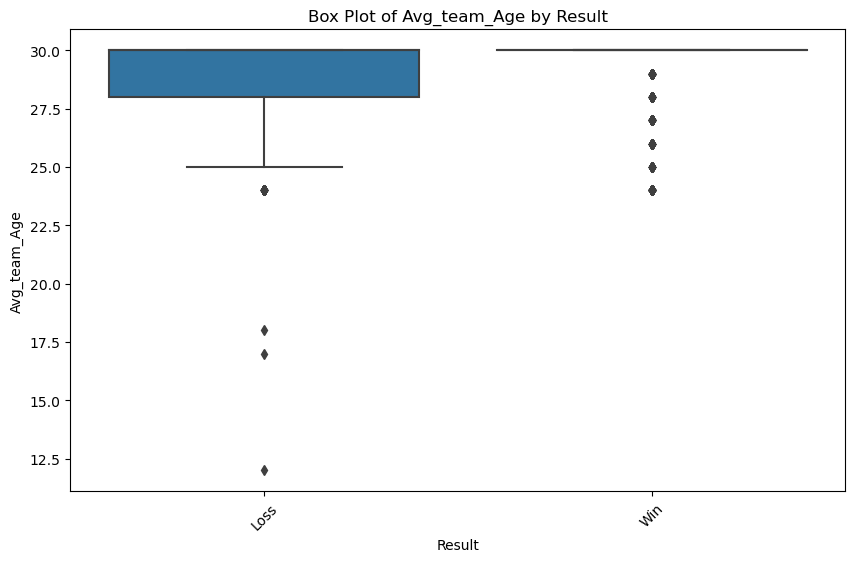

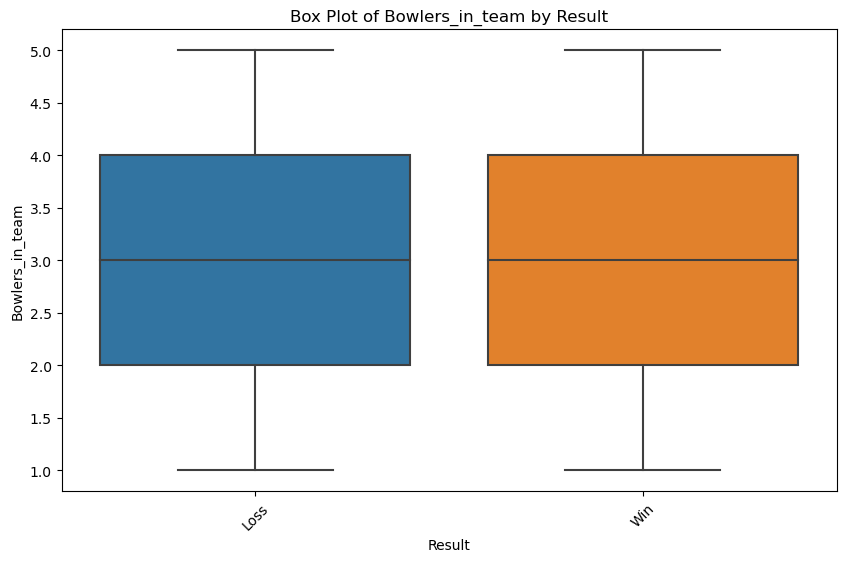

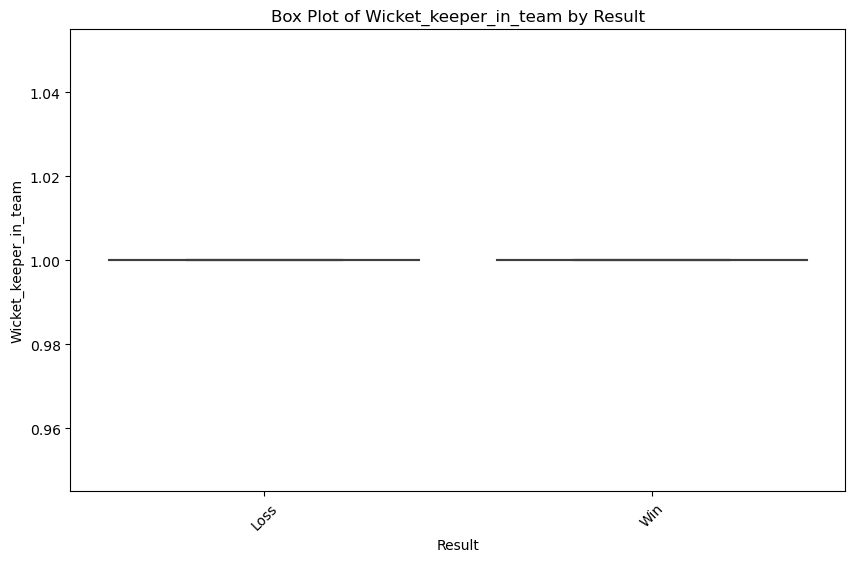

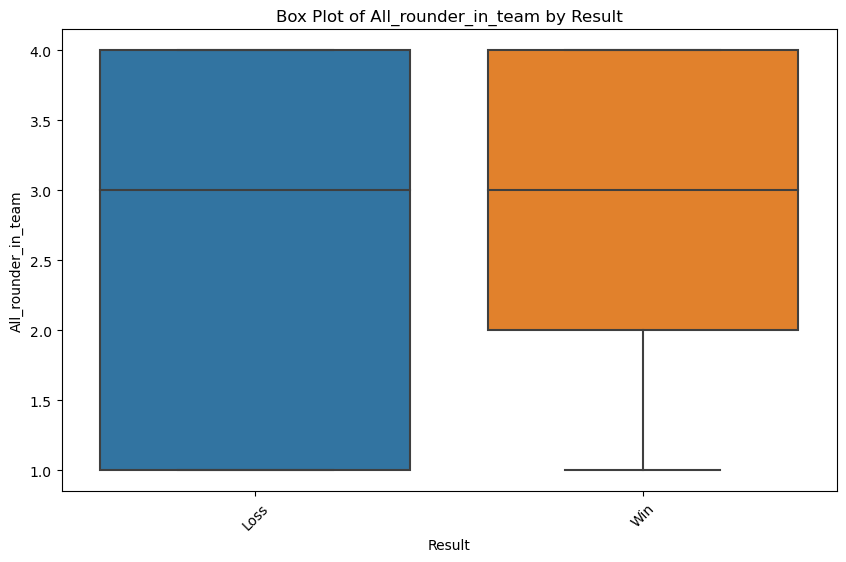

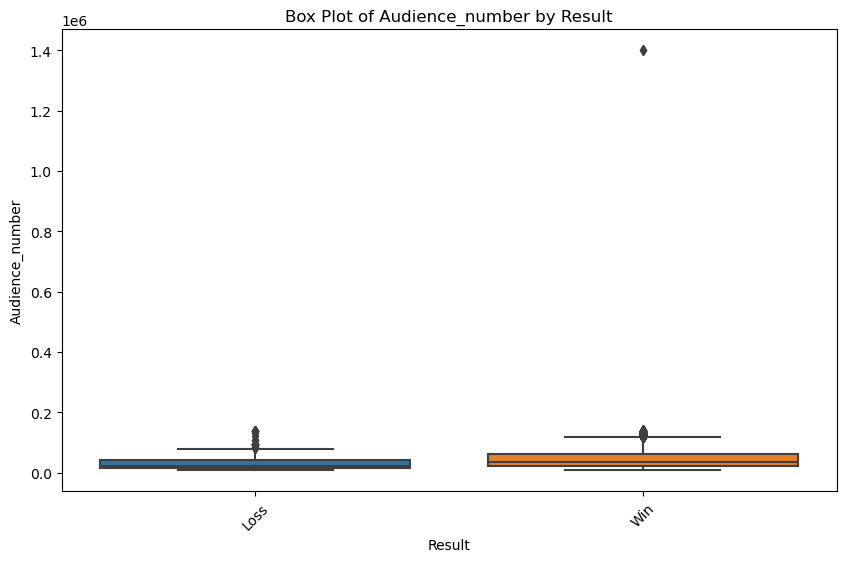

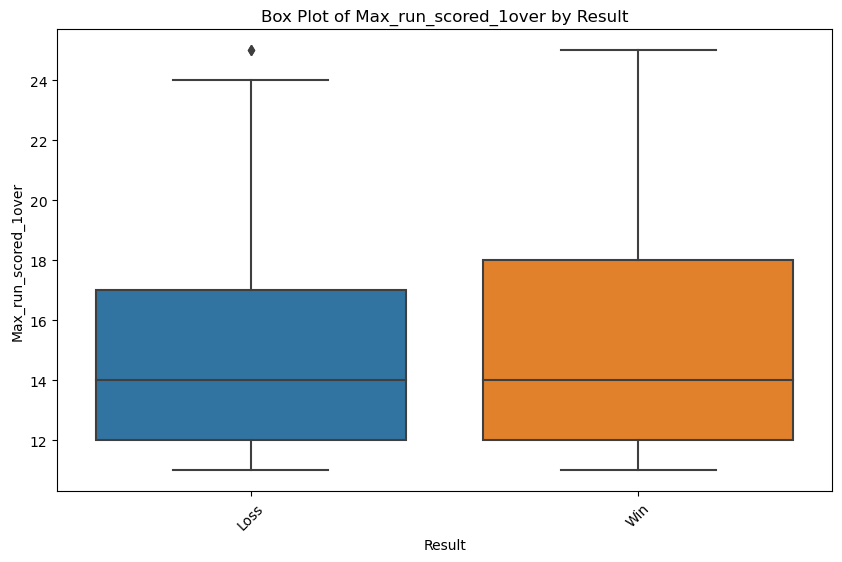

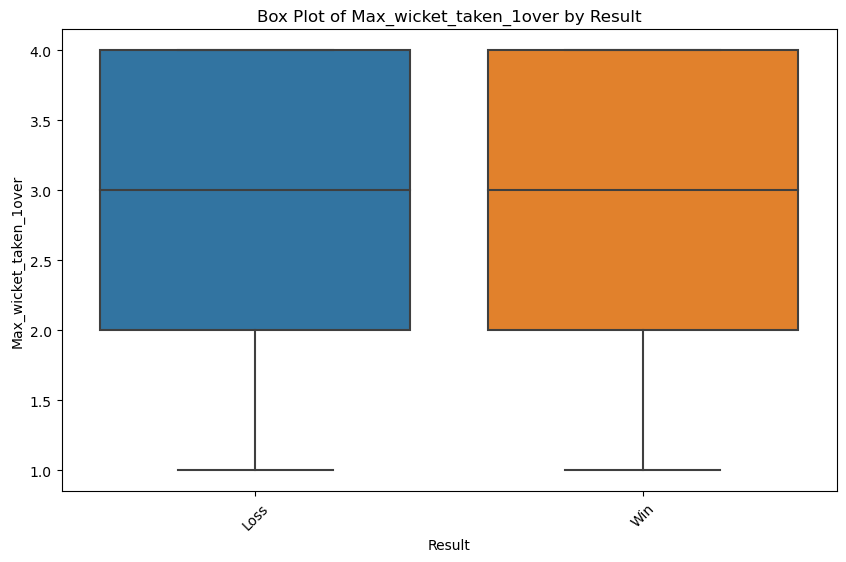

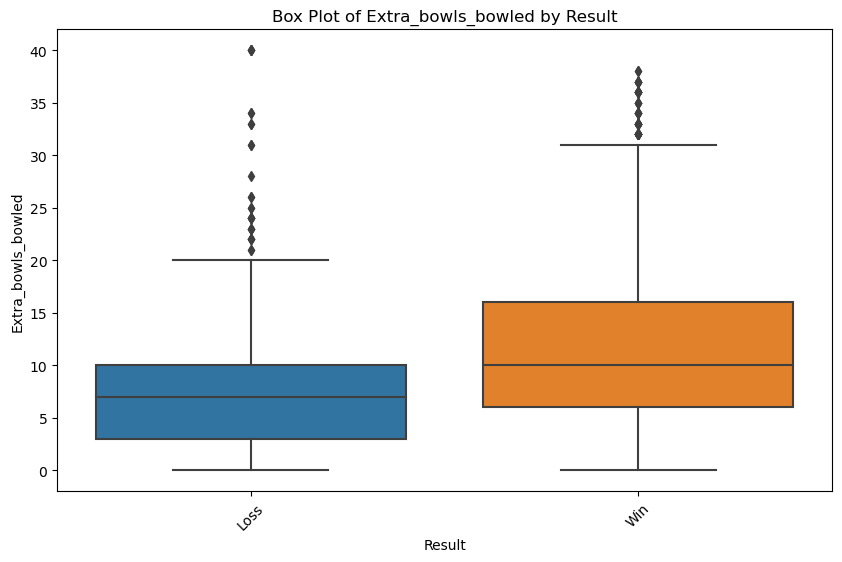

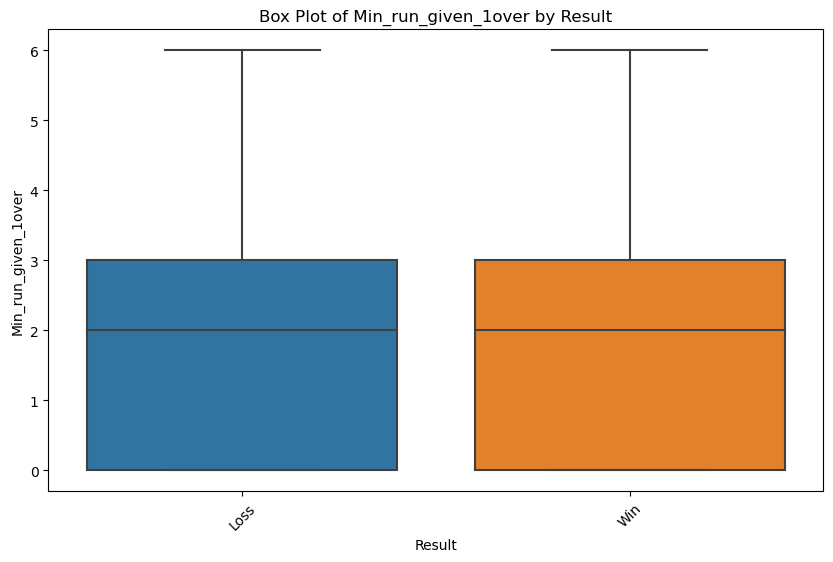

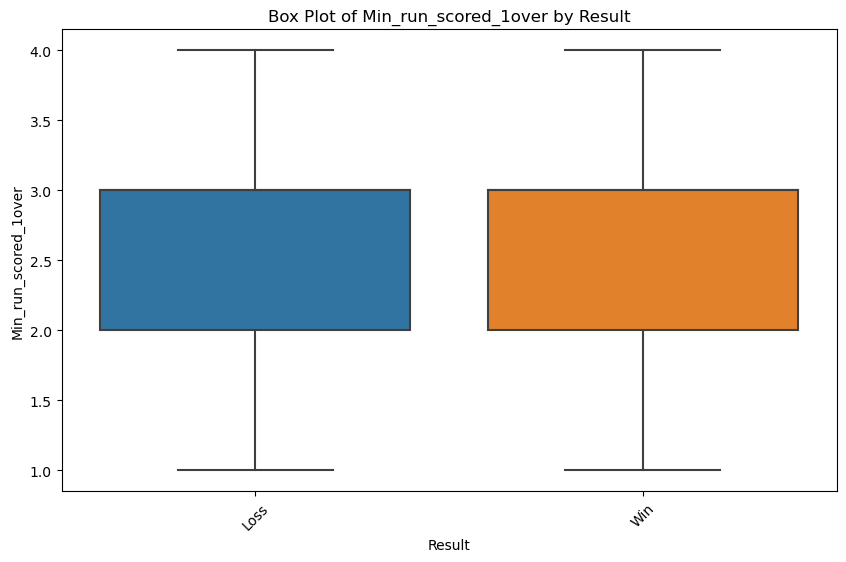

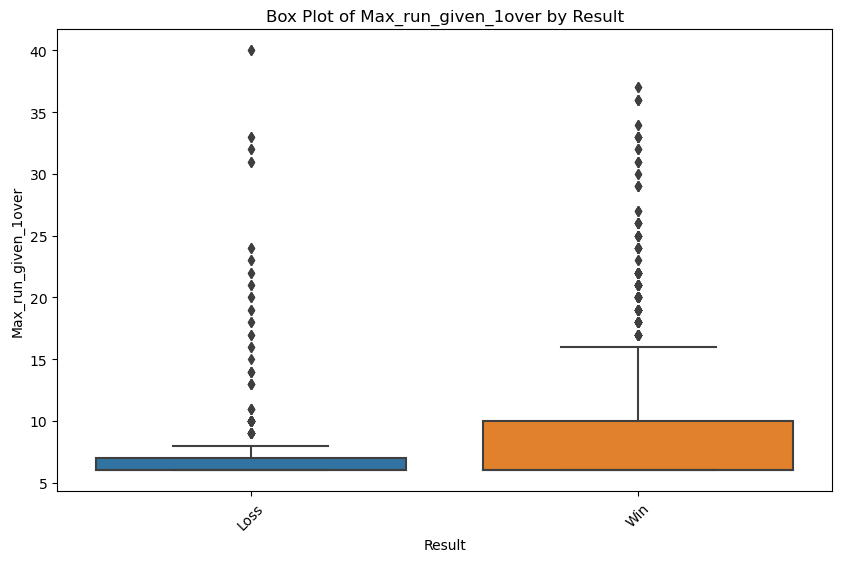

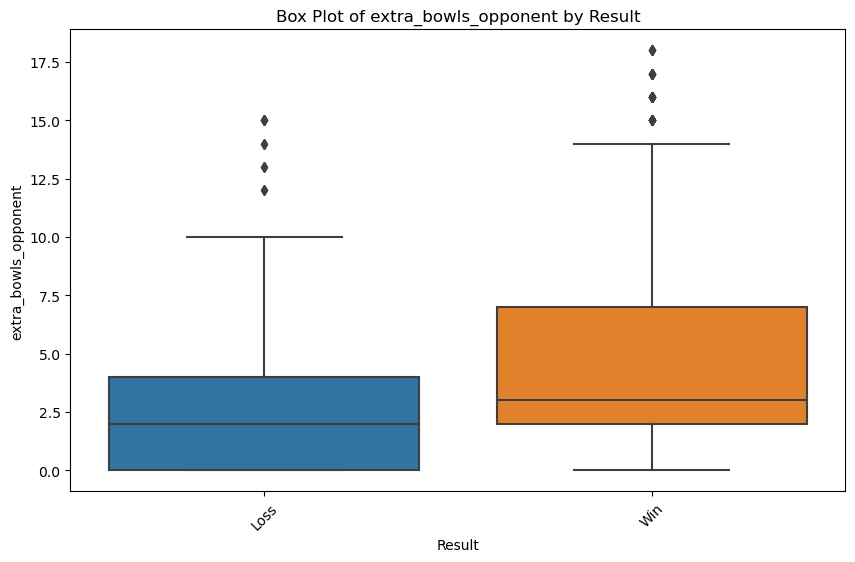

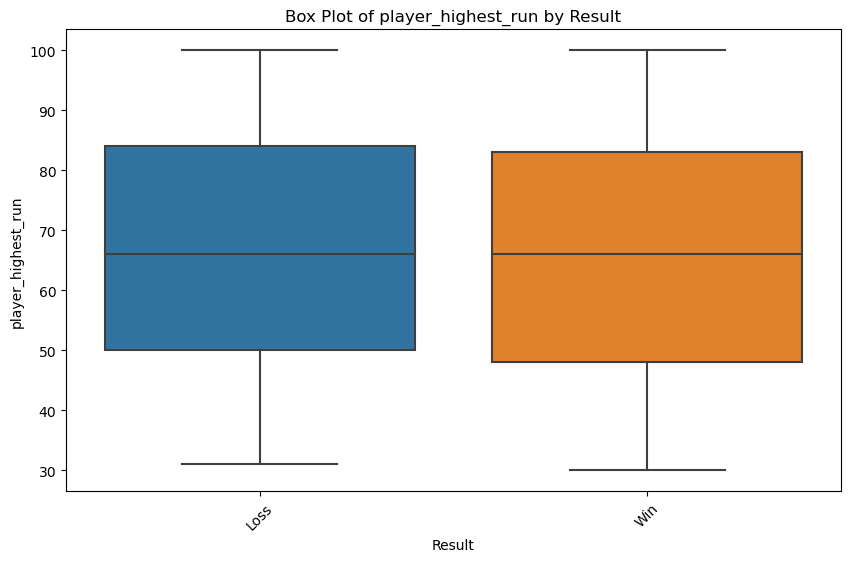

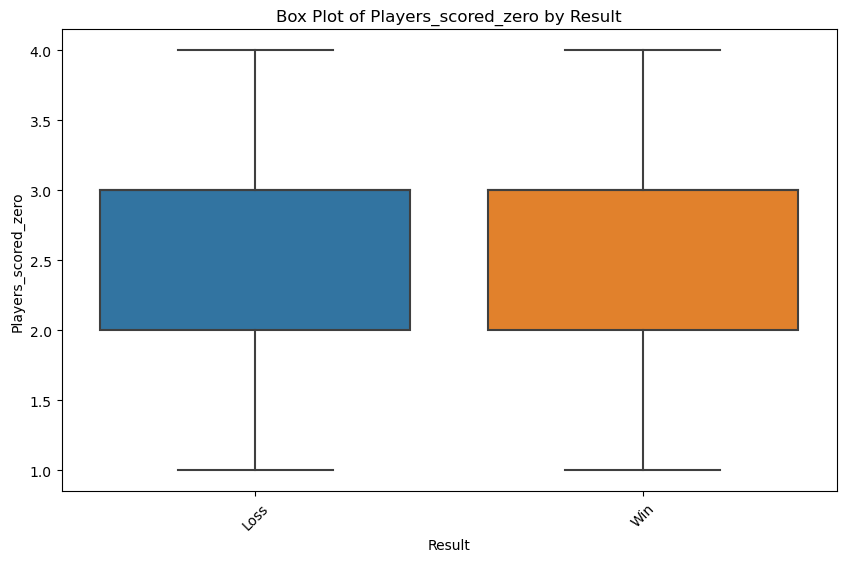

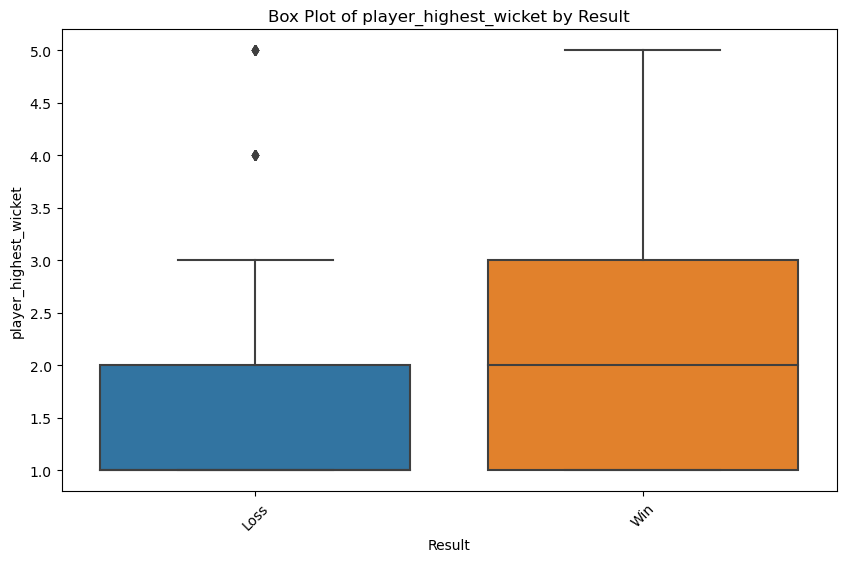

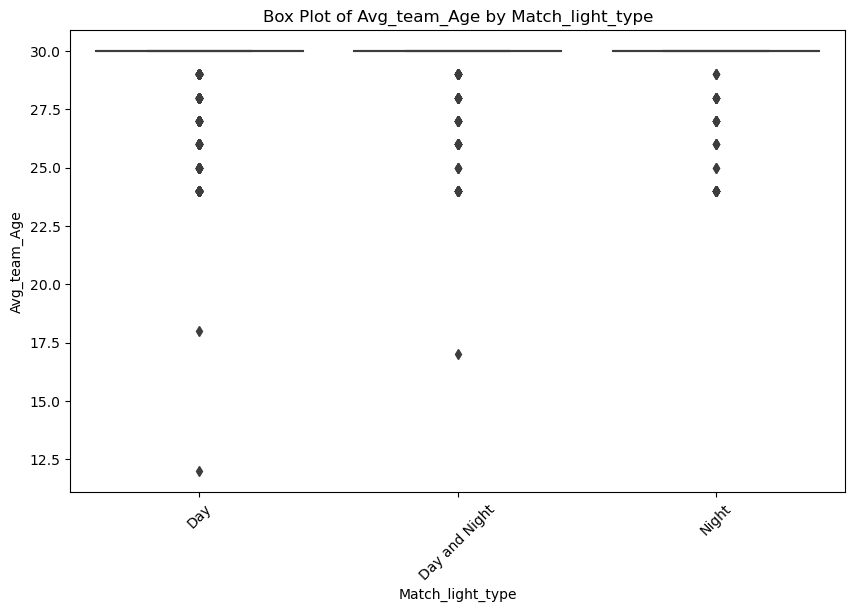

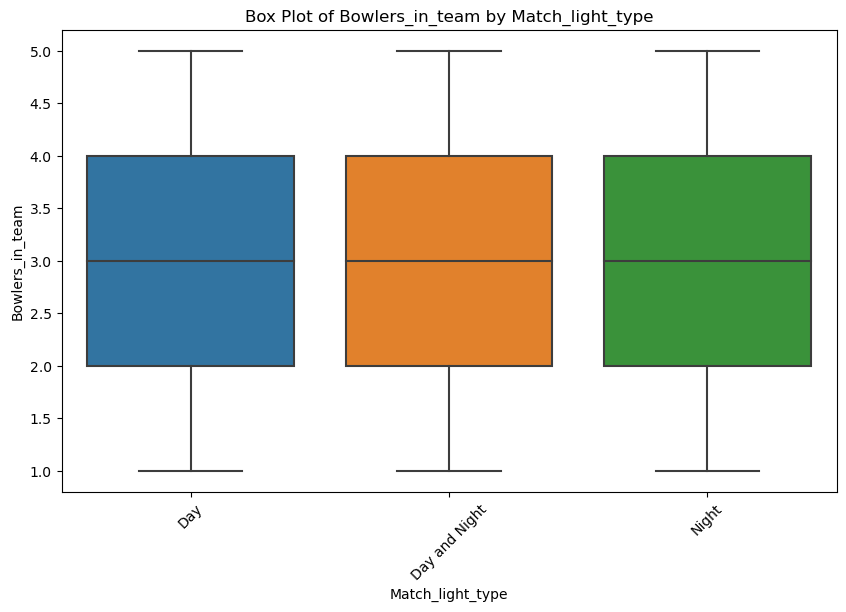

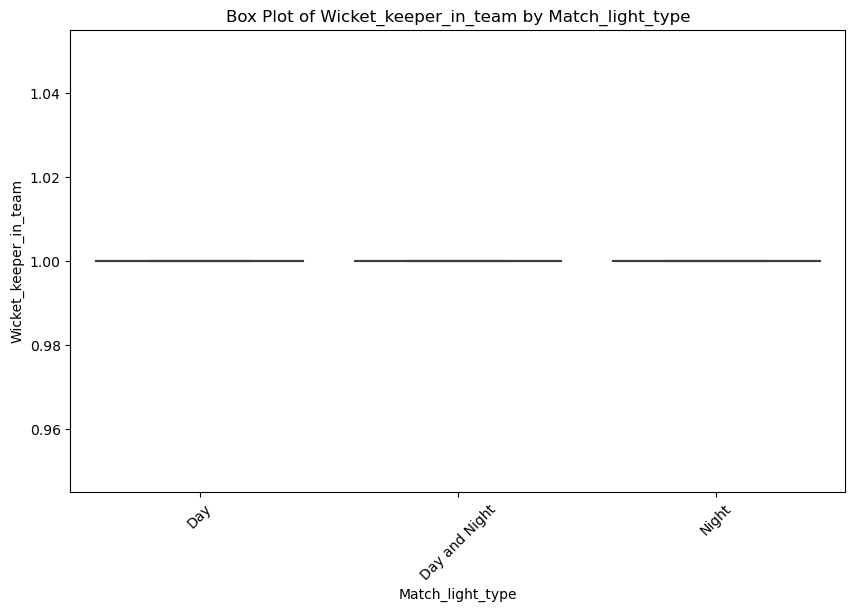

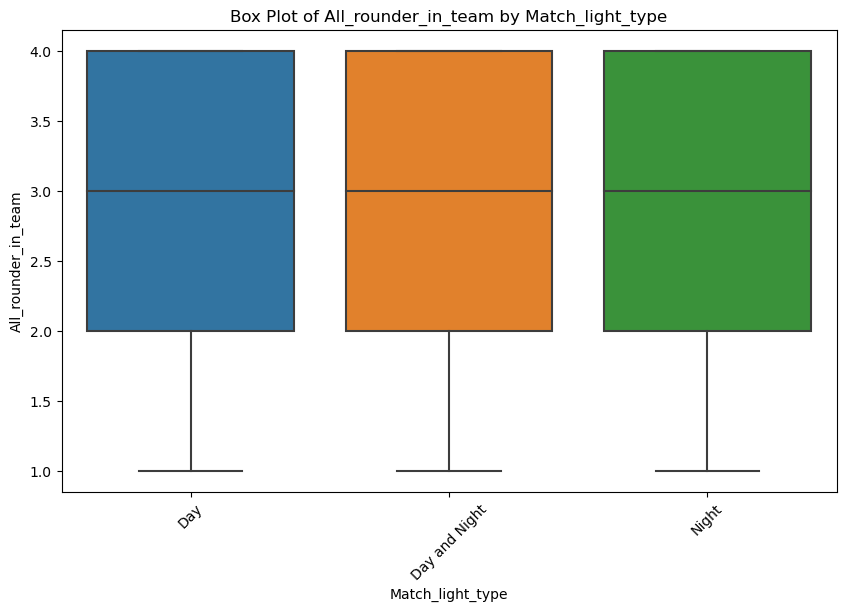

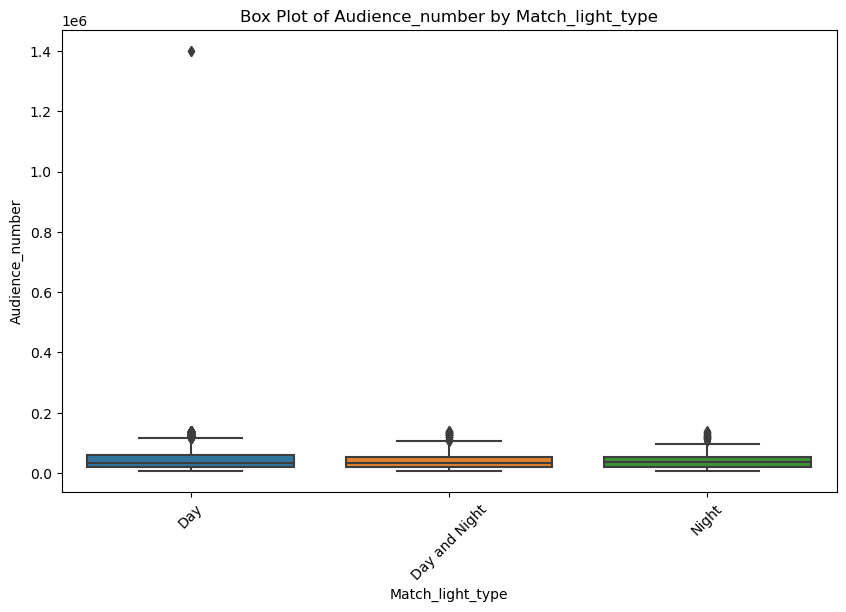

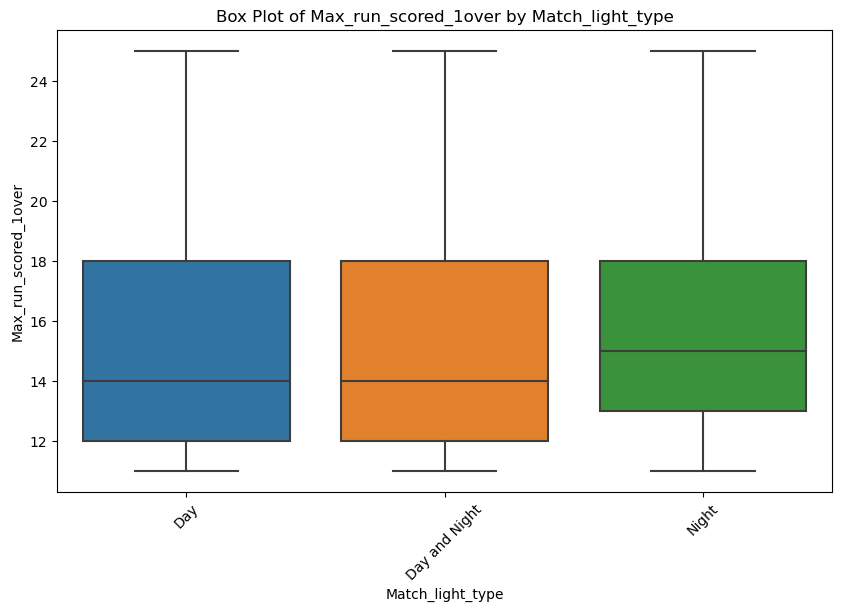

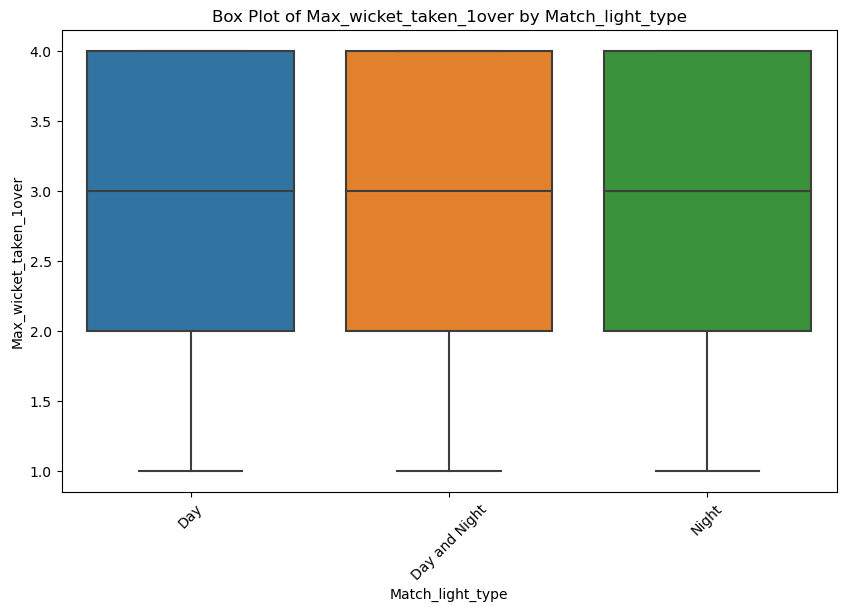

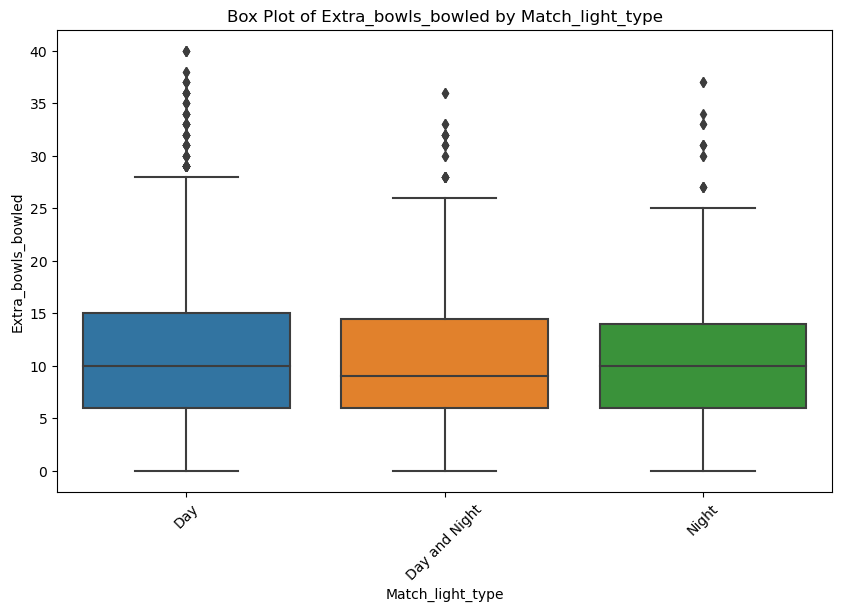

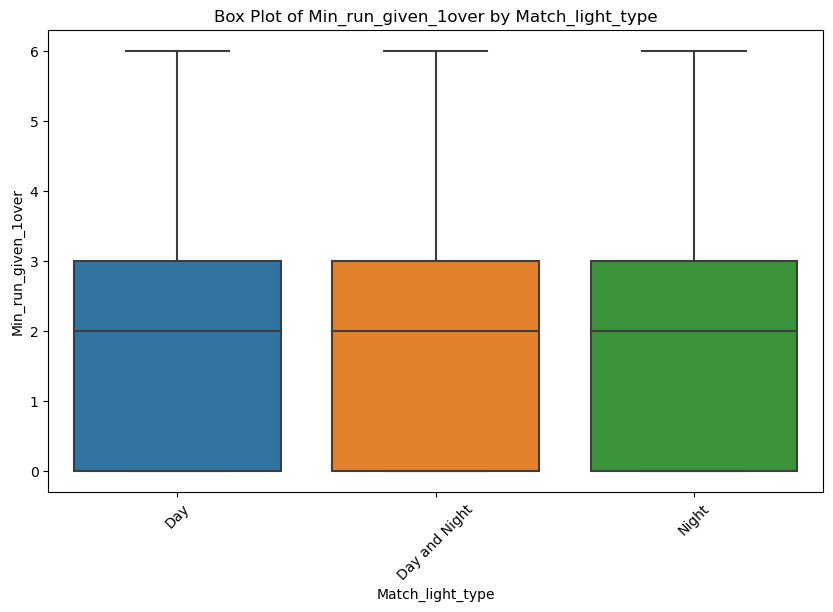

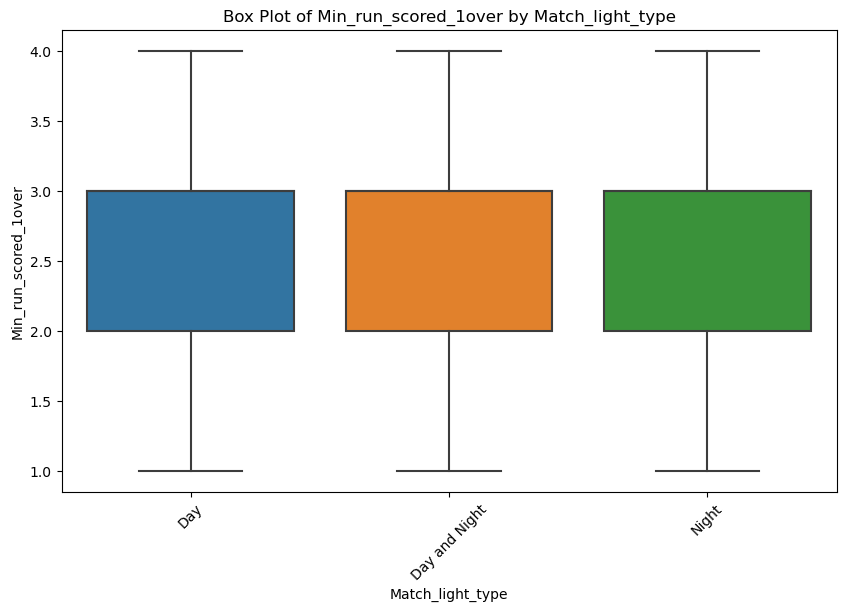

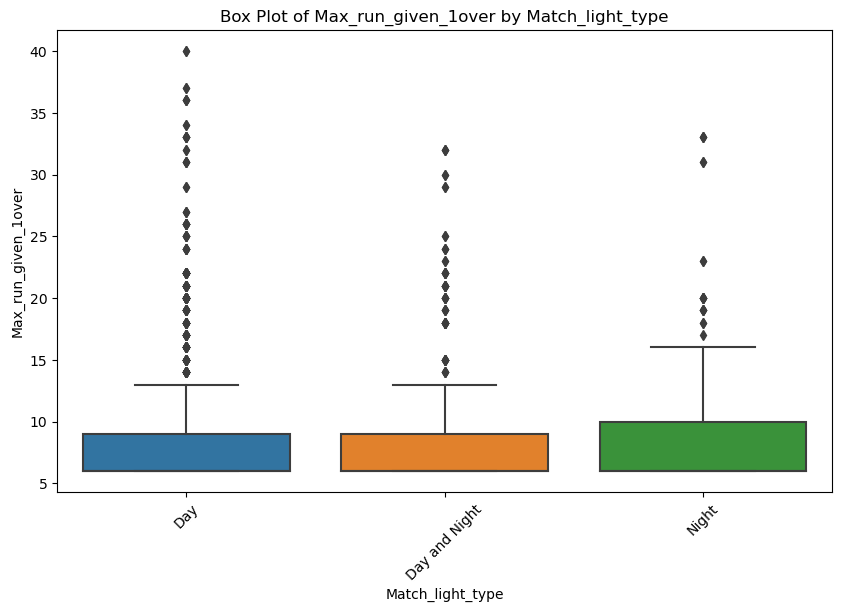

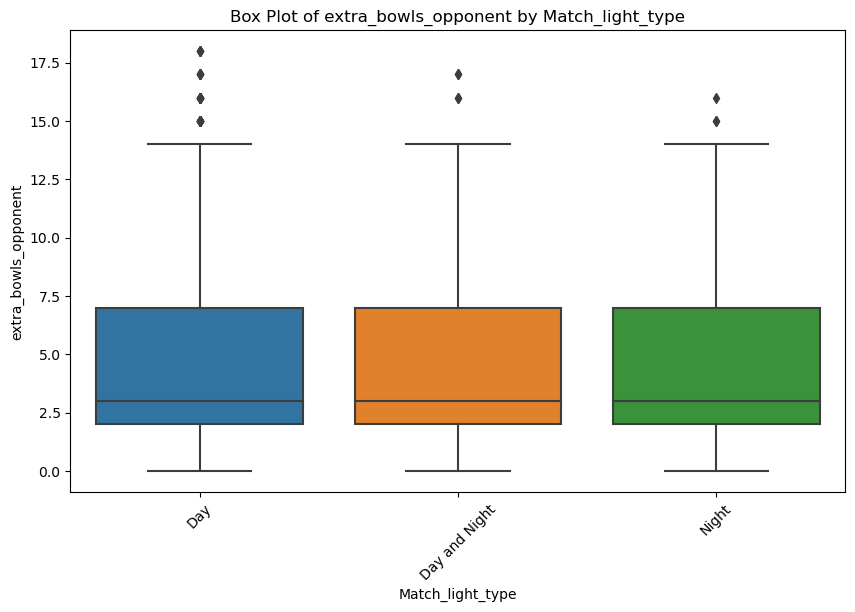

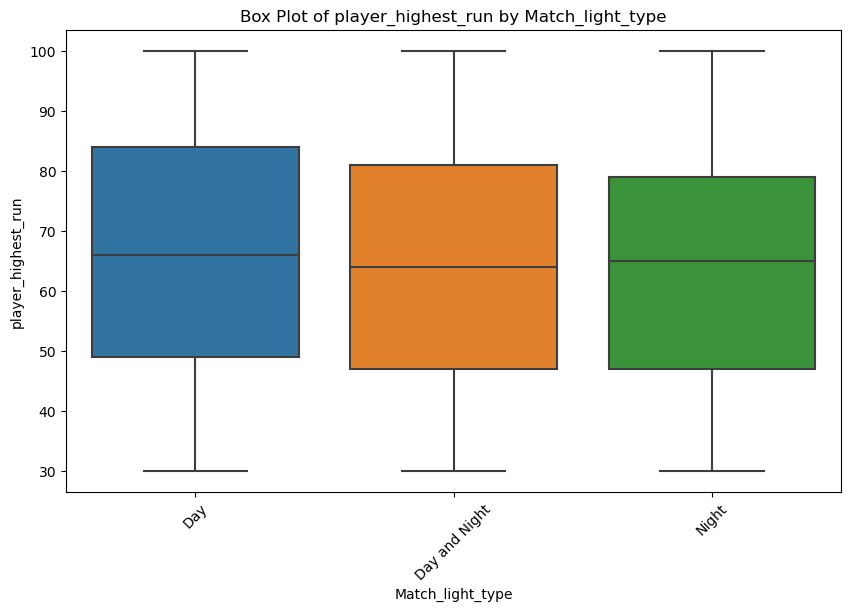

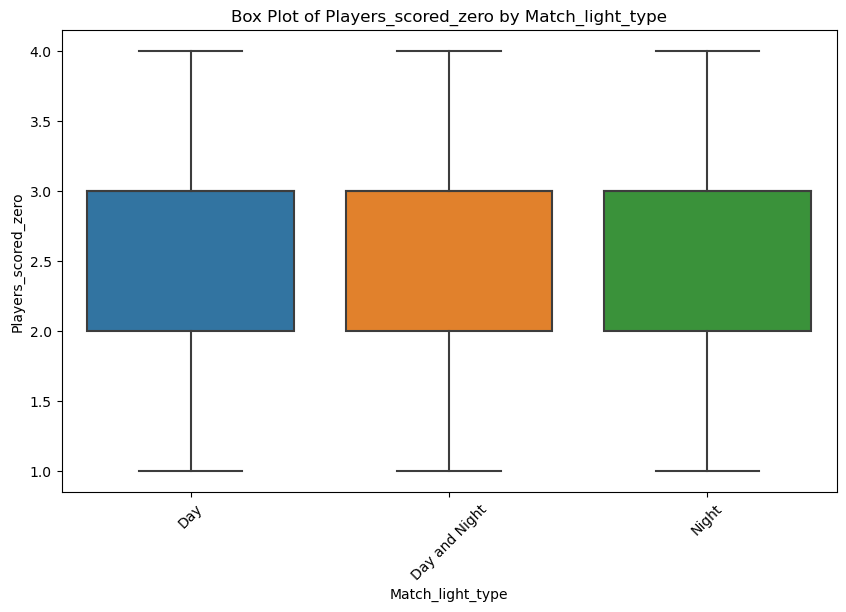

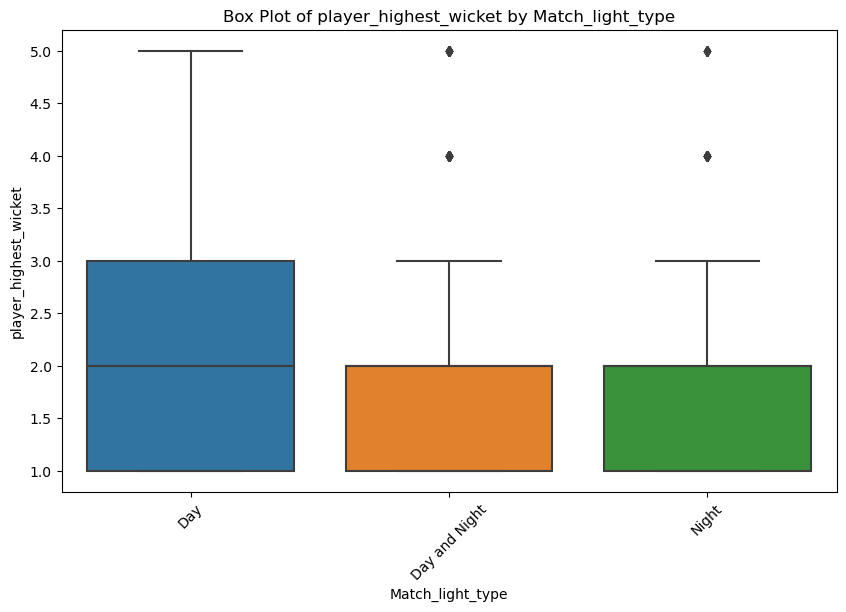

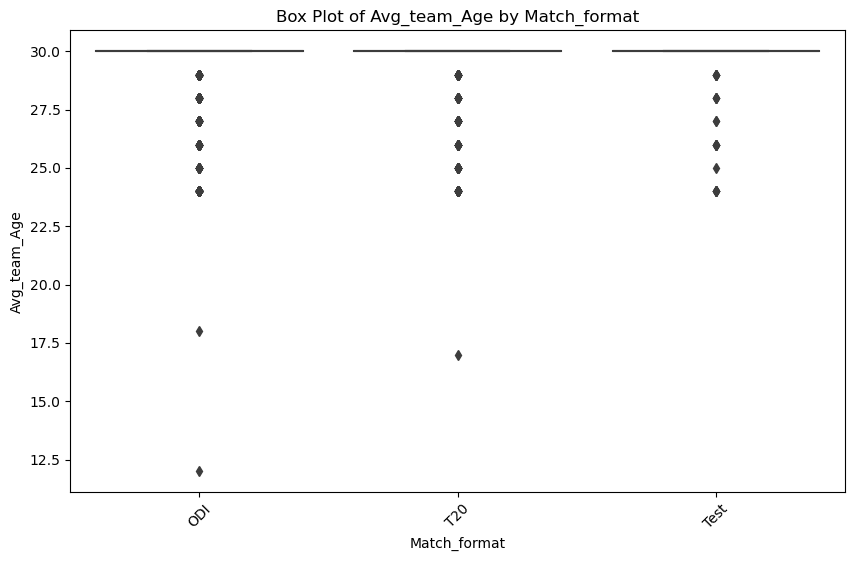

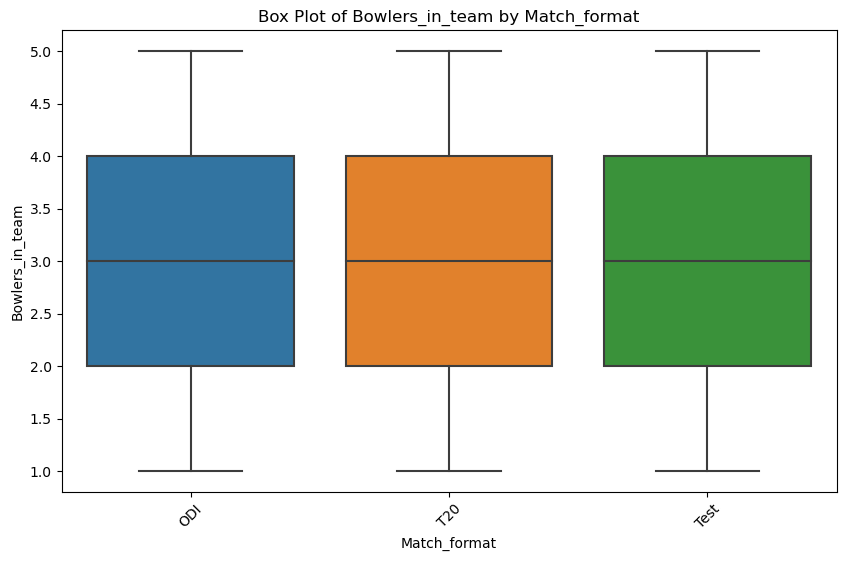

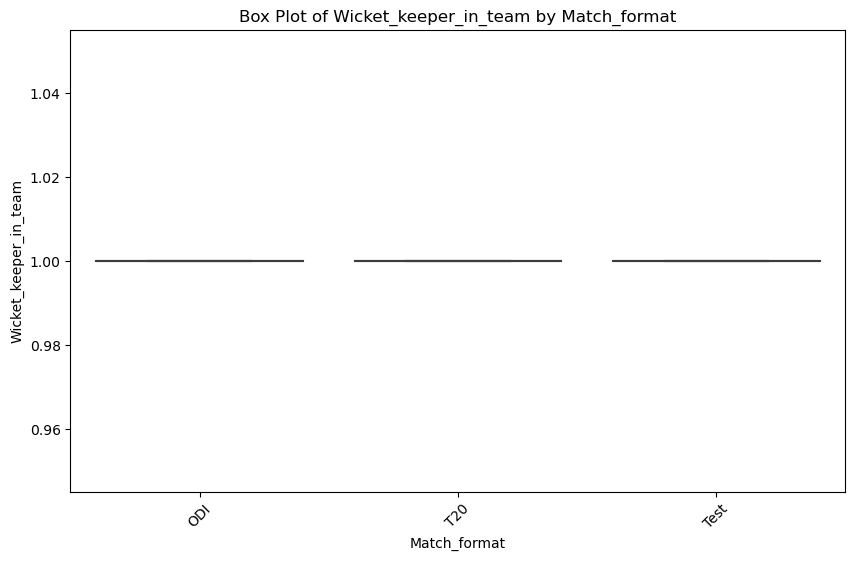

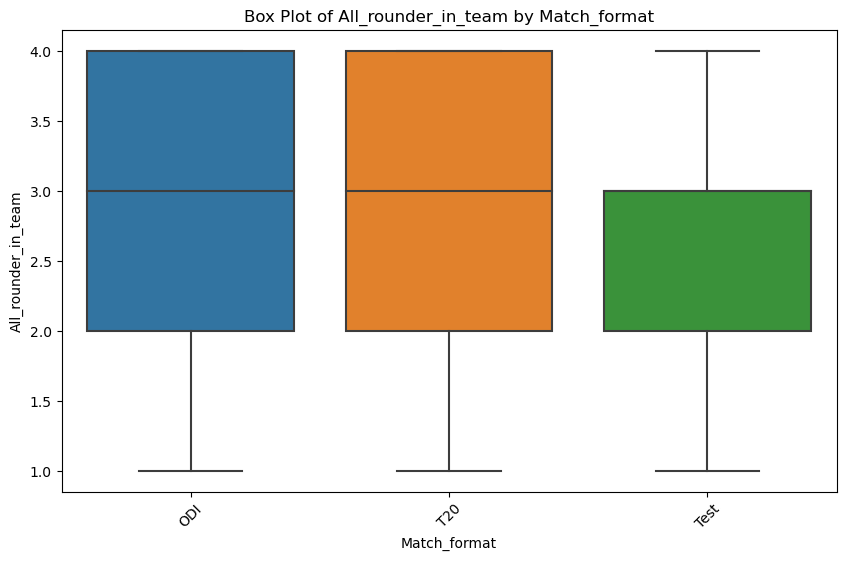

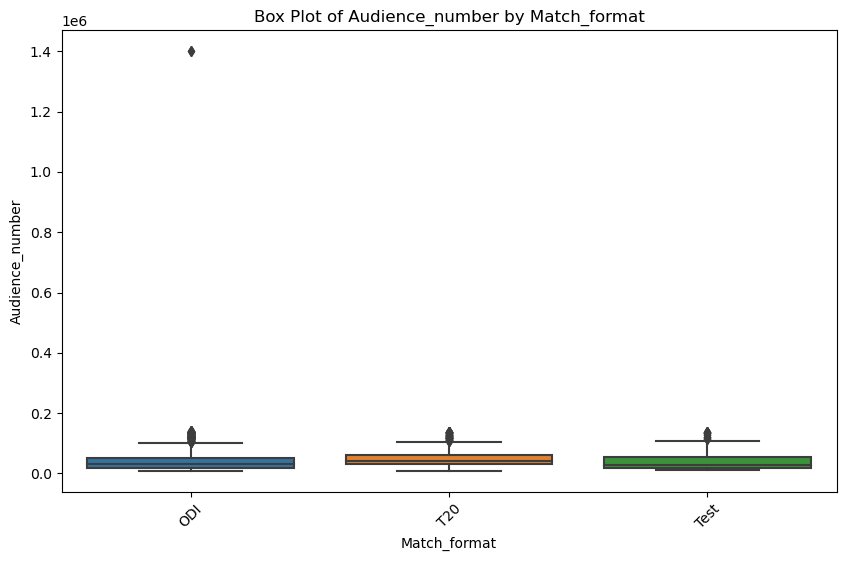

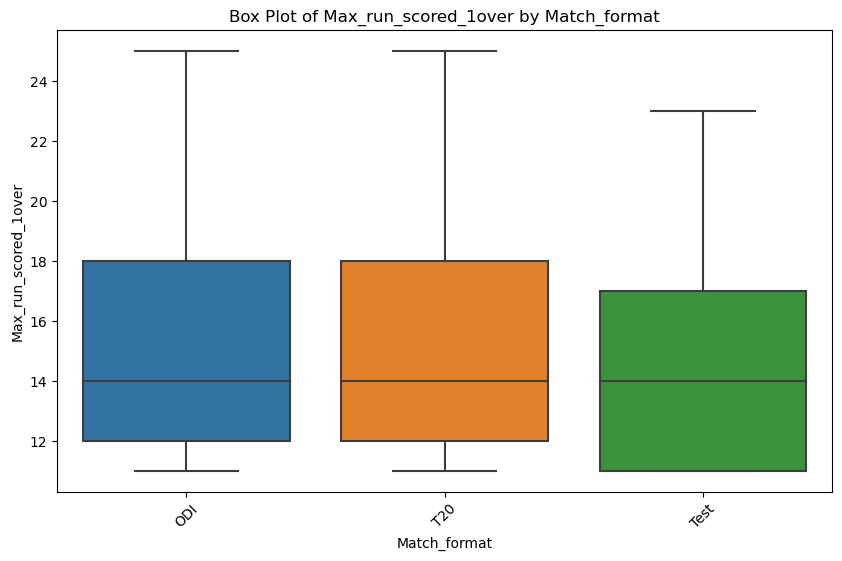

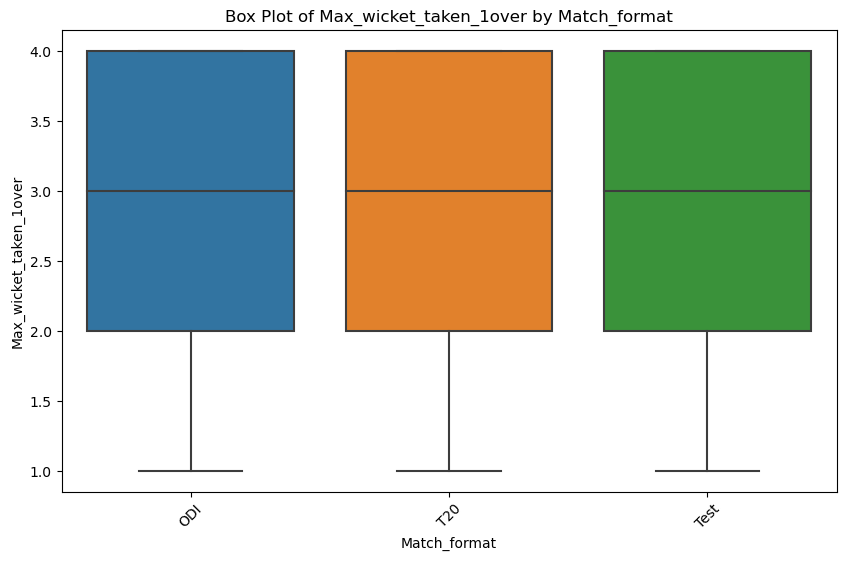

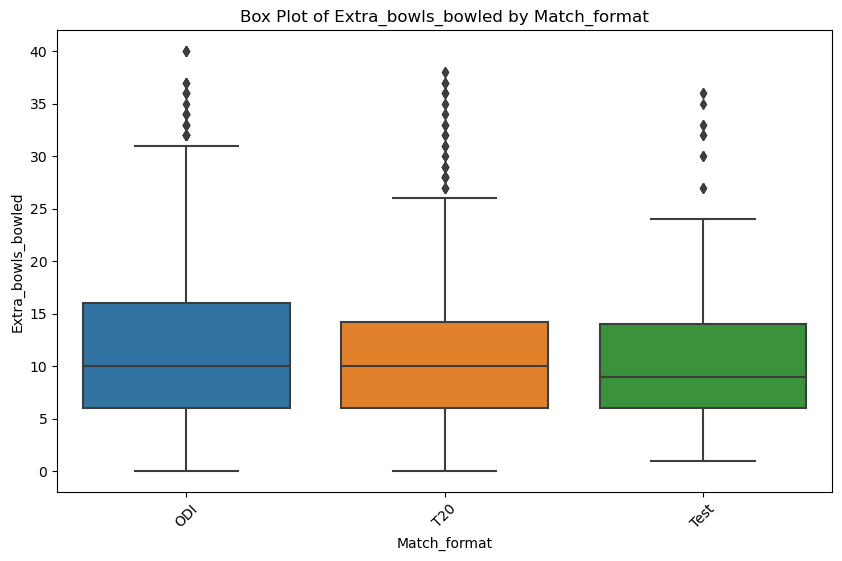

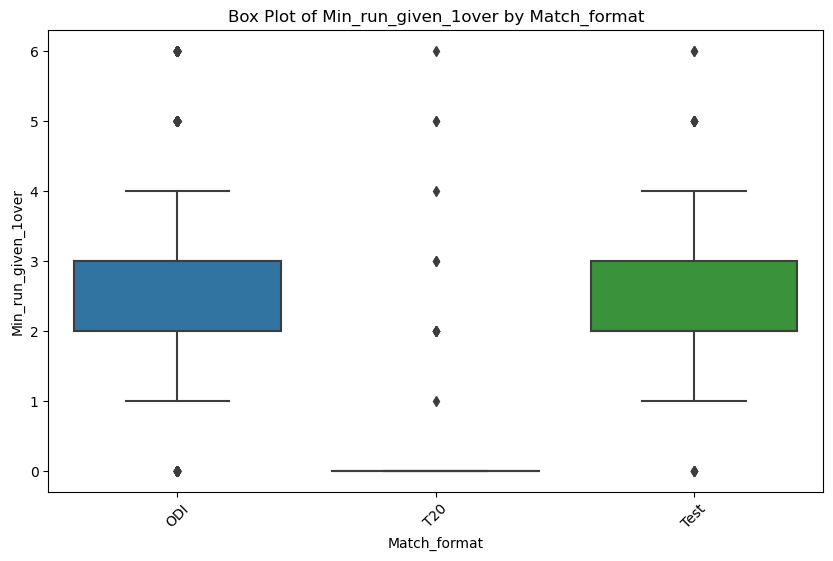

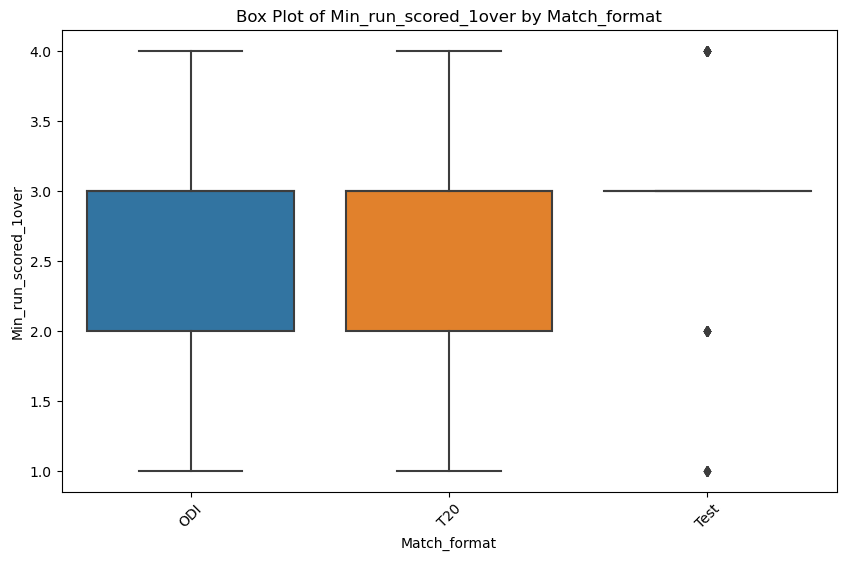

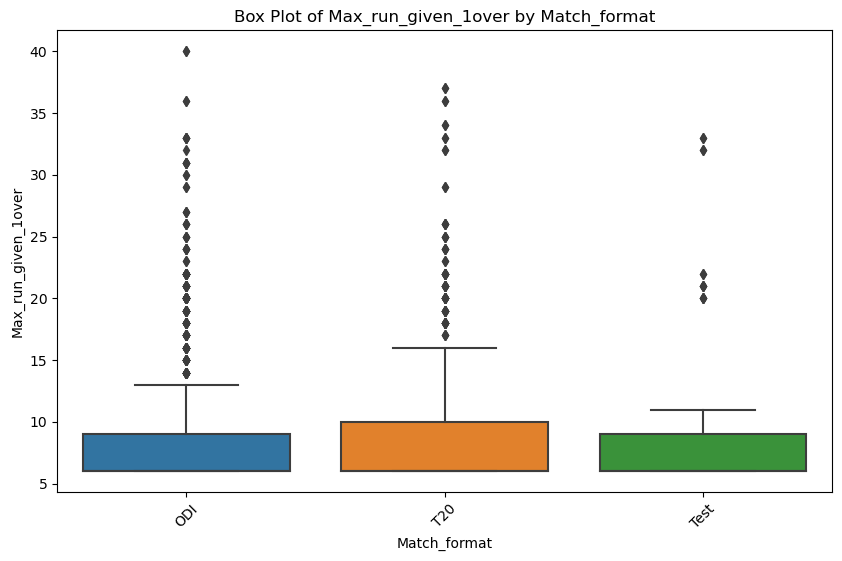

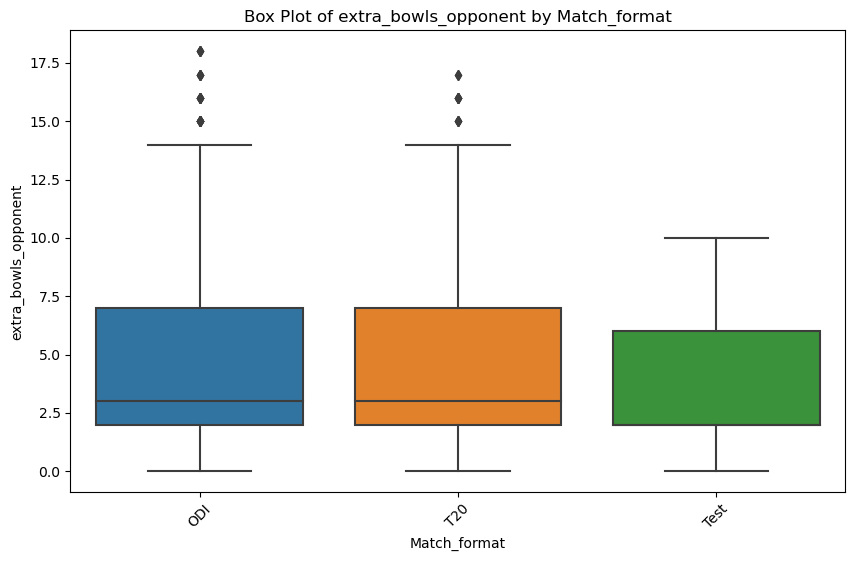

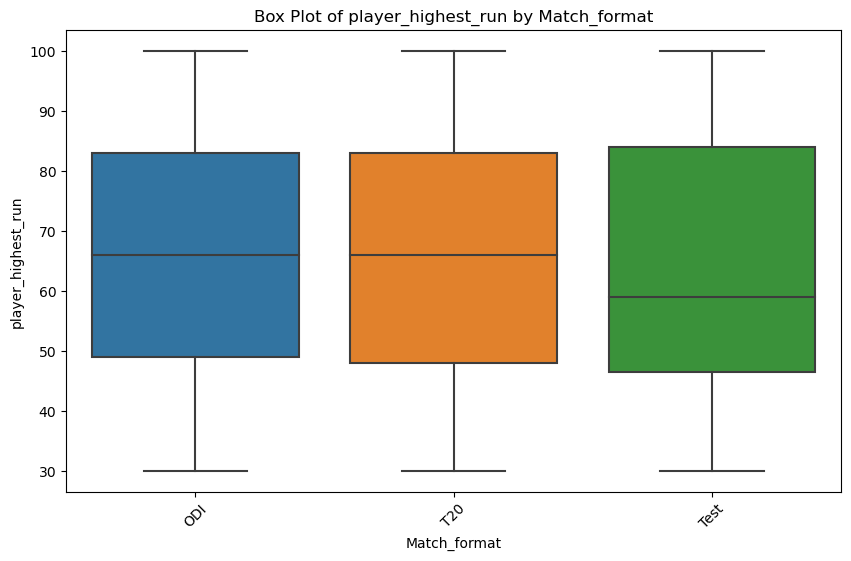

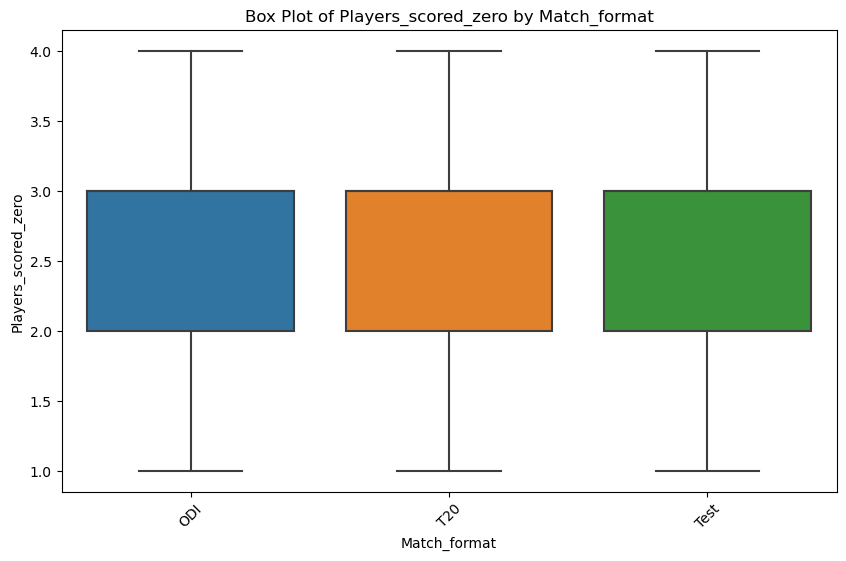

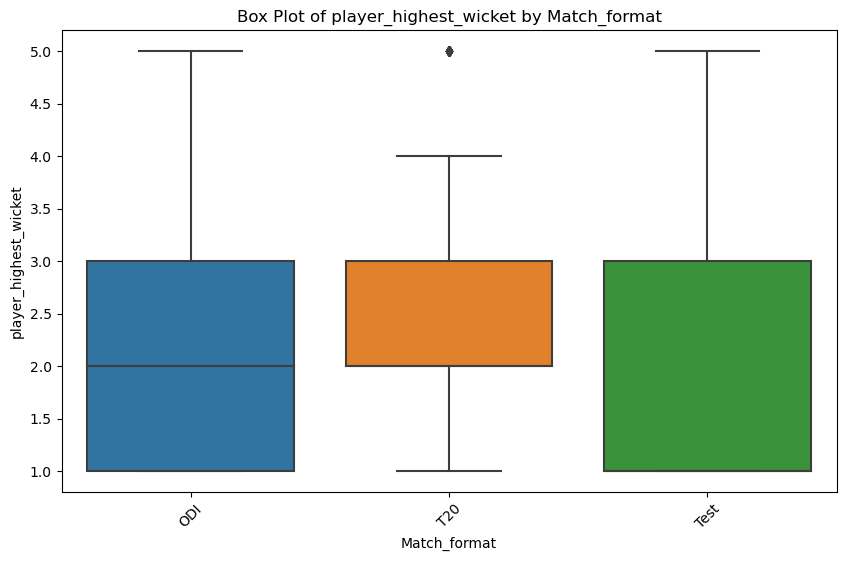

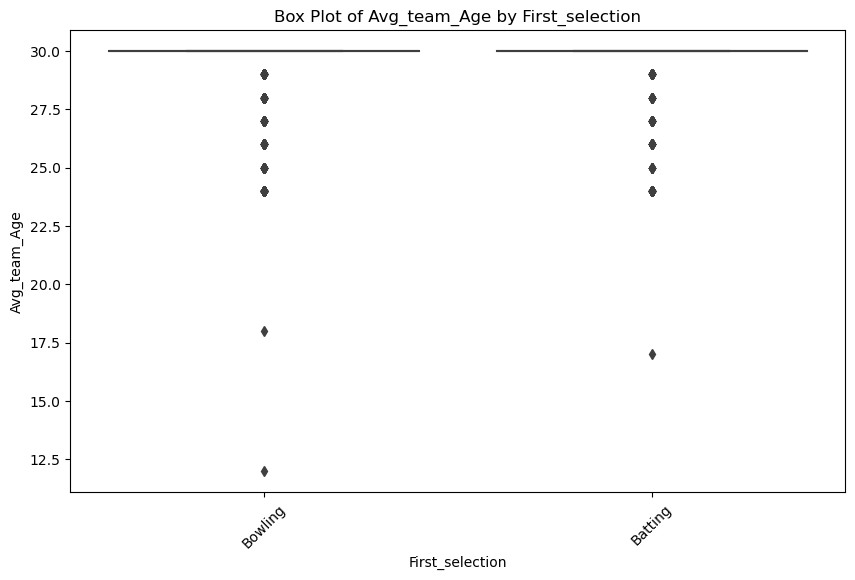

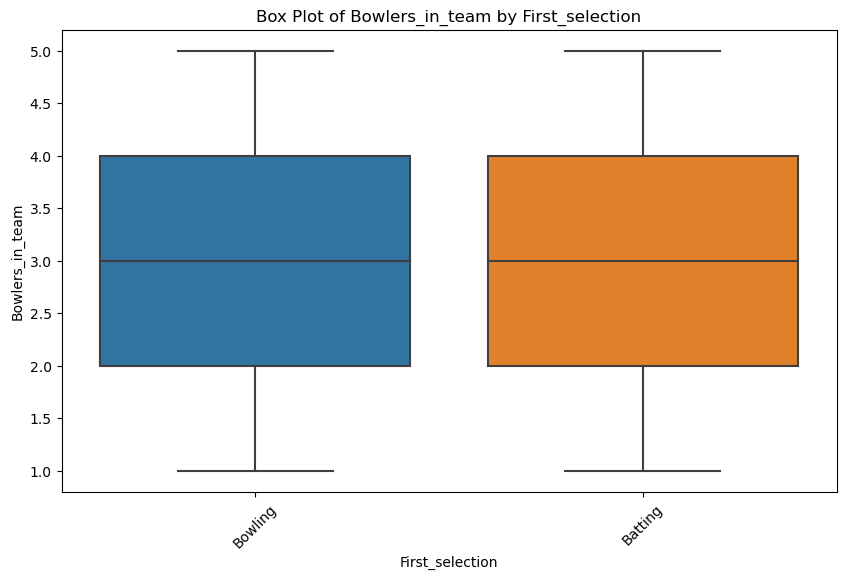

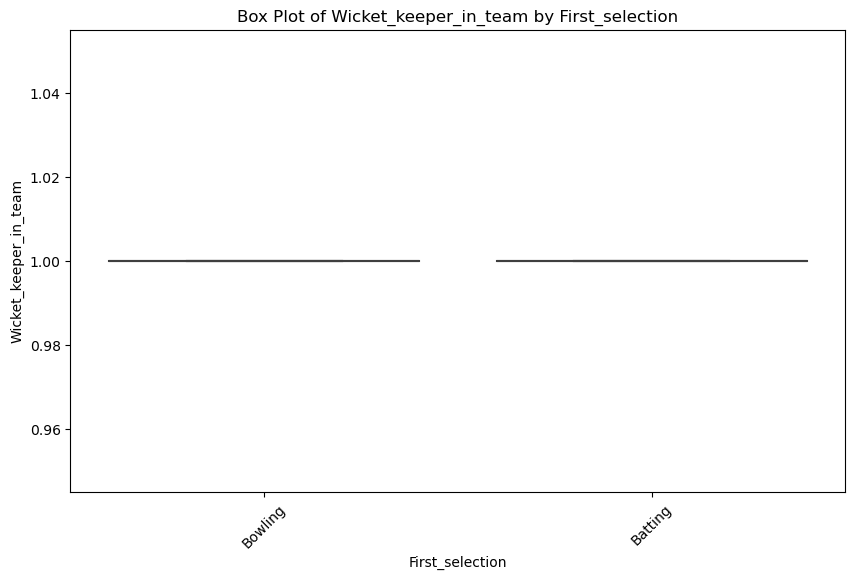

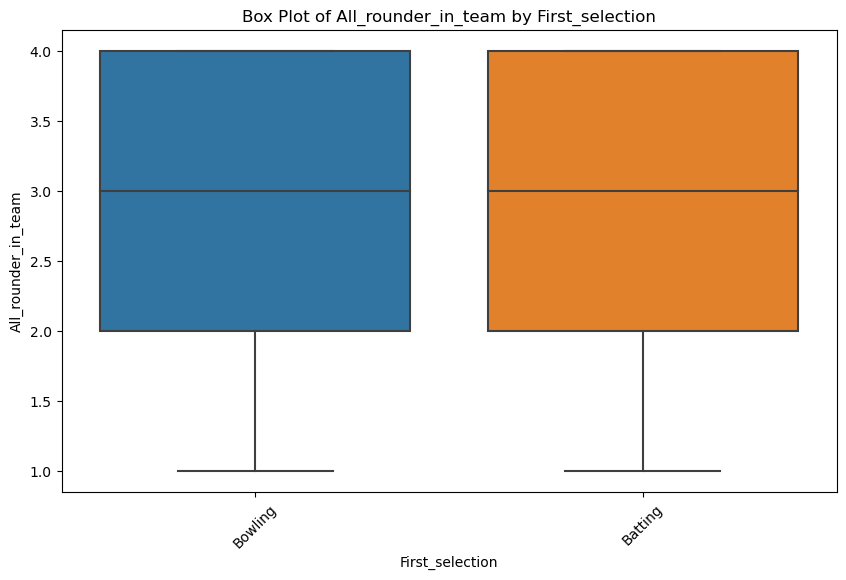

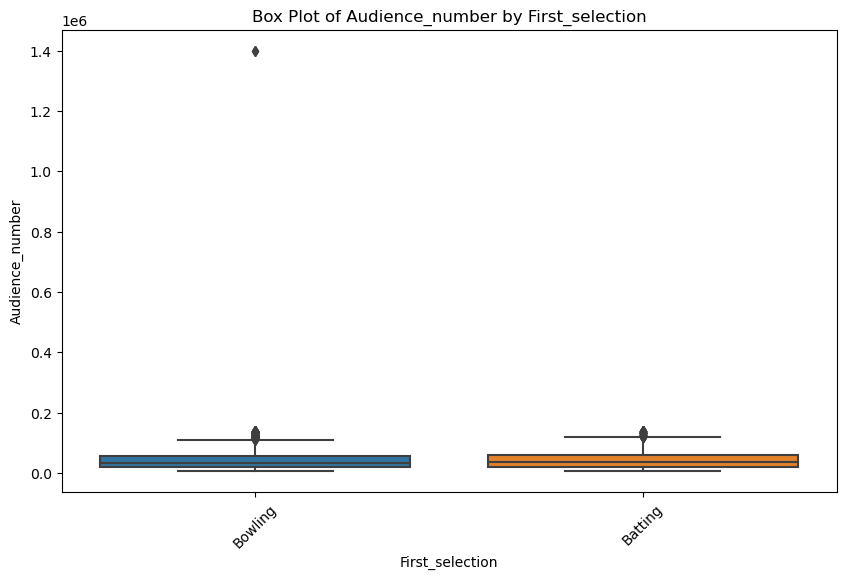

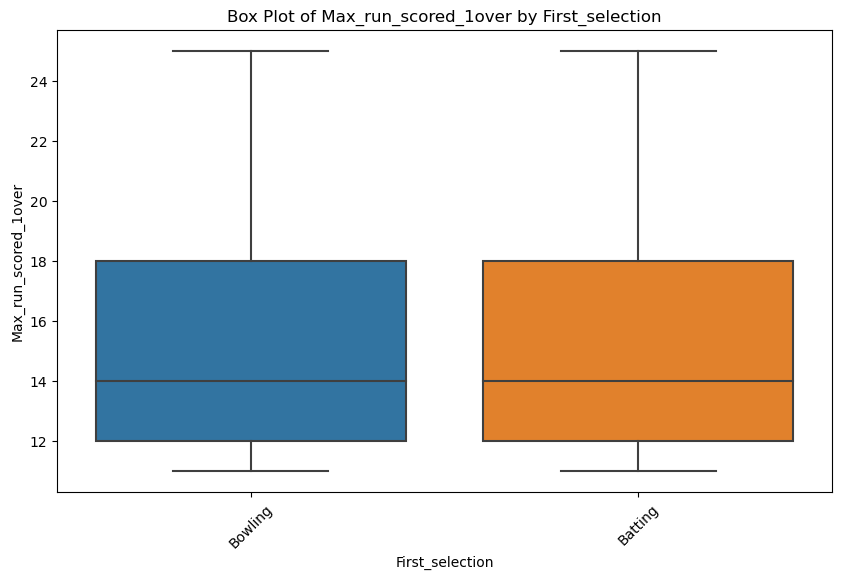

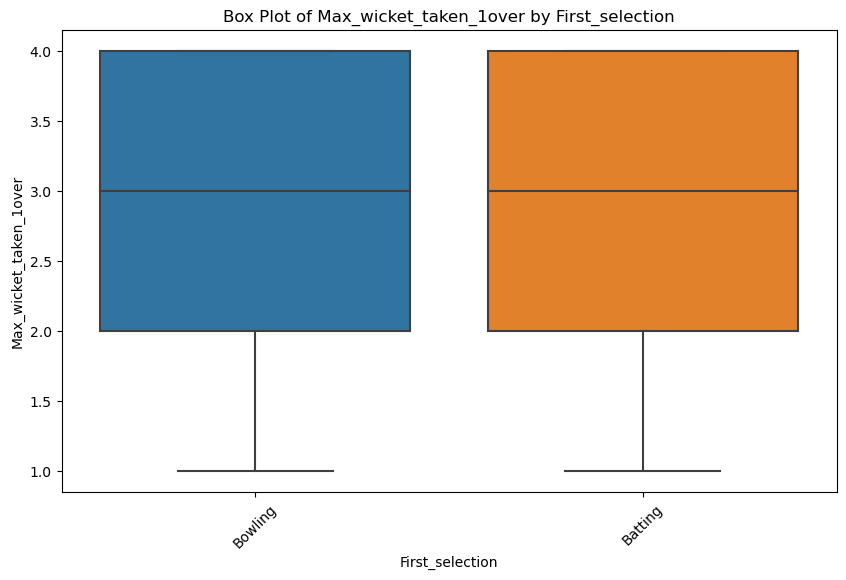

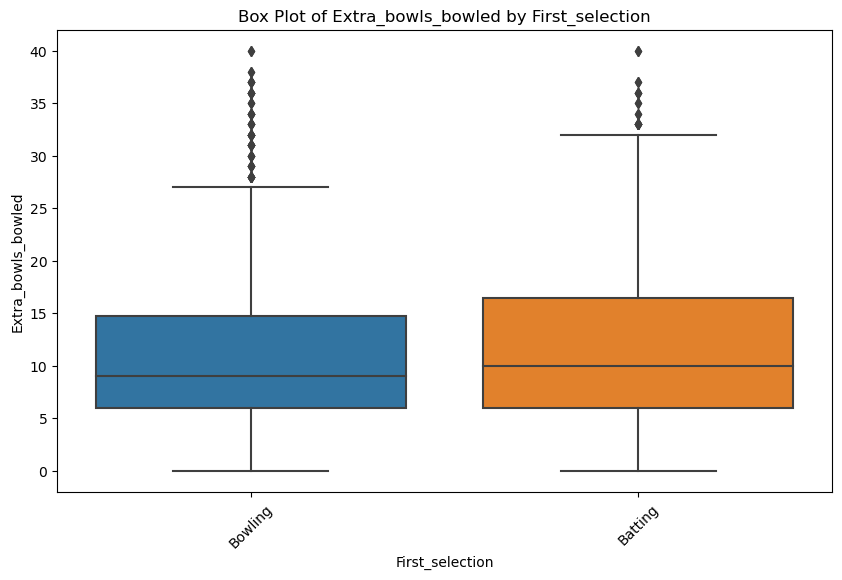

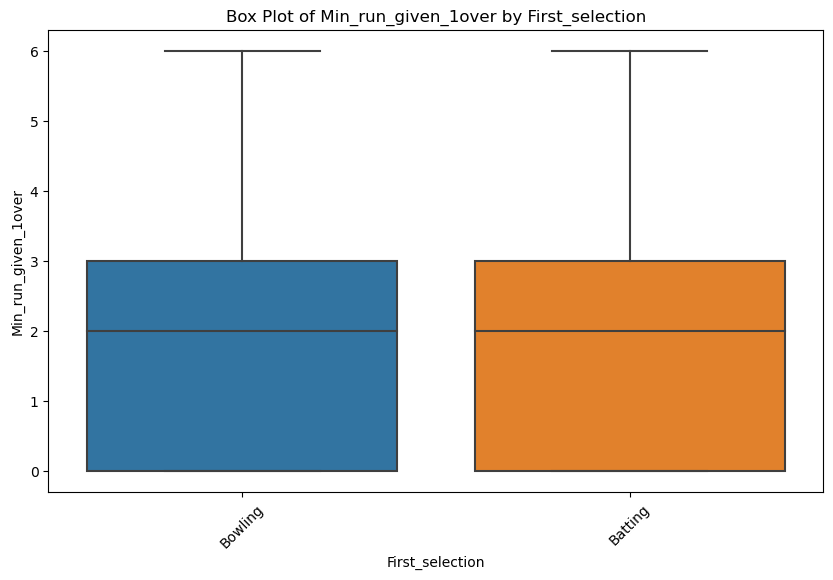

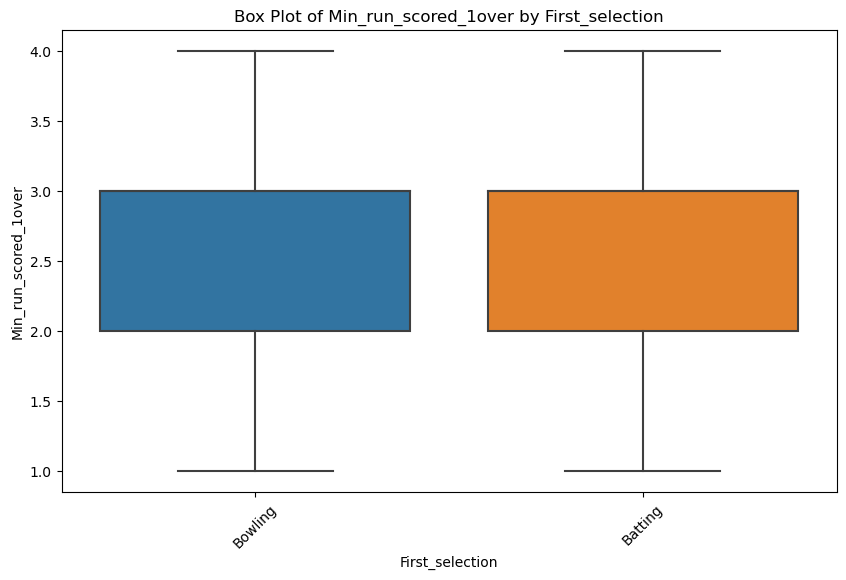

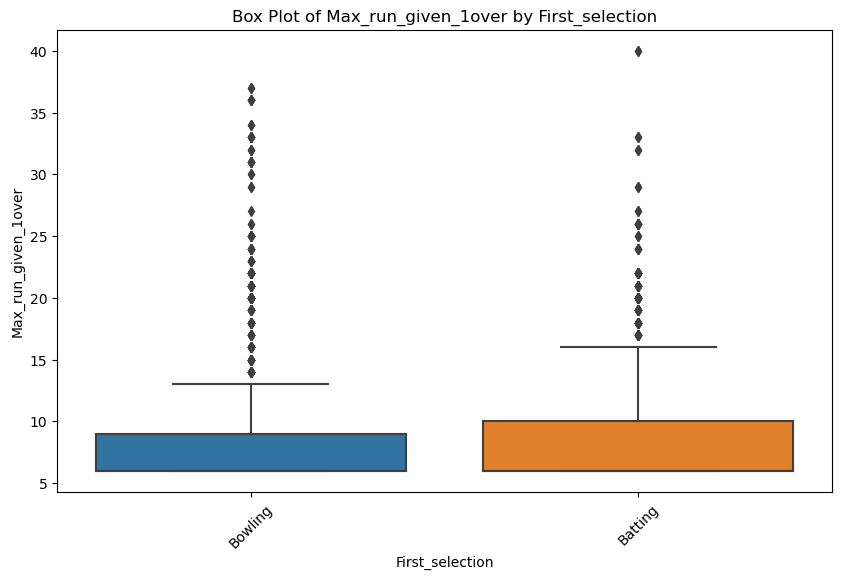

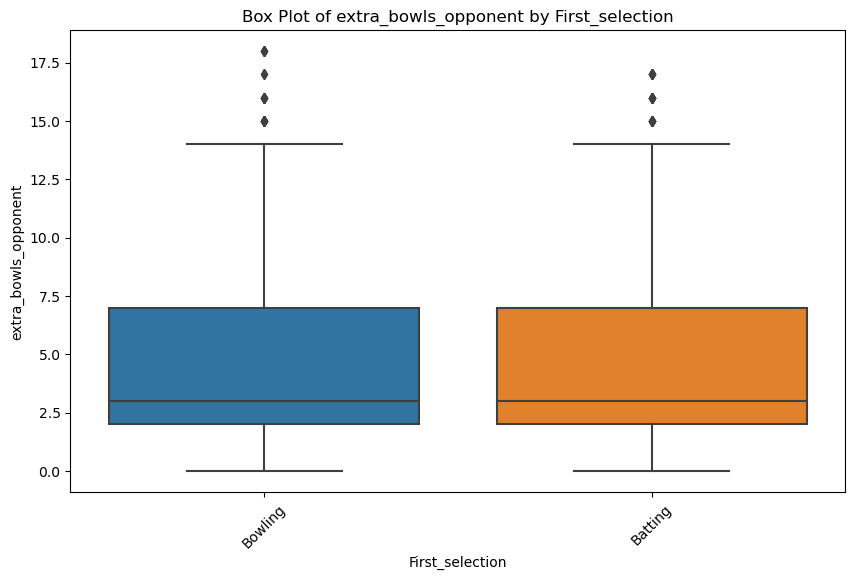

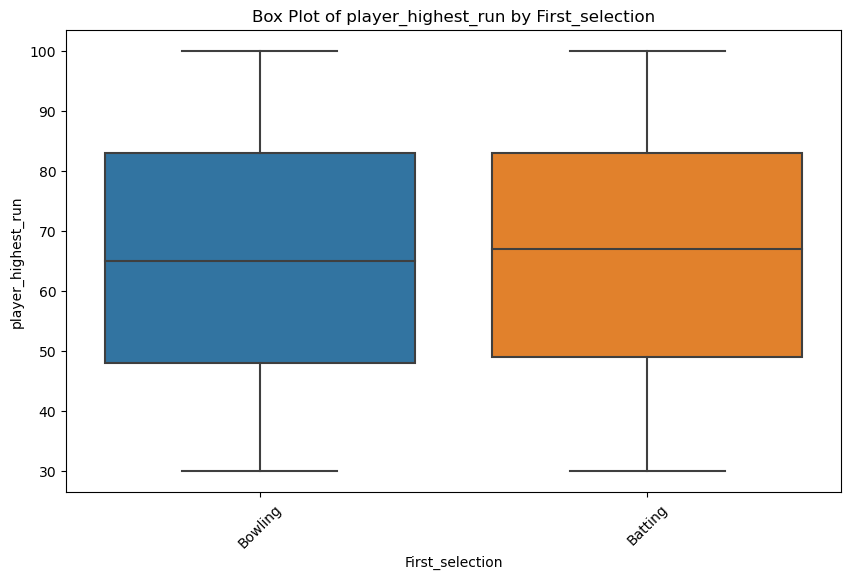

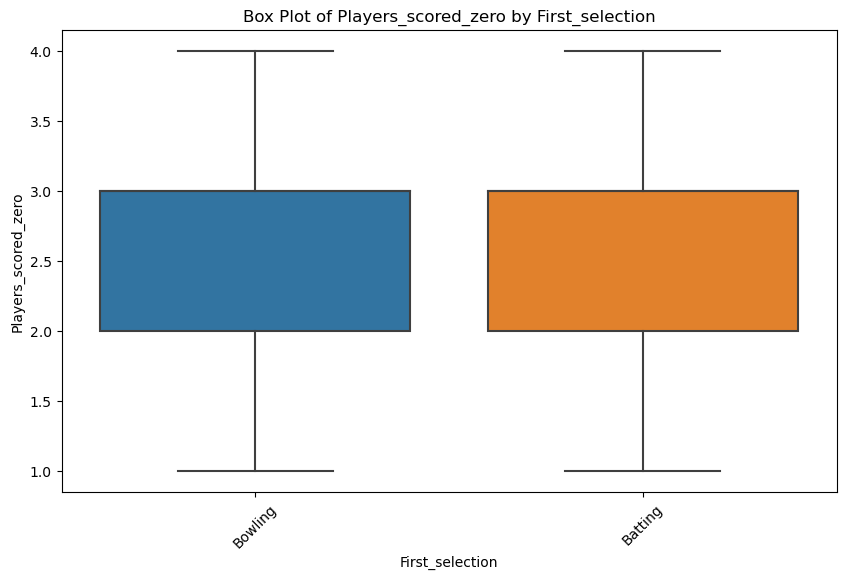

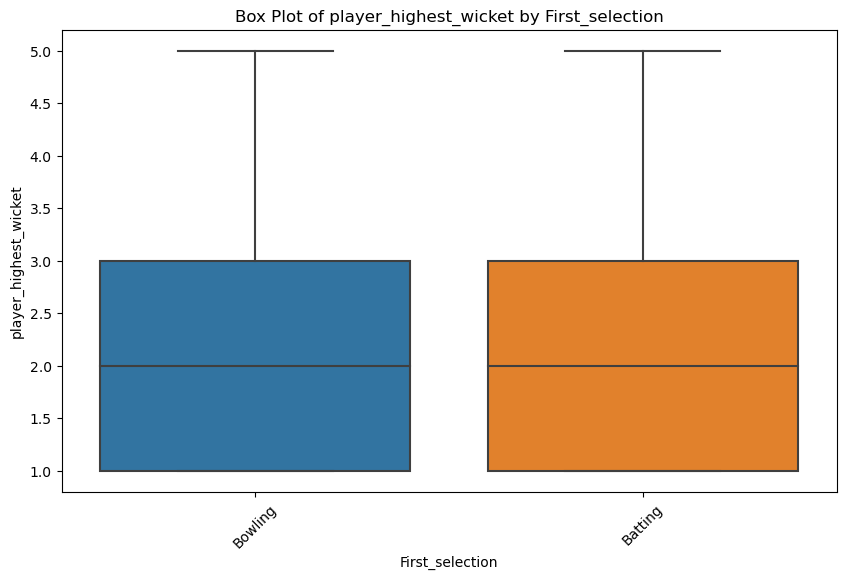

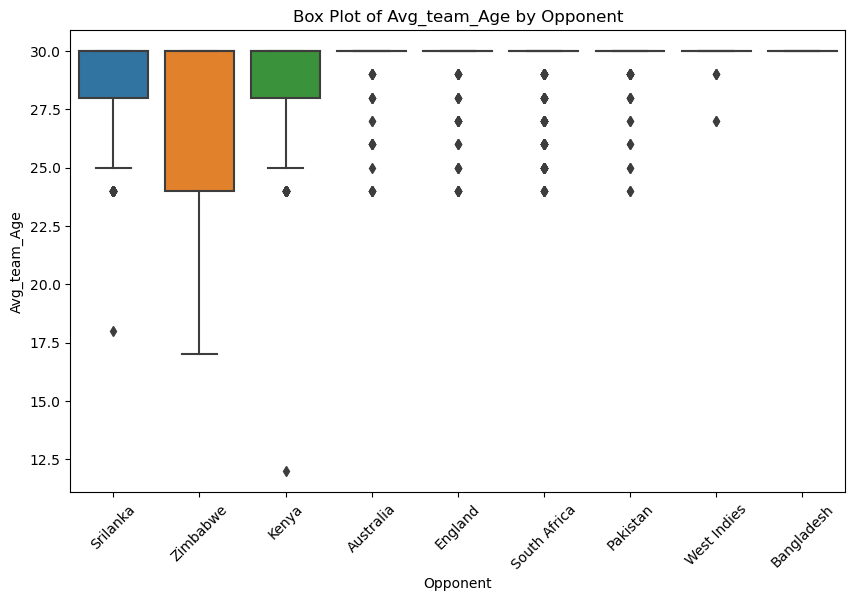

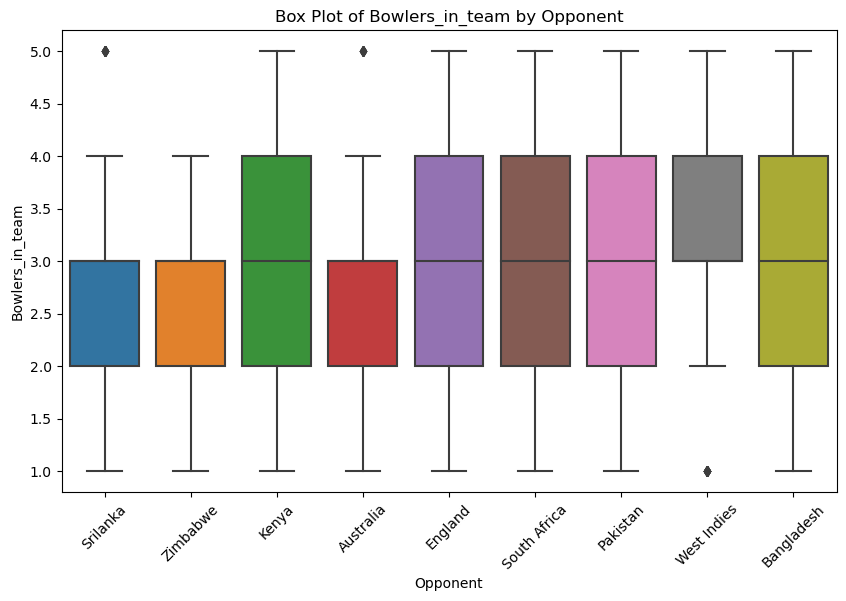

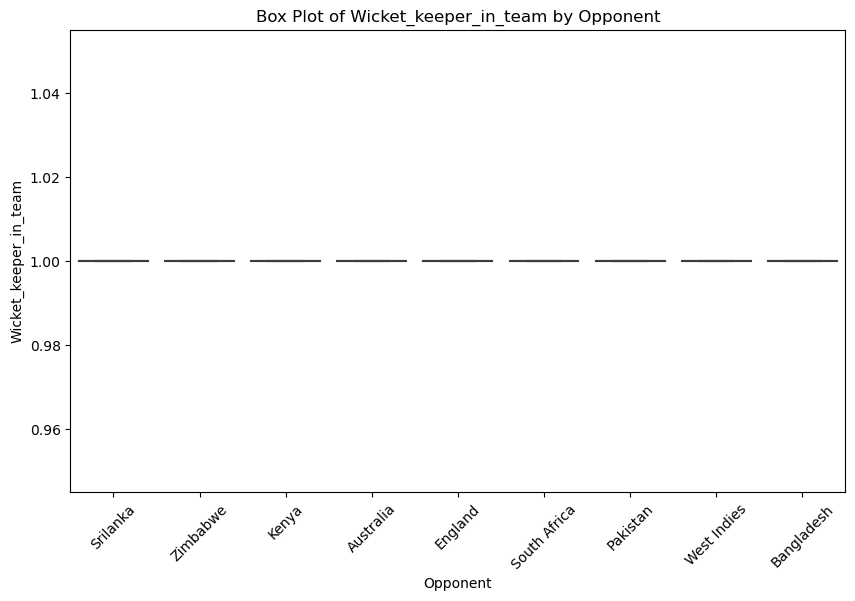

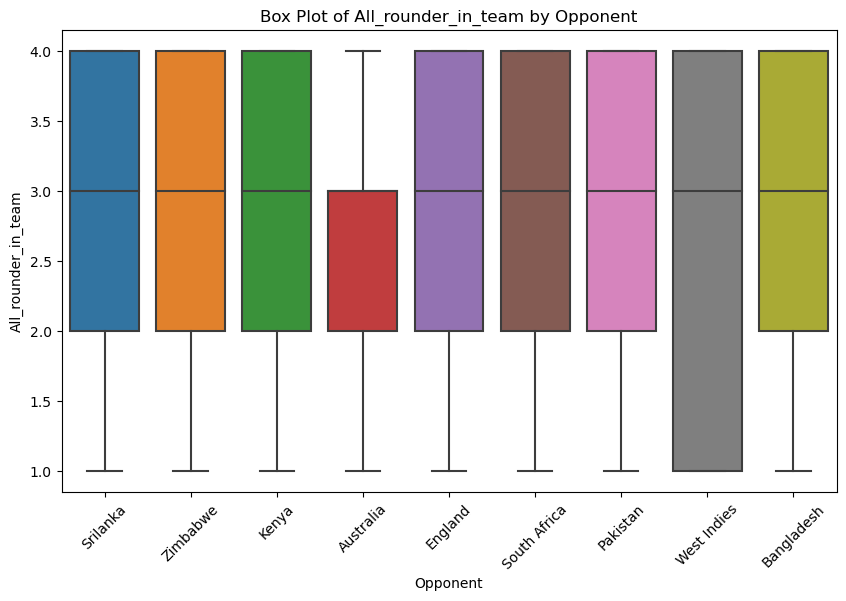

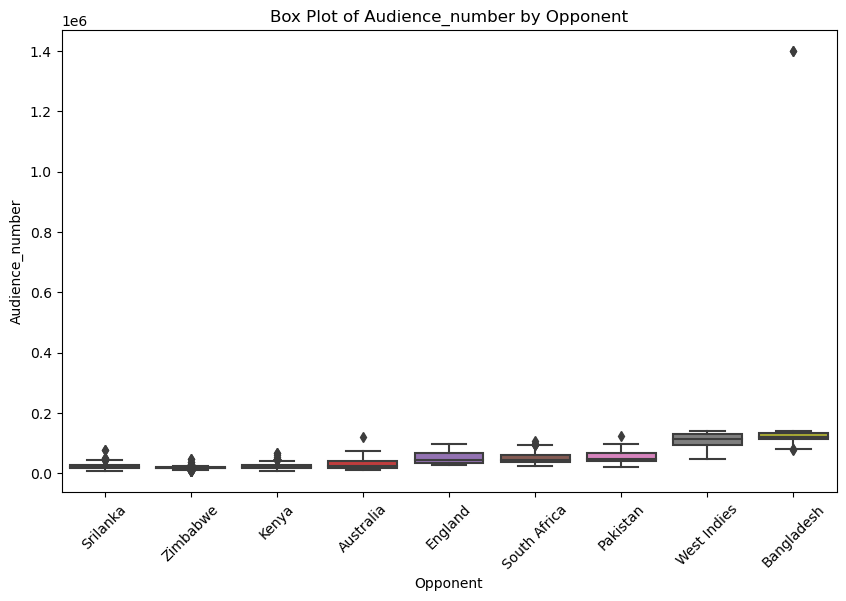

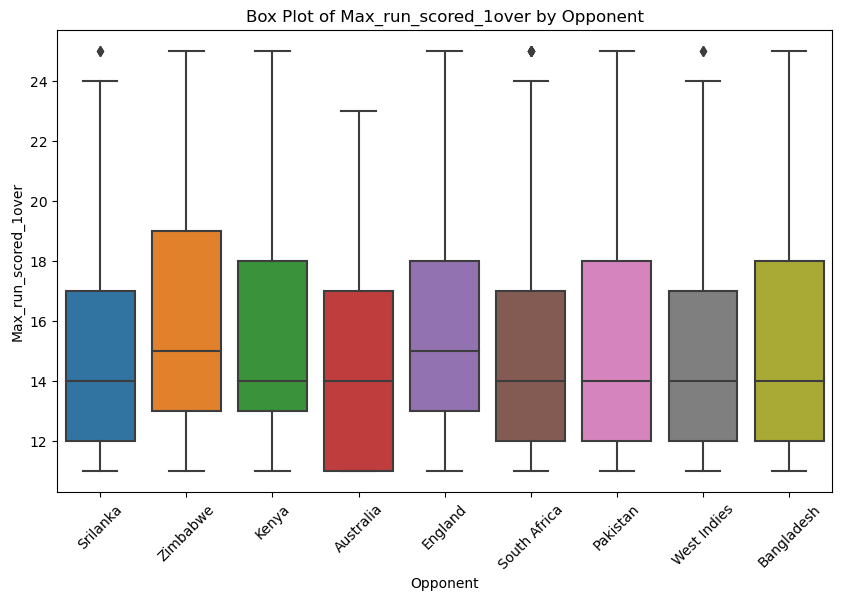

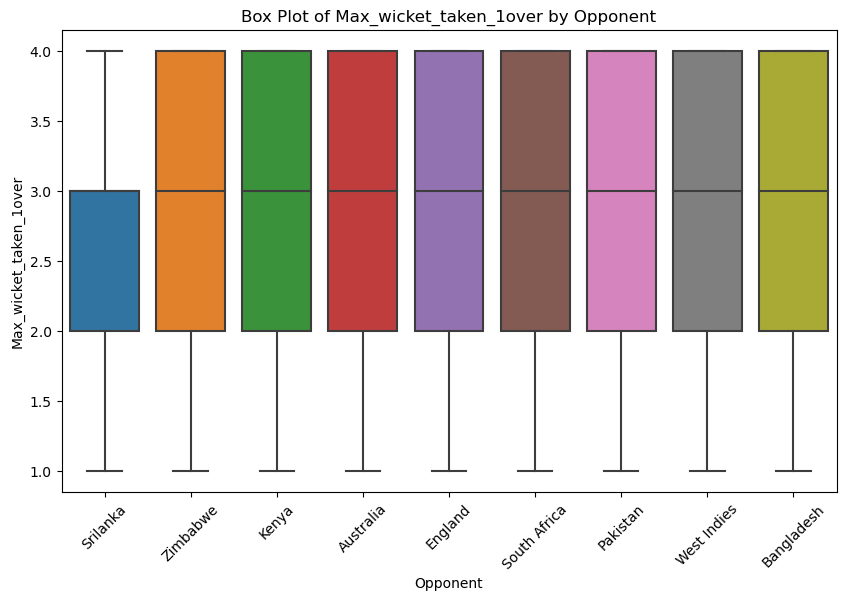

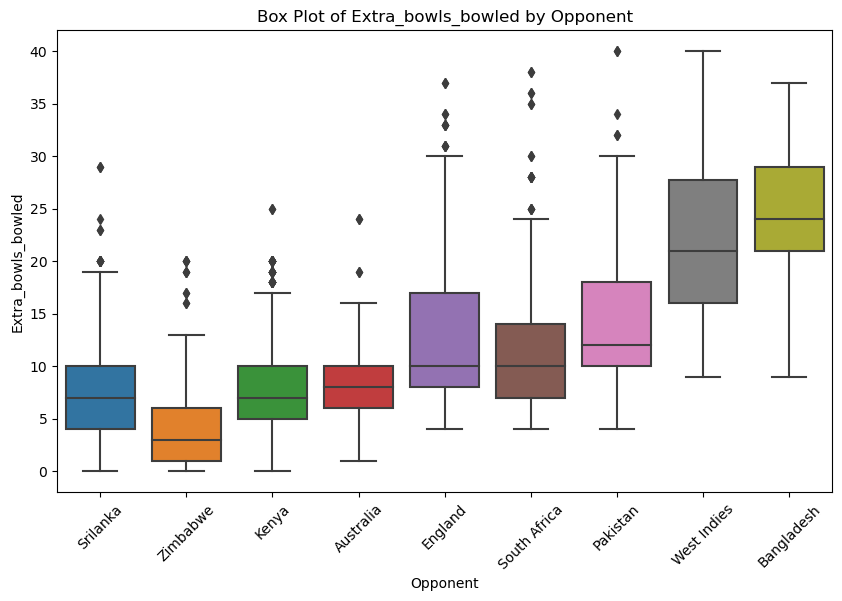

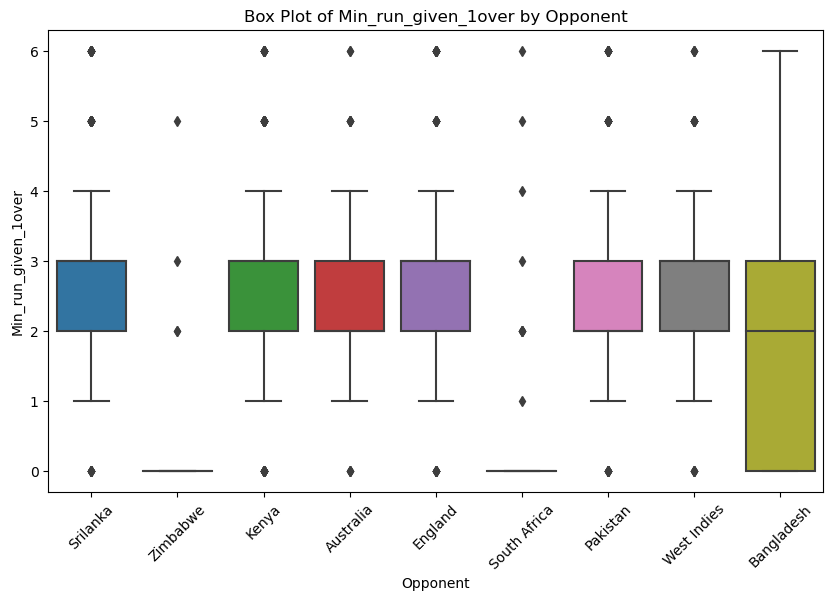

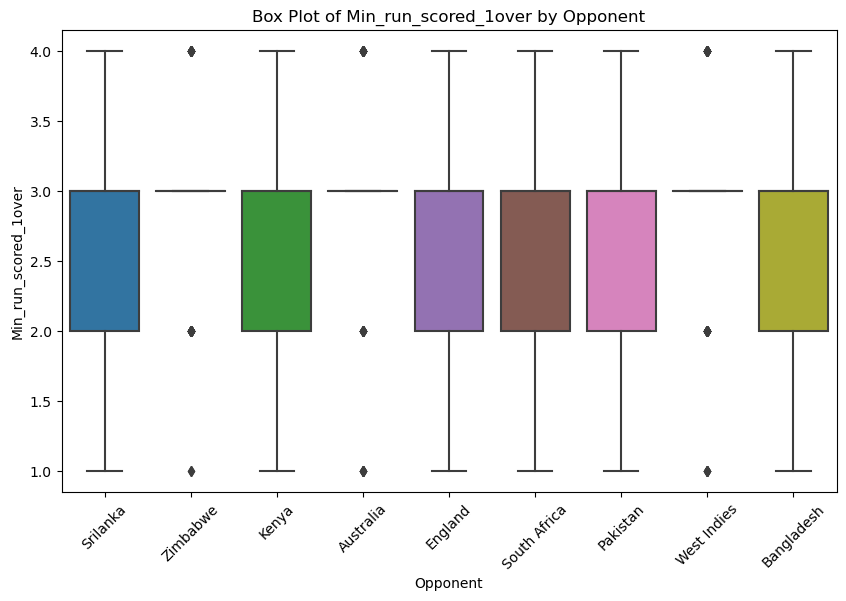

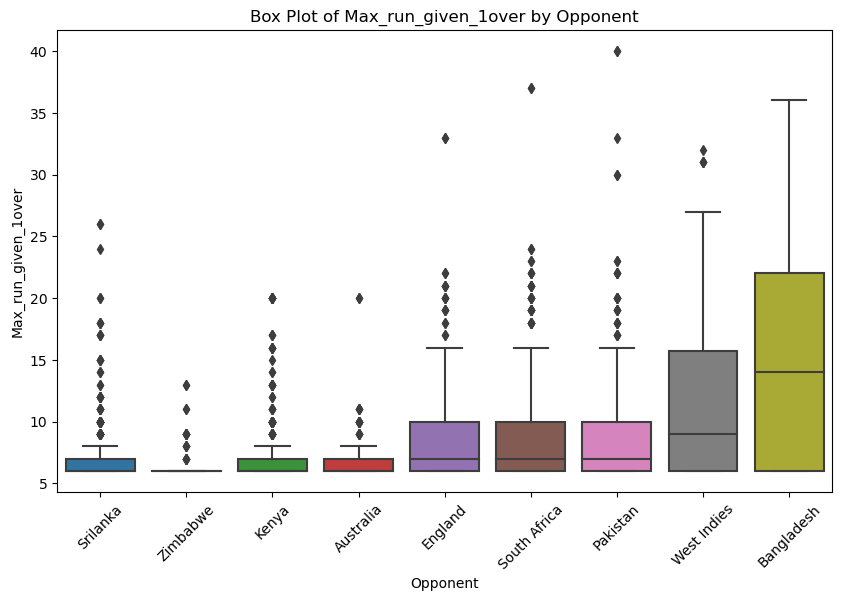

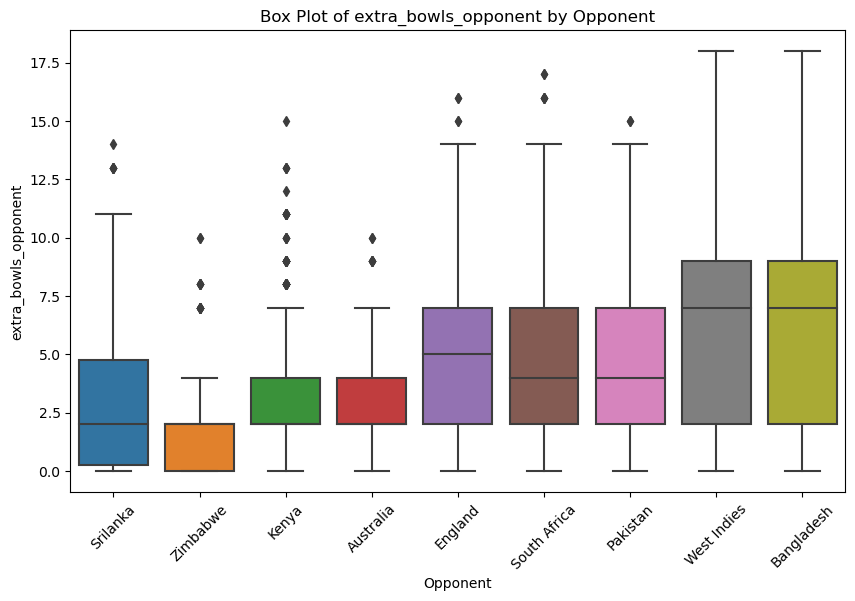

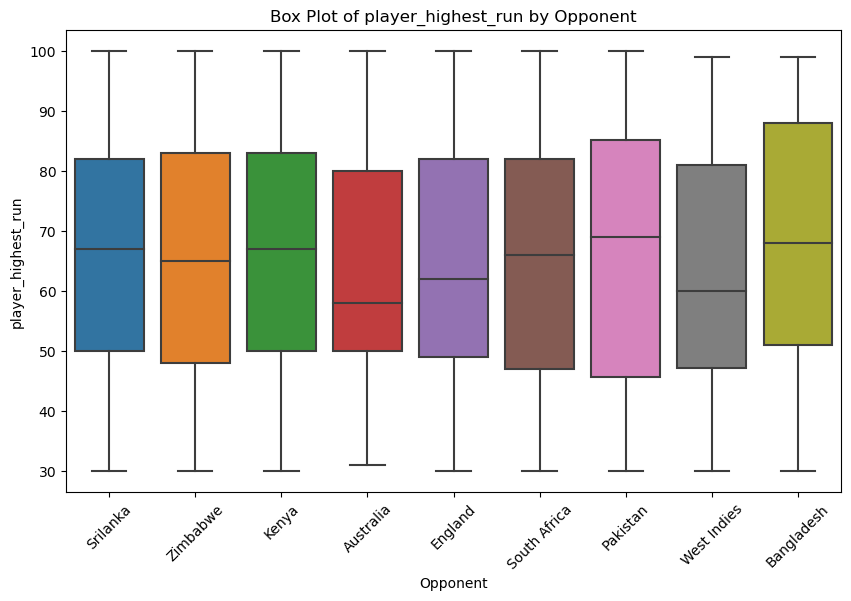

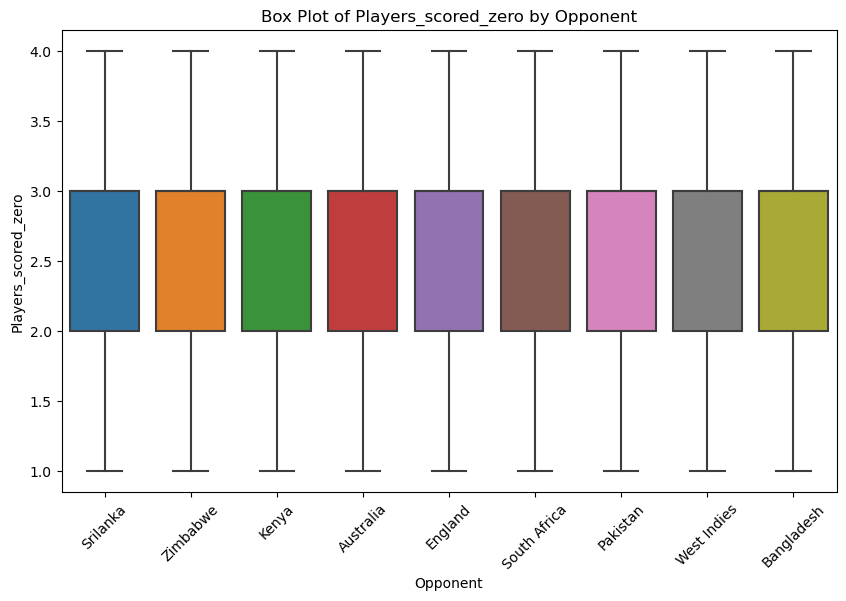

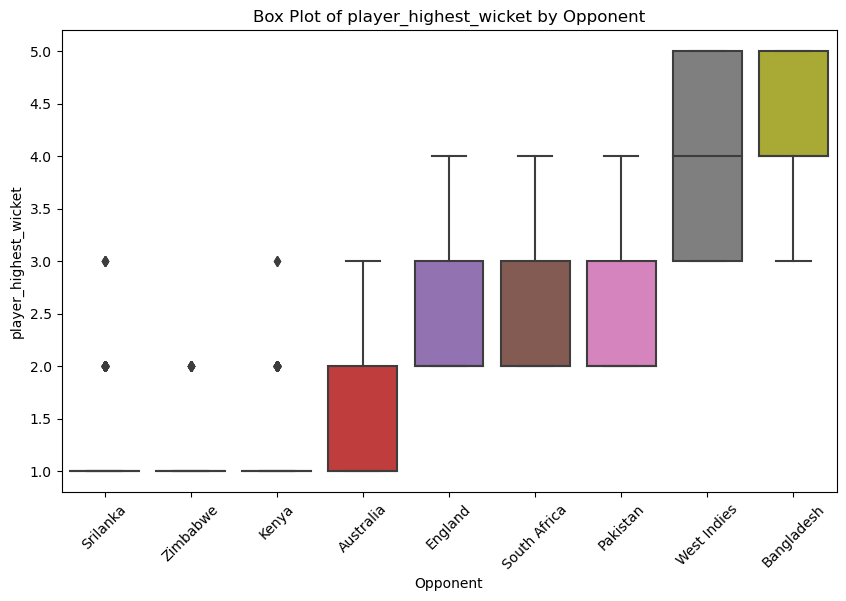

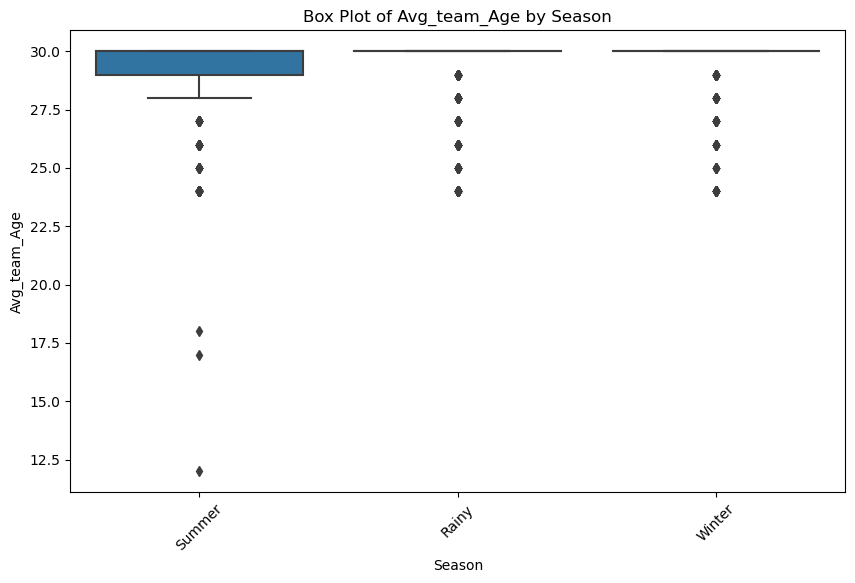

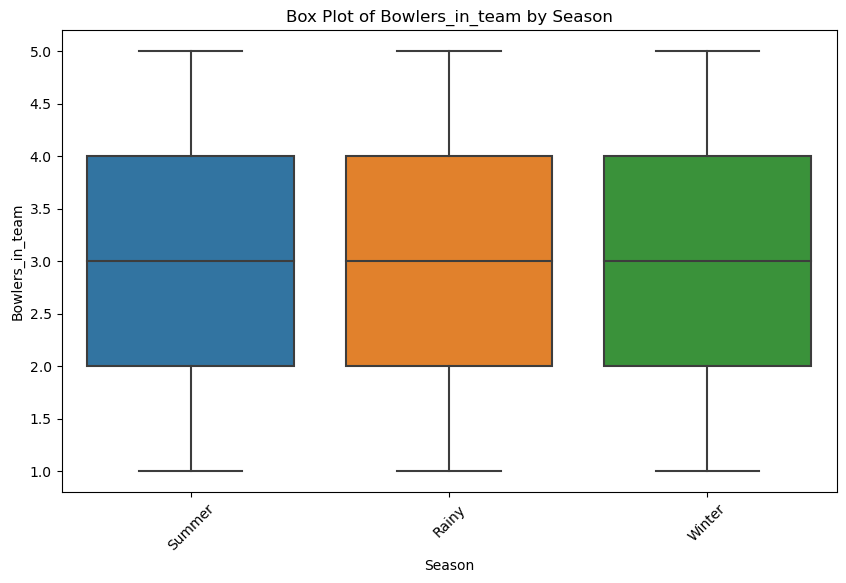

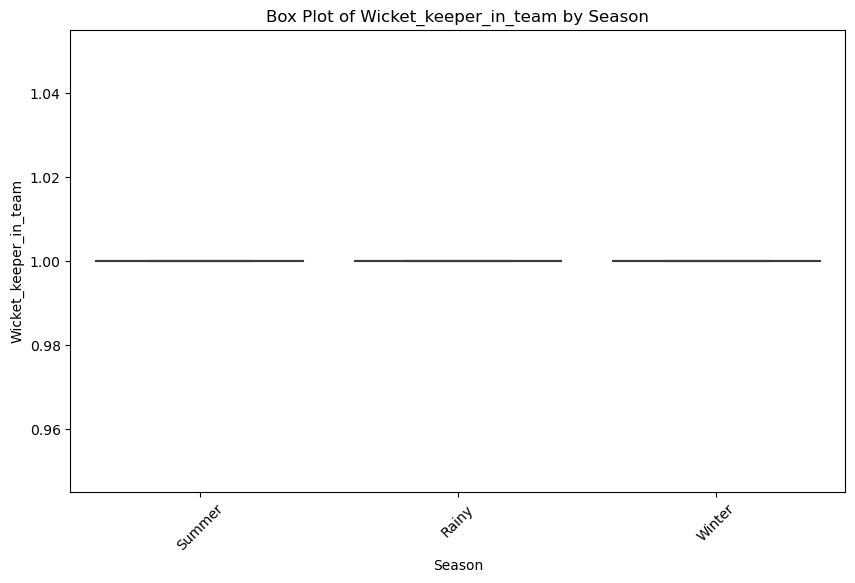

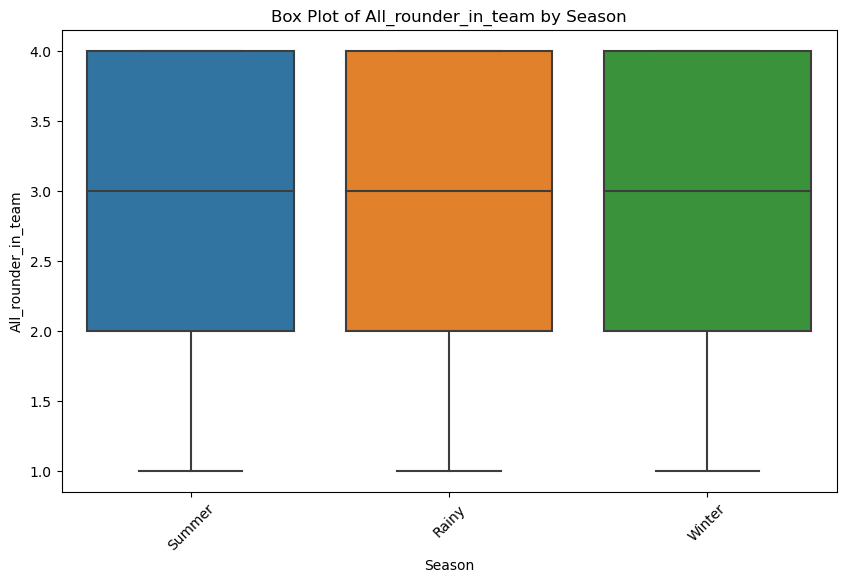

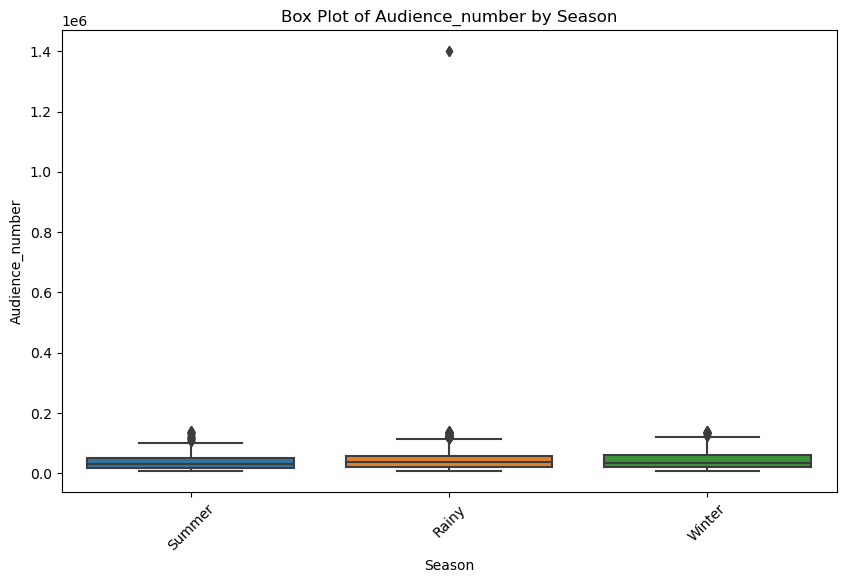

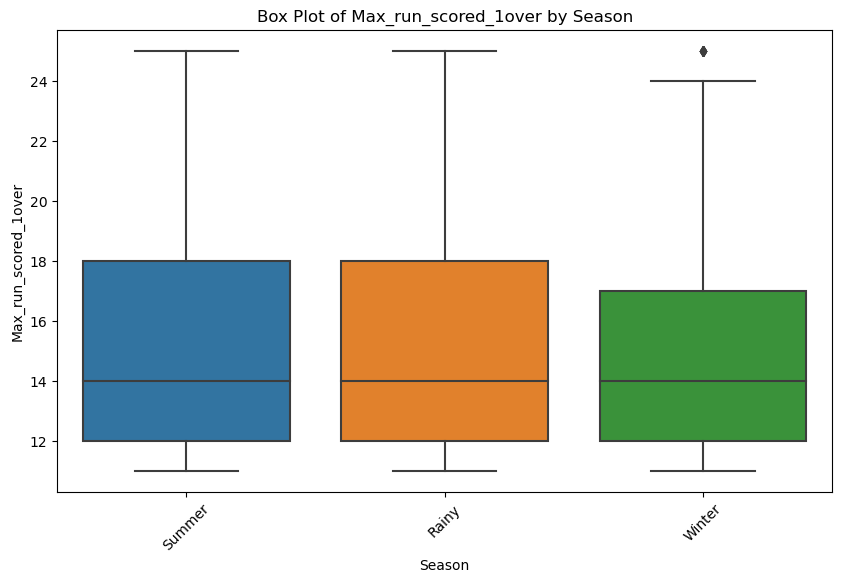

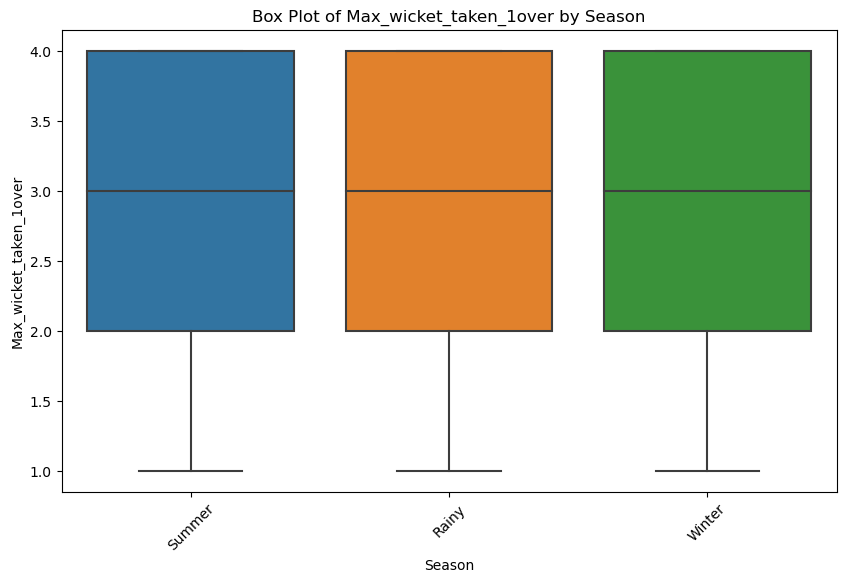

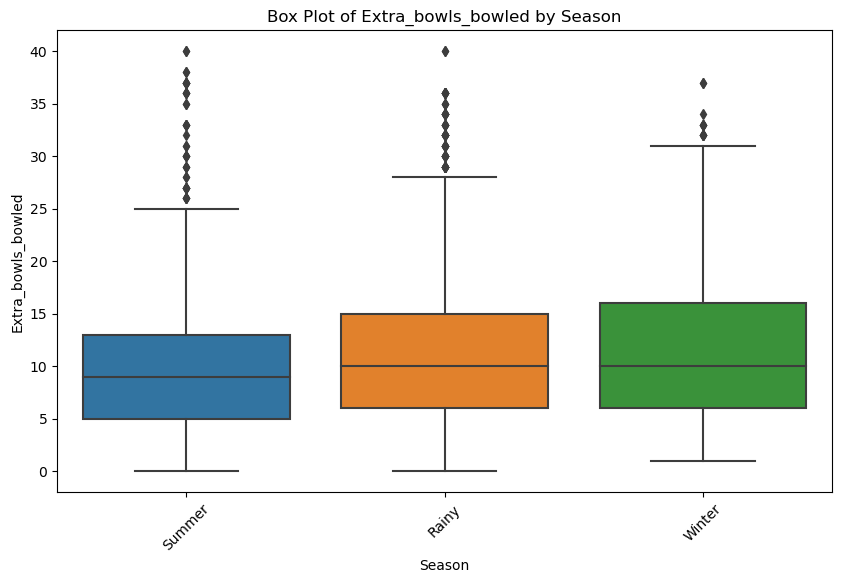

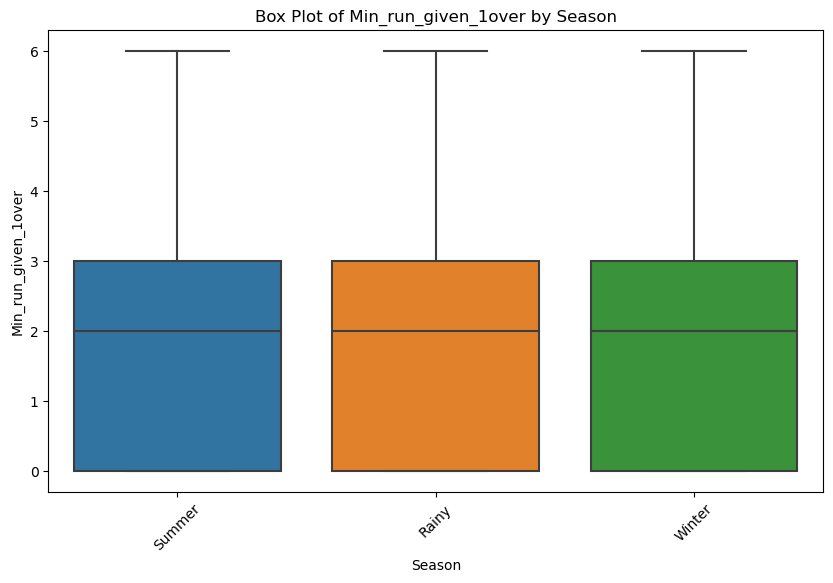

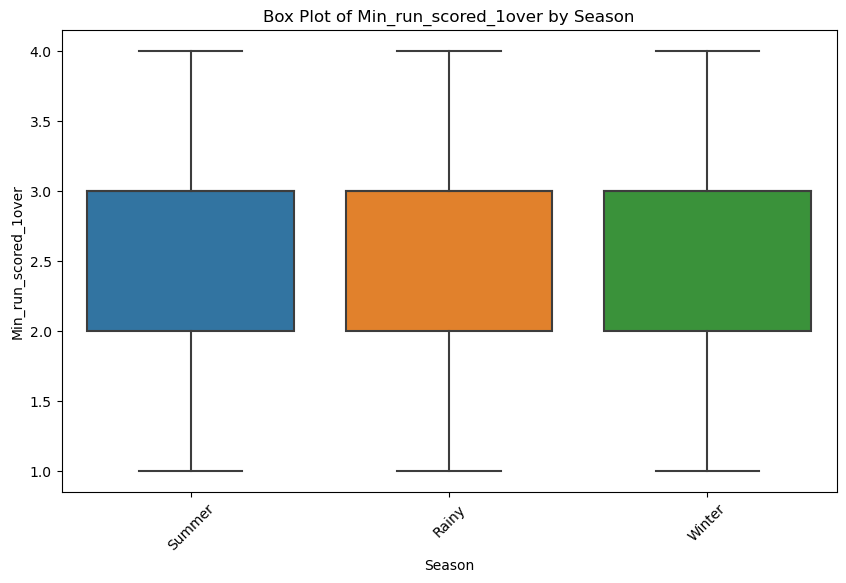

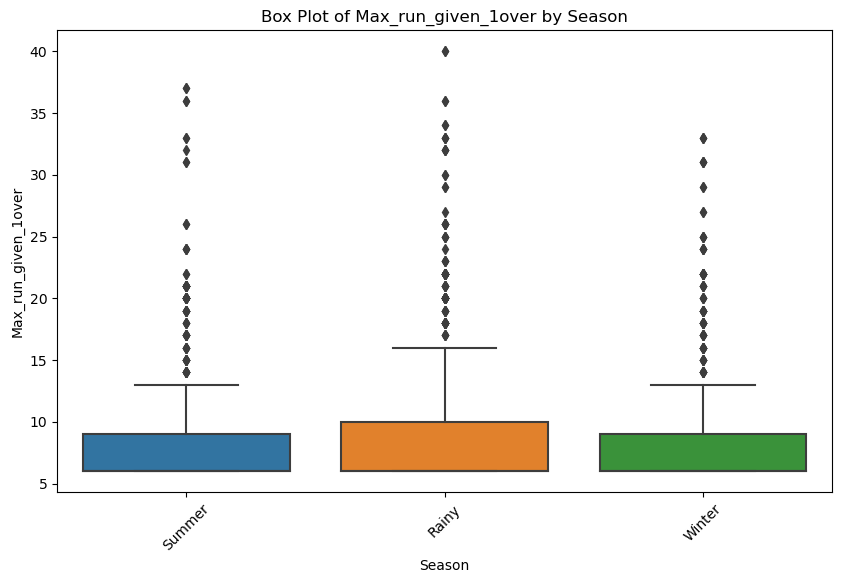

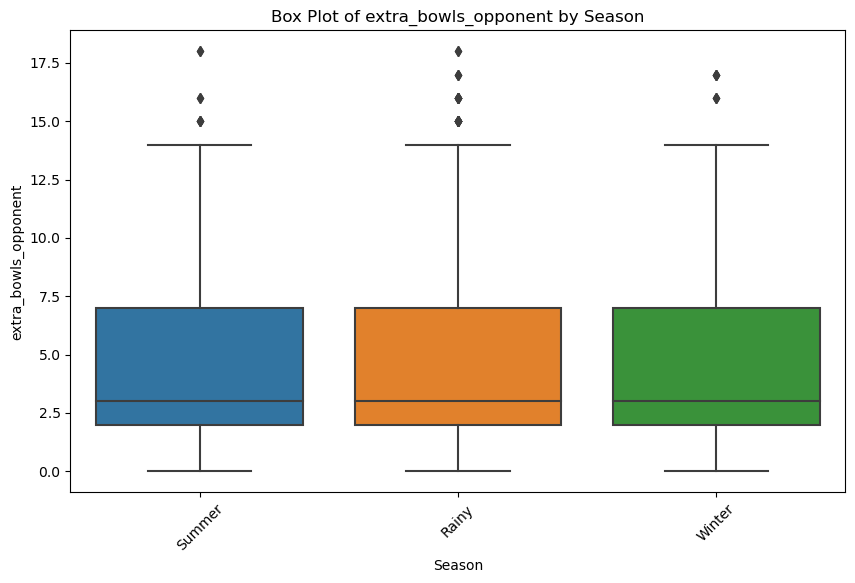

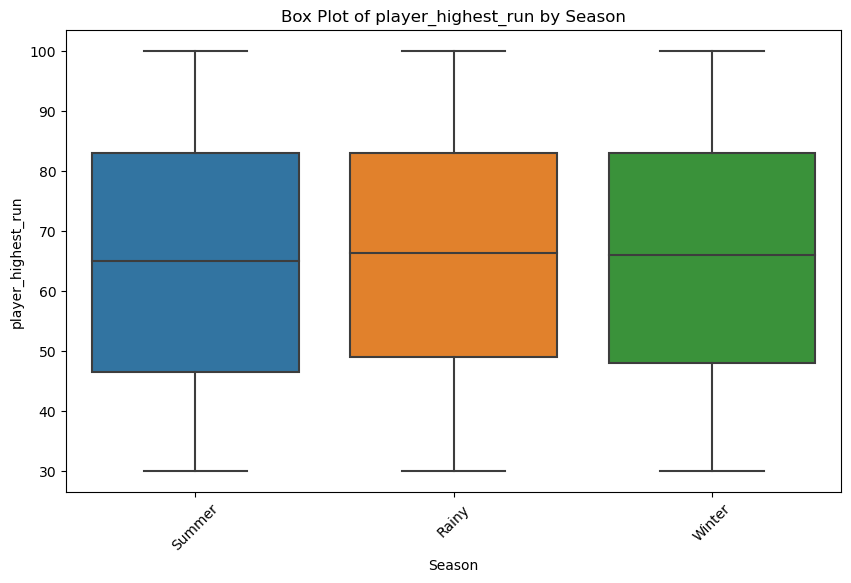

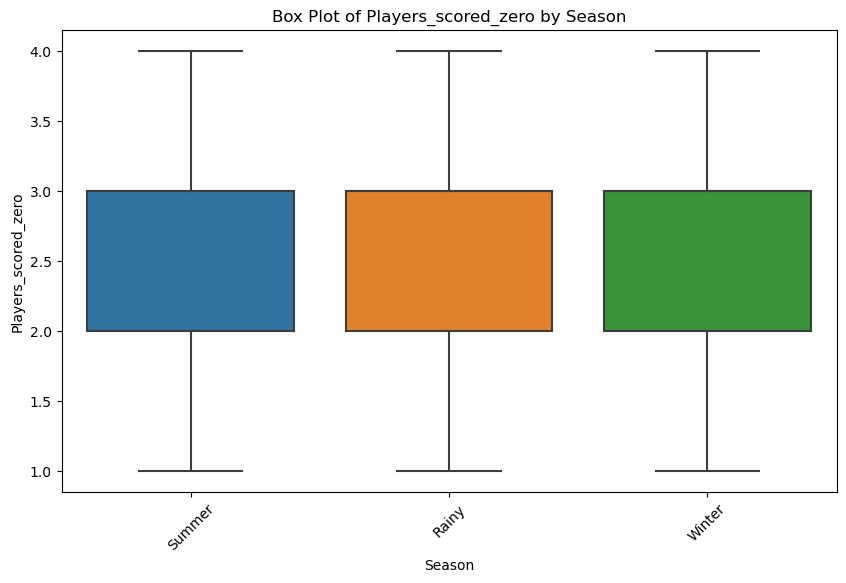

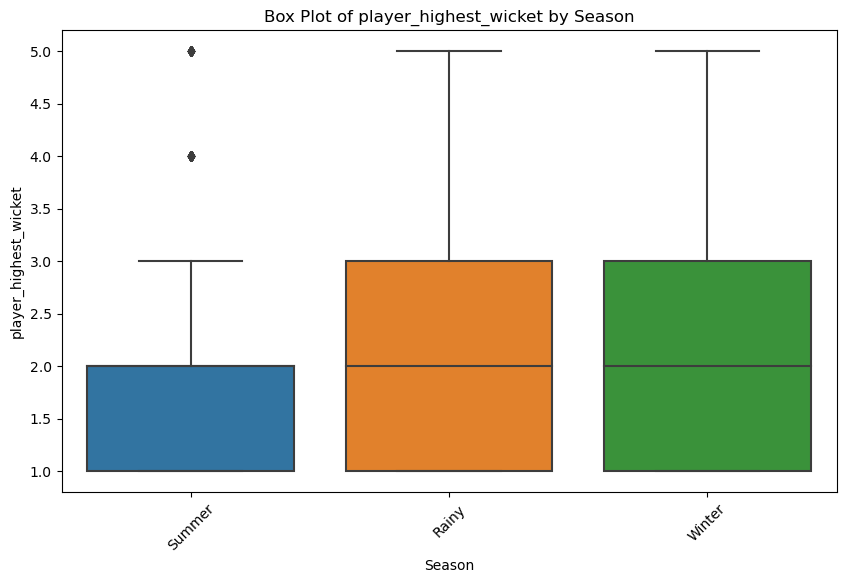

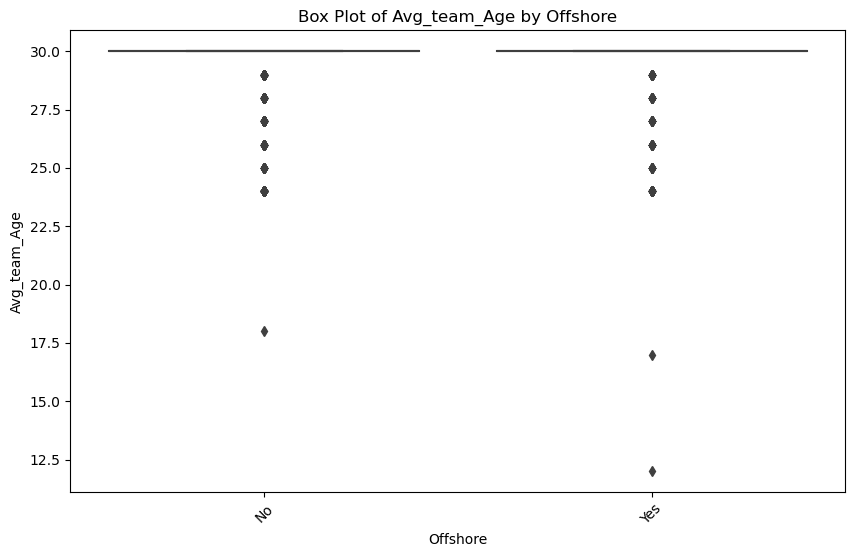

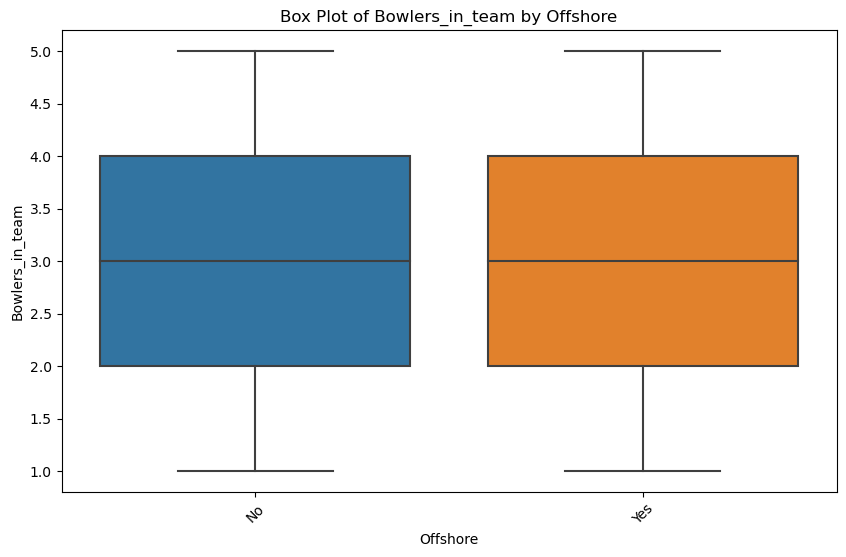

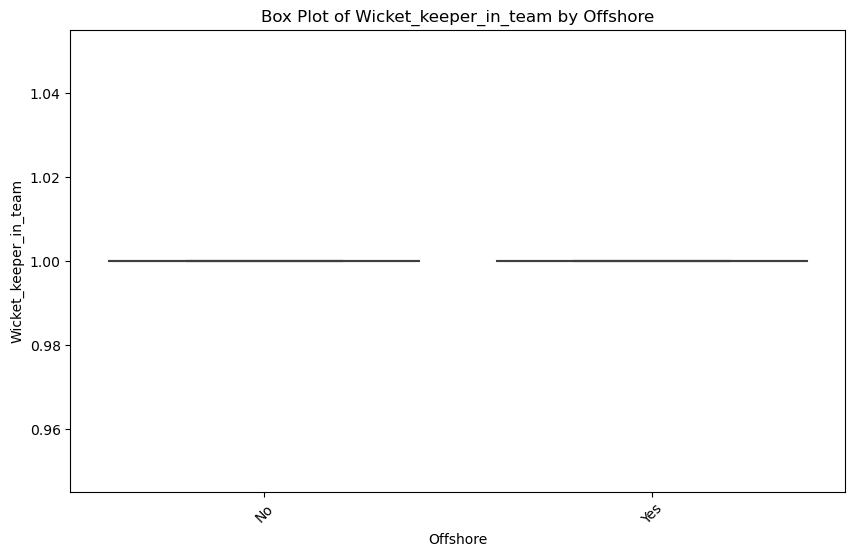

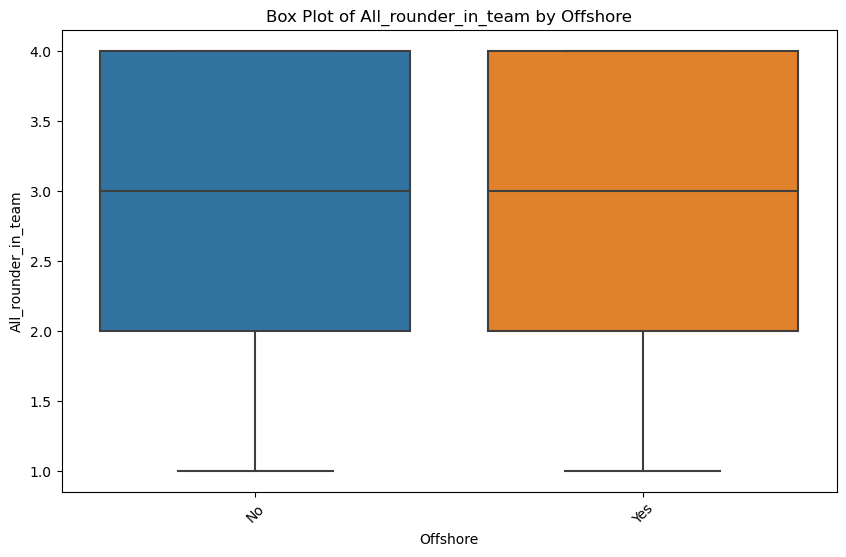

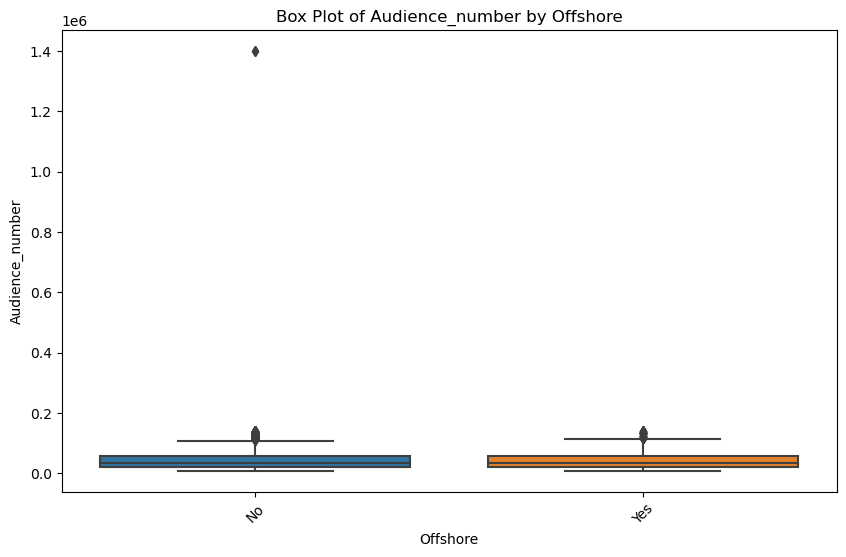

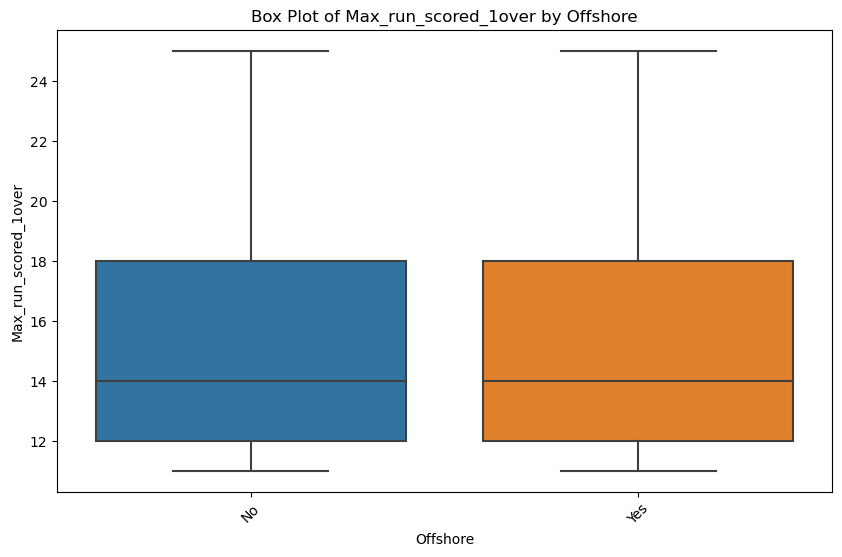

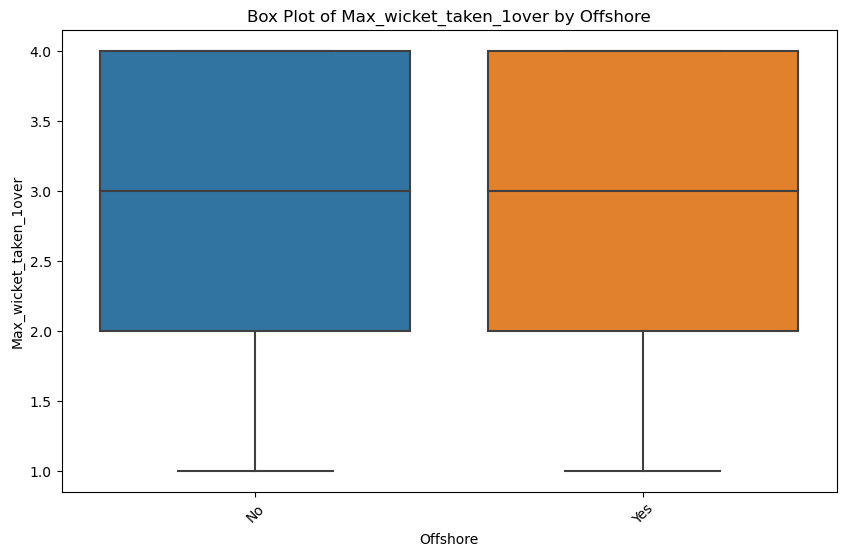

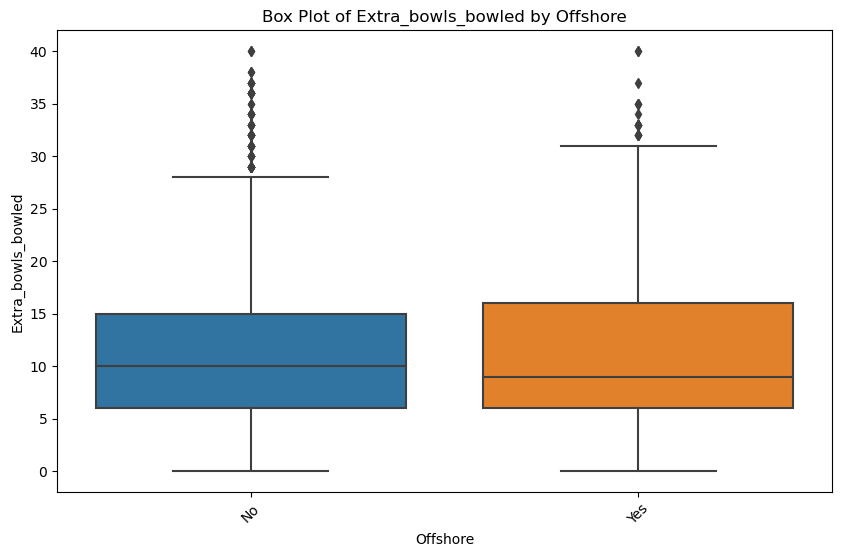

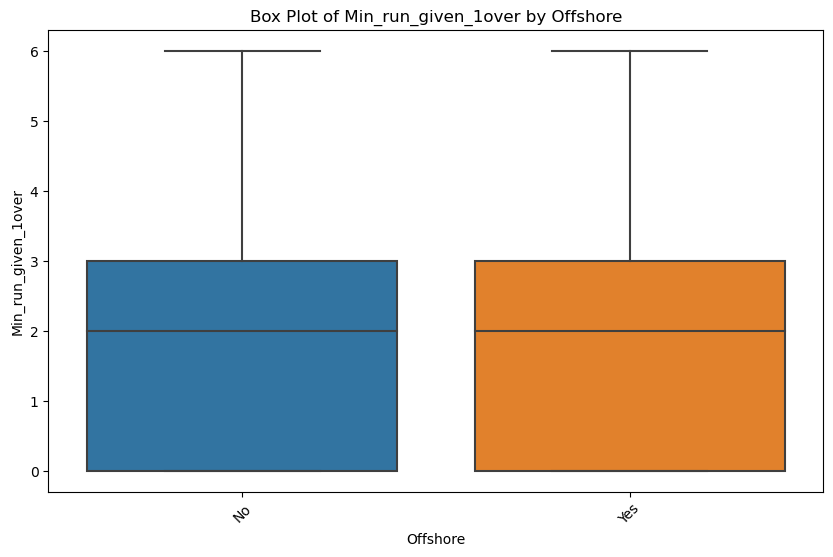

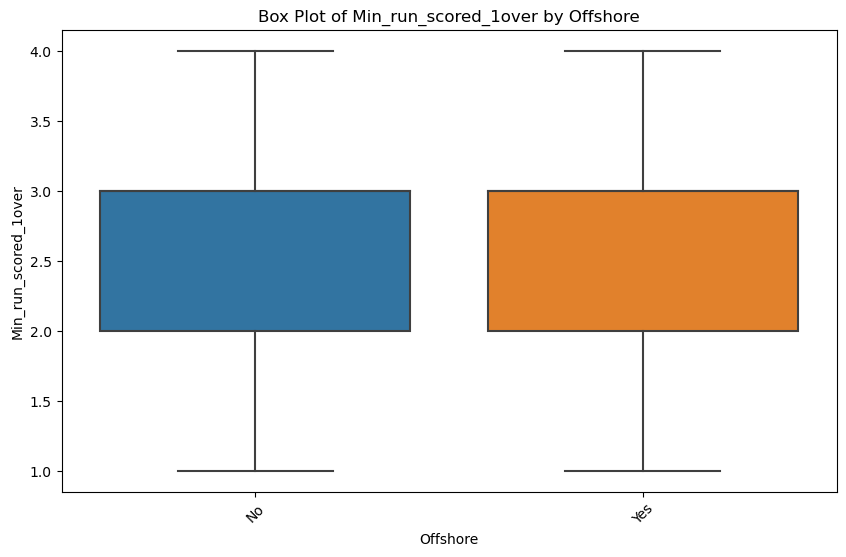

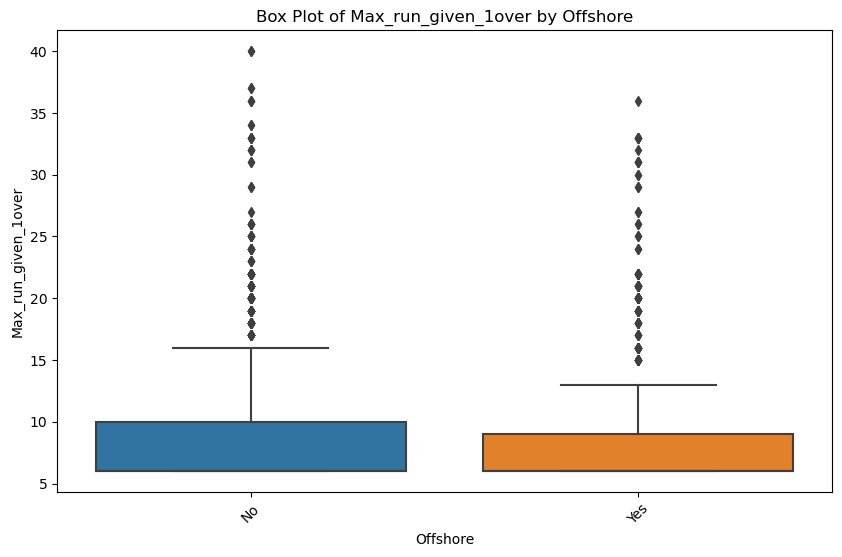

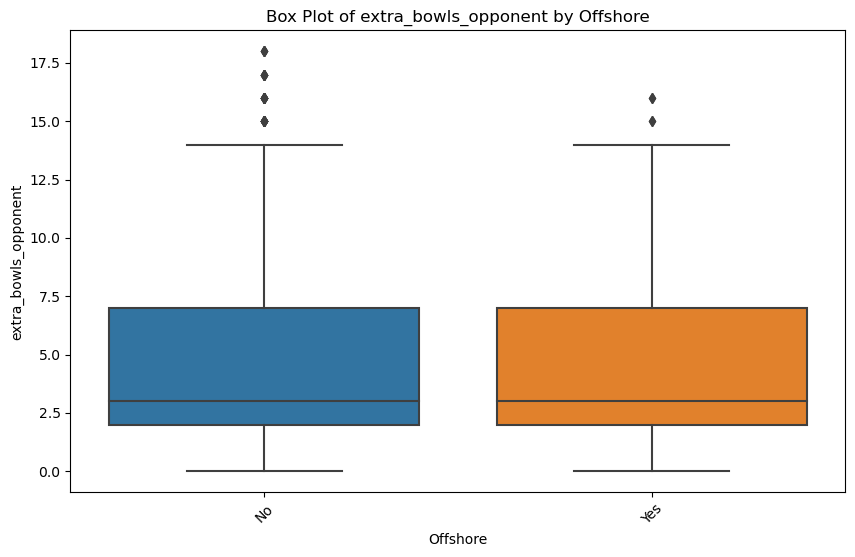

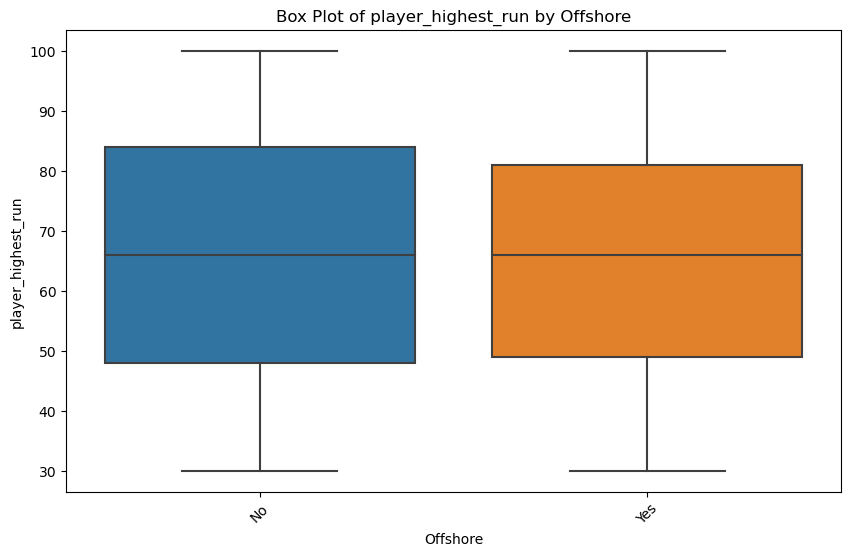

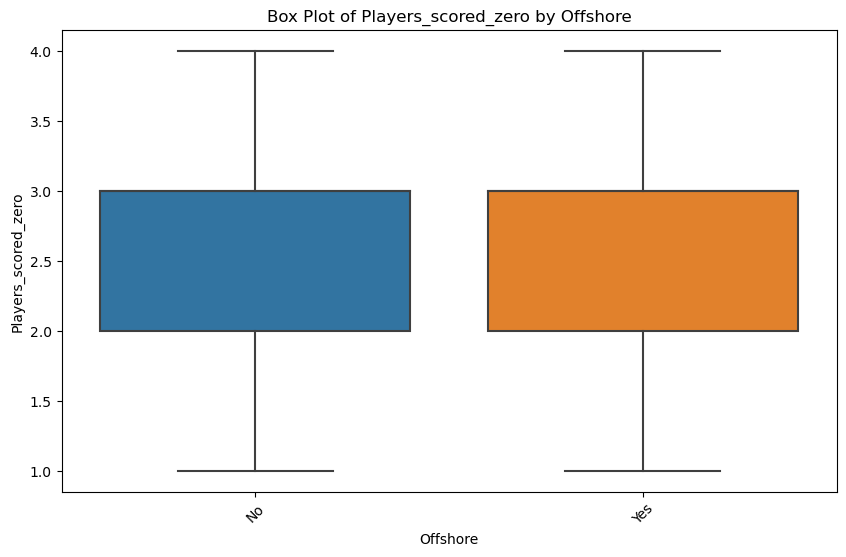

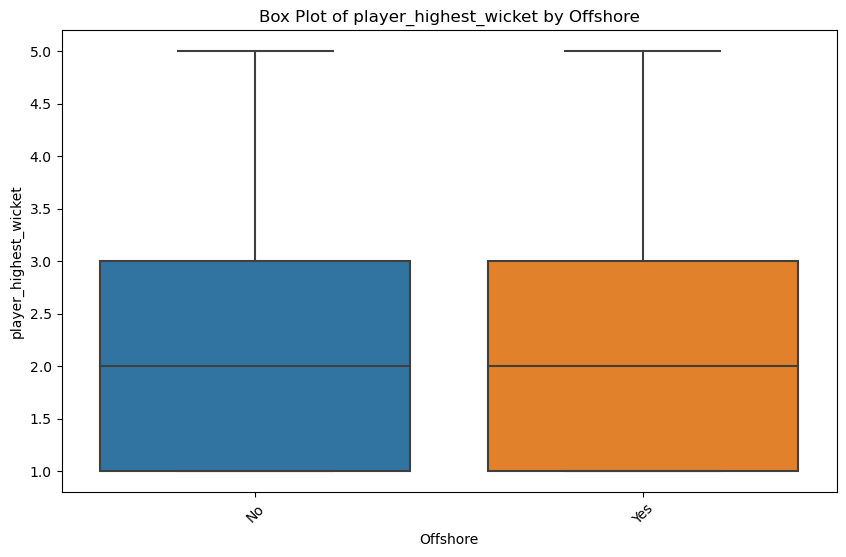

In [34]:
# Bivariate analysis for categorical and numerical features, excluding 'Game_number'
categorical_features = win_pred.select_dtypes(include='object').columns
categorical_features = categorical_features.drop('Game_number')

numerical_features = win_pred.select_dtypes(include=np.number).columns

for cat_col in categorical_features:
    for num_col in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=win_pred[cat_col], y=win_pred[num_col])
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
        plt.show()

In [35]:
for col in win_pred.select_dtypes(include='object'):
    print(f"Descriptive Analysis for '{col}':")
    print(f"Unique values: {win_pred[col].unique()}")
    print(f"Value counts:\n{win_pred[col].value_counts()}")
    value_counts1 = win_pred[col].value_counts(normalize=True) * 100  # Calculate percentages
    print(f"Value counts (%):\n{value_counts1}")
    print("-" * 20)

Descriptive Analysis for 'Game_number':
Unique values: ['Game_1' 'Game_2' 'Game_3' ... 'Game_2928' 'Game_2929' 'Game_2930']
Value counts:
Game_number
Game_1       1
Game_1964    1
Game_1956    1
Game_1957    1
Game_1958    1
            ..
Game_973     1
Game_974     1
Game_975     1
Game_977     1
Game_2930    1
Name: count, Length: 2793, dtype: int64
Value counts (%):
Game_number
Game_1       0.035804
Game_1964    0.035804
Game_1956    0.035804
Game_1957    0.035804
Game_1958    0.035804
               ...   
Game_973     0.035804
Game_974     0.035804
Game_975     0.035804
Game_977     0.035804
Game_2930    0.035804
Name: proportion, Length: 2793, dtype: float64
--------------------
Descriptive Analysis for 'Result':
Unique values: ['Loss' 'Win']
Value counts:
Result
Win     2340
Loss     453
Name: count, dtype: int64
Value counts (%):
Result
Win     83.780881
Loss    16.219119
Name: proportion, dtype: float64
--------------------
Descriptive Analysis for 'Match_light_type':
Unique 

In [36]:
for col in win_pred.select_dtypes(include=np.number):
    print(f"Descriptive Analysis for '{col}':")
    print(f"Mean: {win_pred[col].mean()}")
    print(f"Median: {win_pred[col].median()}")
    print(f"Standard Deviation: {win_pred[col].std()}")
    print(f"Minimum: {win_pred[col].min()}")
    print(f"Maximum: {win_pred[col].max()}")
    print(f"Quantiles (25%, 50%, 75%): {win_pred[col].quantile([0.25, 0.5, 0.75])}")
    print("-" * 20)

Descriptive Analysis for 'Avg_team_Age':
Mean: 29.182241317579663
Median: 30.0
Standard Deviation: 1.8107288470404086
Minimum: 12.0
Maximum: 30.0
Quantiles (25%, 50%, 75%): 0.25    30.0
0.50    30.0
0.75    30.0
Name: Avg_team_Age, dtype: float64
--------------------
Descriptive Analysis for 'Bowlers_in_team':
Mean: 2.903329752953813
Median: 3.0
Standard Deviation: 1.022648086756739
Minimum: 1
Maximum: 5
Quantiles (25%, 50%, 75%): 0.25    2.0
0.50    3.0
0.75    4.0
Name: Bowlers_in_team, dtype: float64
--------------------
Descriptive Analysis for 'Wicket_keeper_in_team':
Mean: 1.0
Median: 1.0
Standard Deviation: 0.0
Minimum: 1
Maximum: 1
Quantiles (25%, 50%, 75%): 0.25    1.0
0.50    1.0
0.75    1.0
Name: Wicket_keeper_in_team, dtype: float64
--------------------
Descriptive Analysis for 'All_rounder_in_team':
Mean: 2.7178660938059434
Median: 3.0
Standard Deviation: 1.0851429734803097
Minimum: 1
Maximum: 4
Quantiles (25%, 50%, 75%): 0.25    2.0
0.50    3.0
0.75    4.0
Name: All_round

In [37]:
win_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2793 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2793 non-null   object 
 1   Result                  2793 non-null   object 
 2   Avg_team_Age            2793 non-null   float64
 3   Match_light_type        2793 non-null   object 
 4   Match_format            2793 non-null   object 
 5   Bowlers_in_team         2793 non-null   int32  
 6   Wicket_keeper_in_team   2793 non-null   int32  
 7   All_rounder_in_team     2793 non-null   int32  
 8   First_selection         2793 non-null   object 
 9   Opponent                2793 non-null   object 
 10  Season                  2793 non-null   object 
 11  Audience_number         2793 non-null   float64
 12  Offshore                2793 non-null   object 
 13  Max_run_scored_1over    2793 non-null   int32  
 14  Max_wicket_taken_1over  2793 non-null   int32

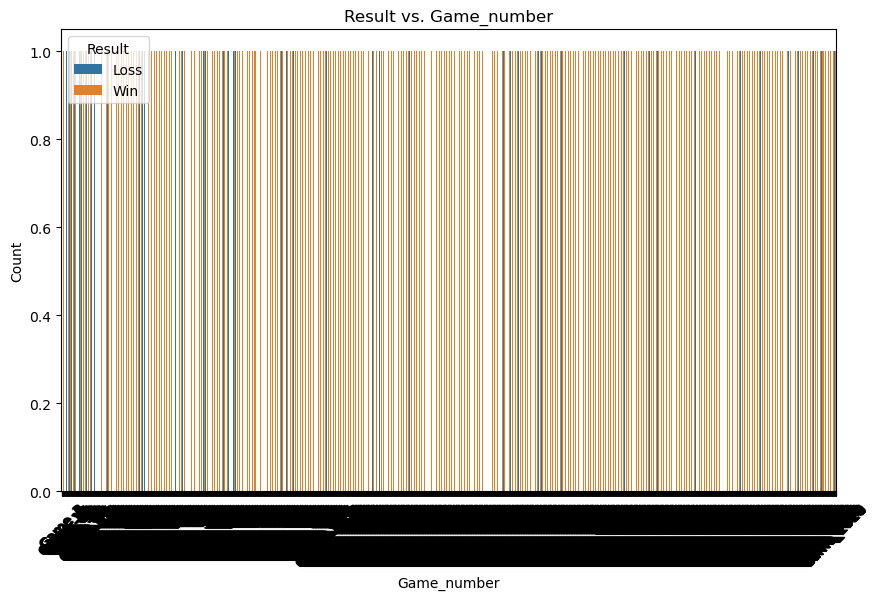

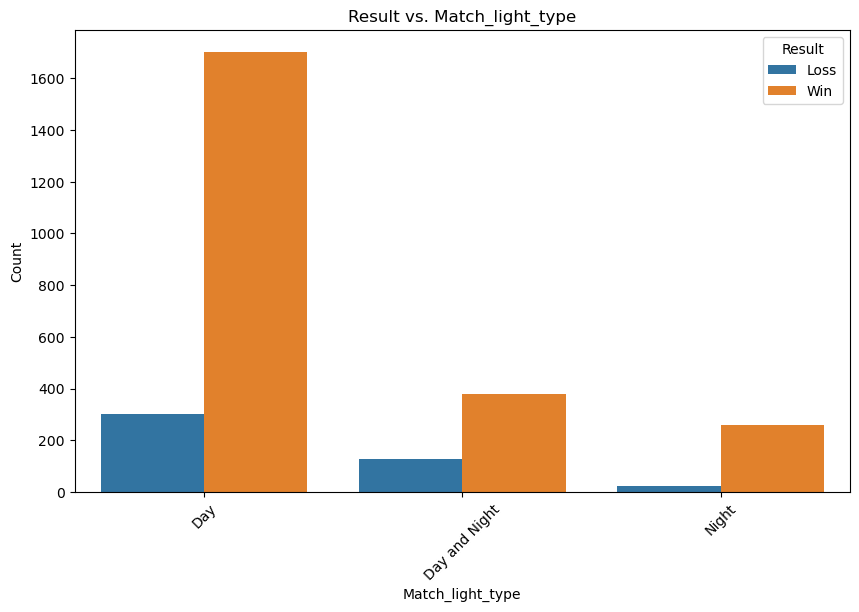

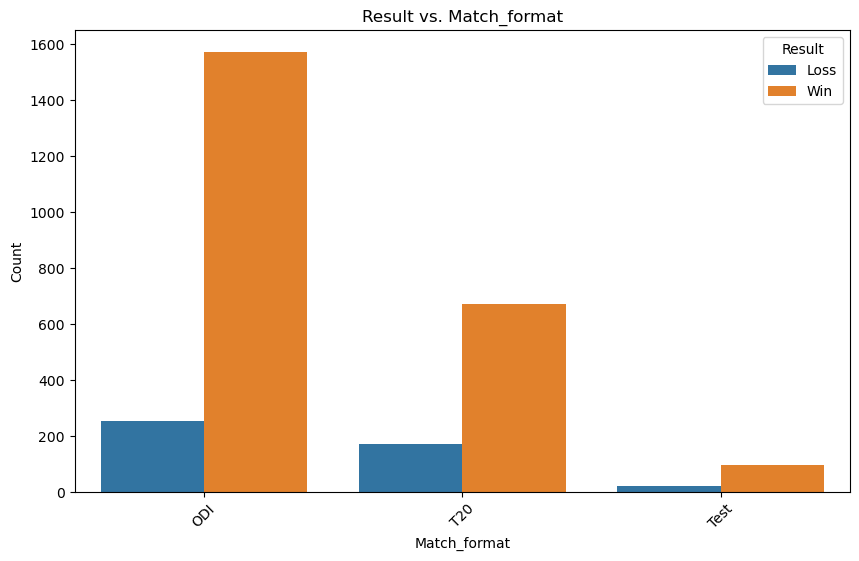

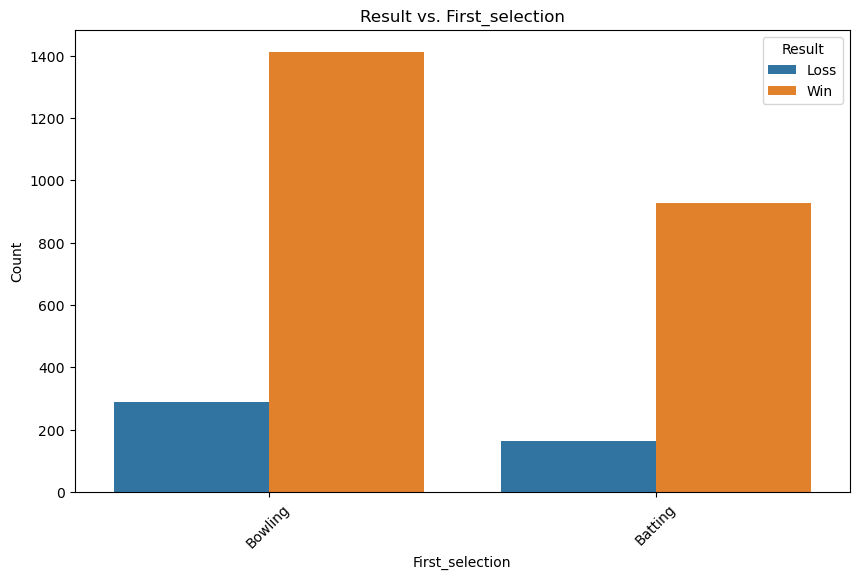

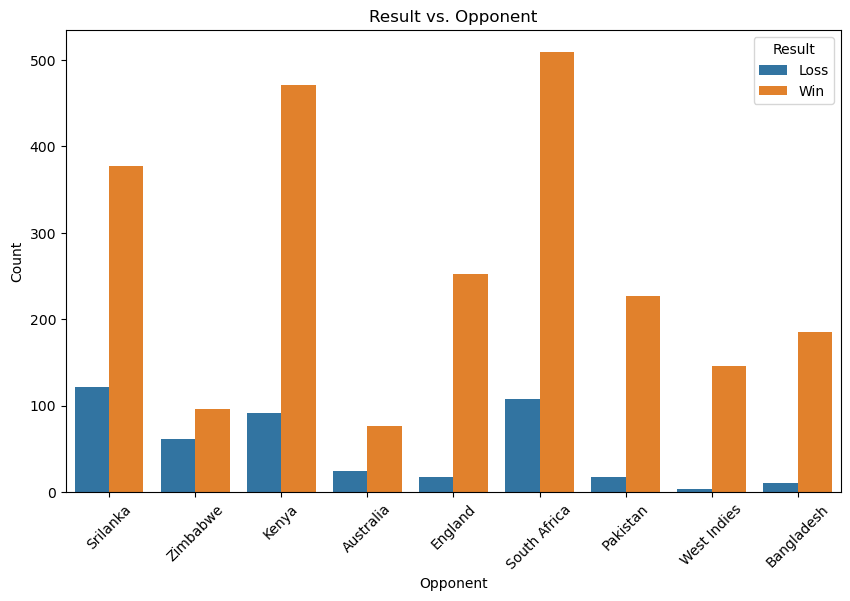

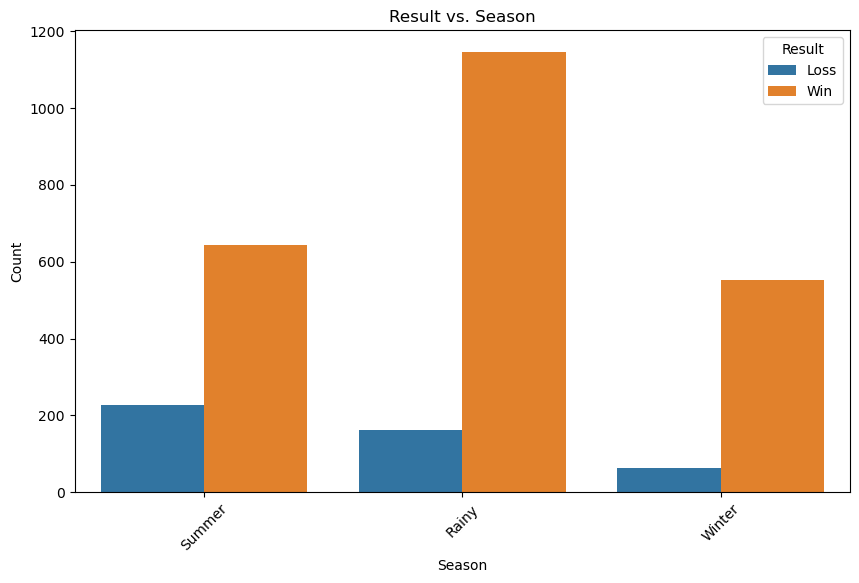

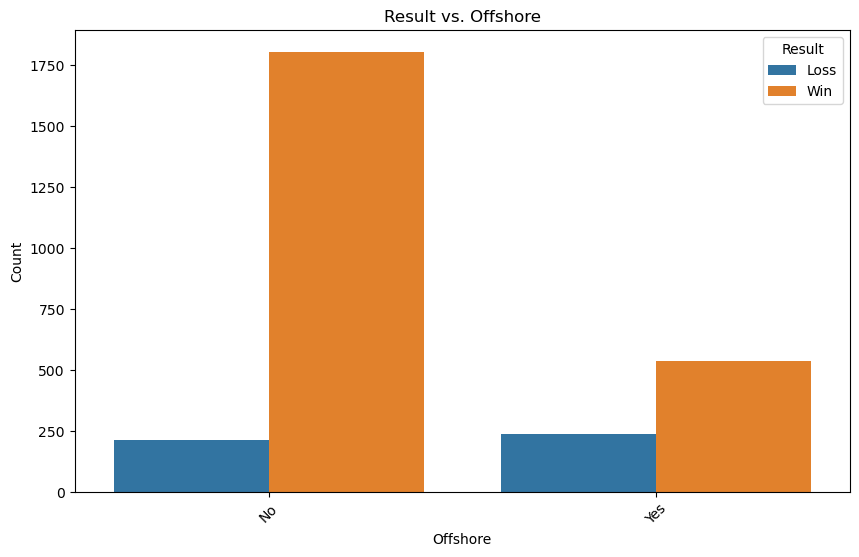

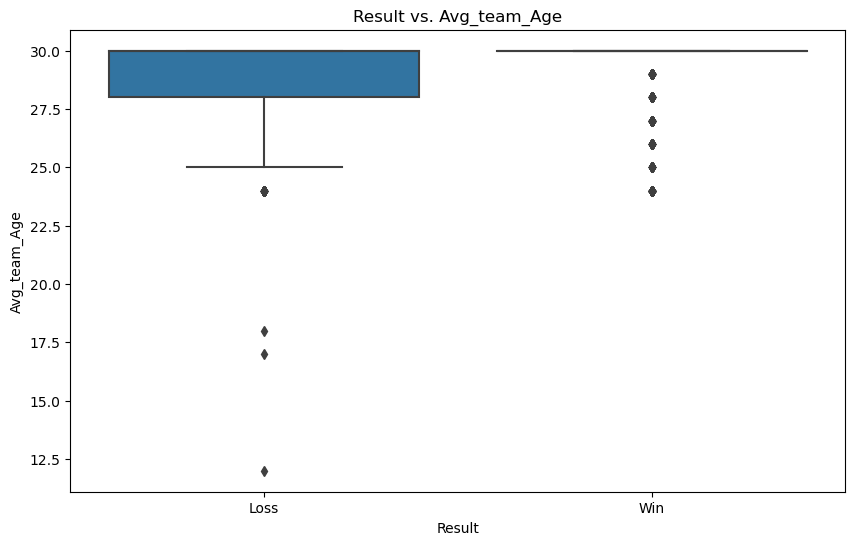

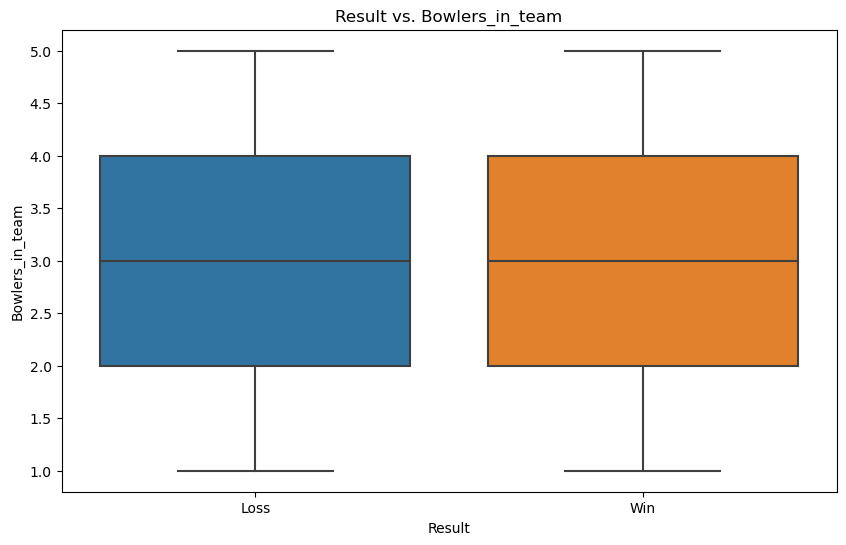

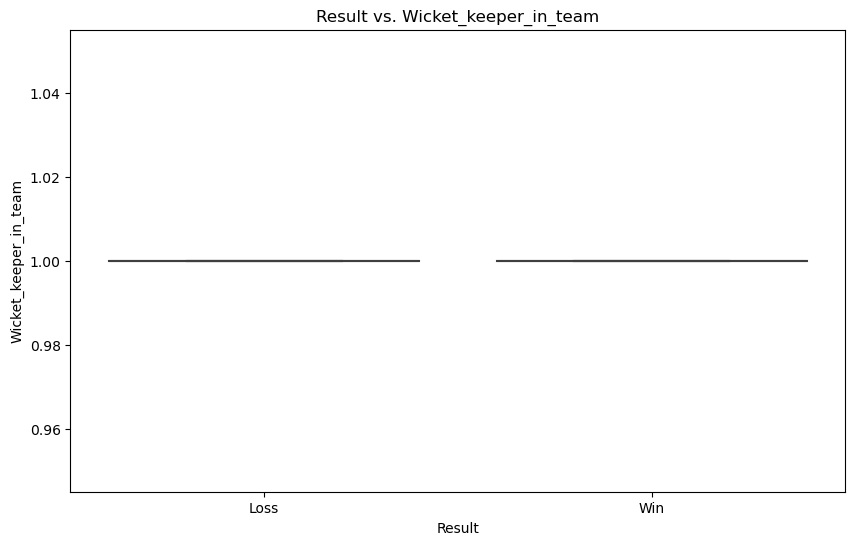

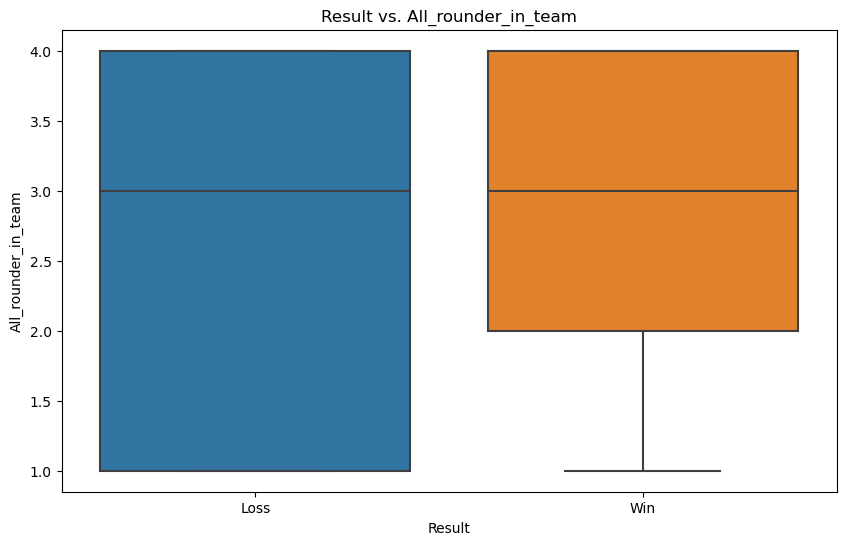

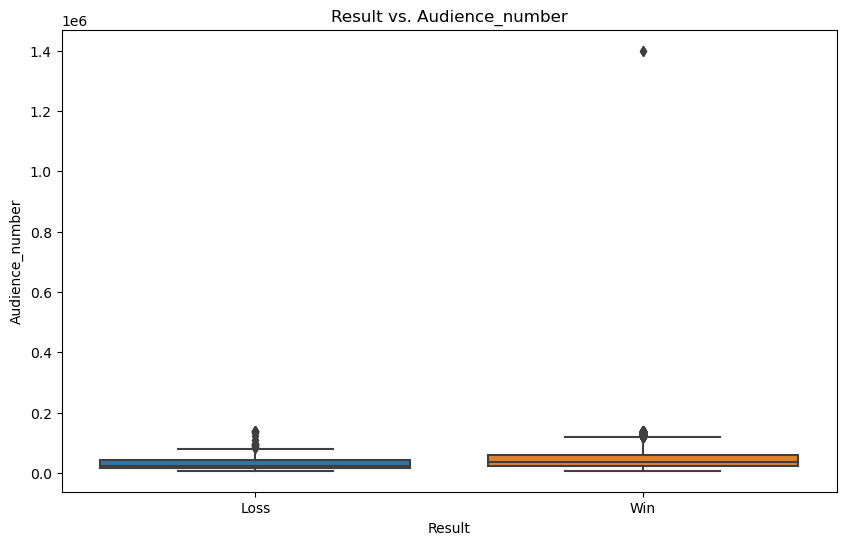

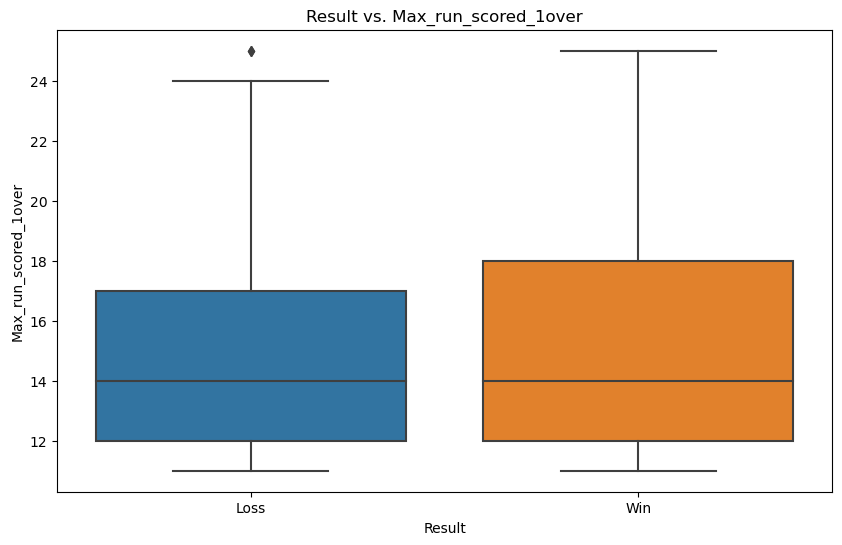

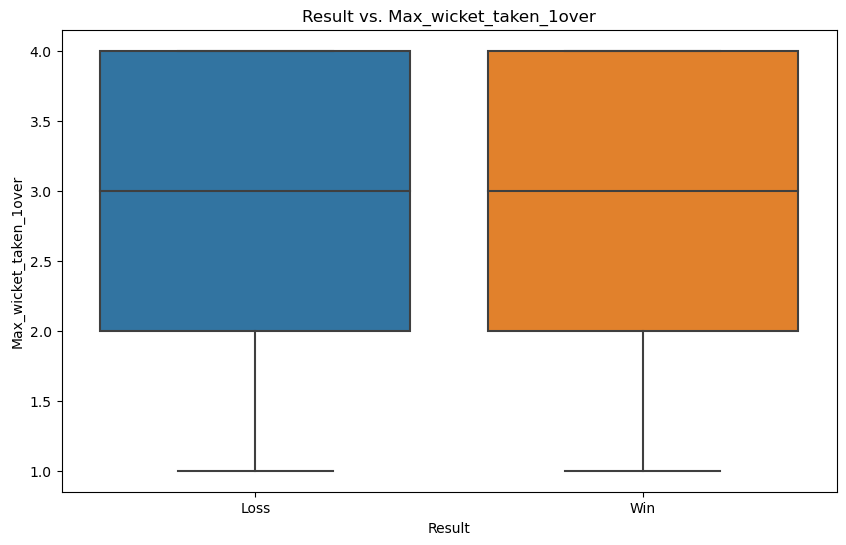

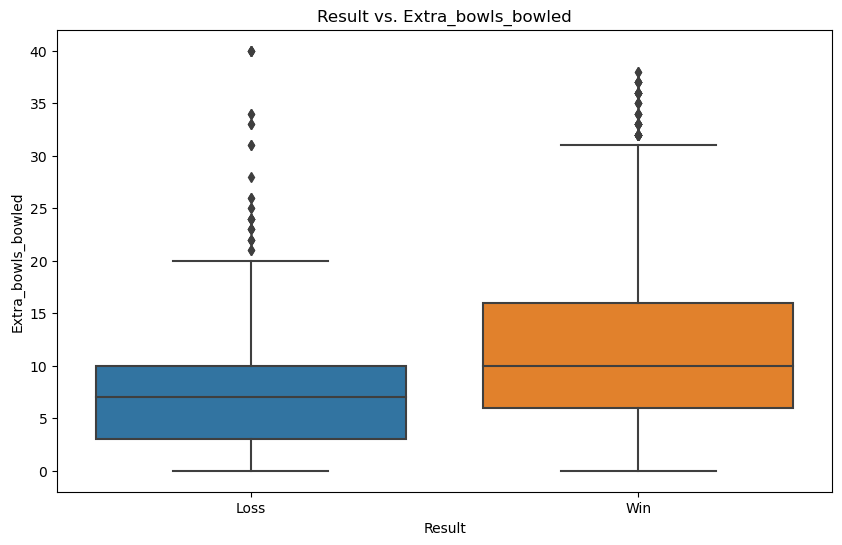

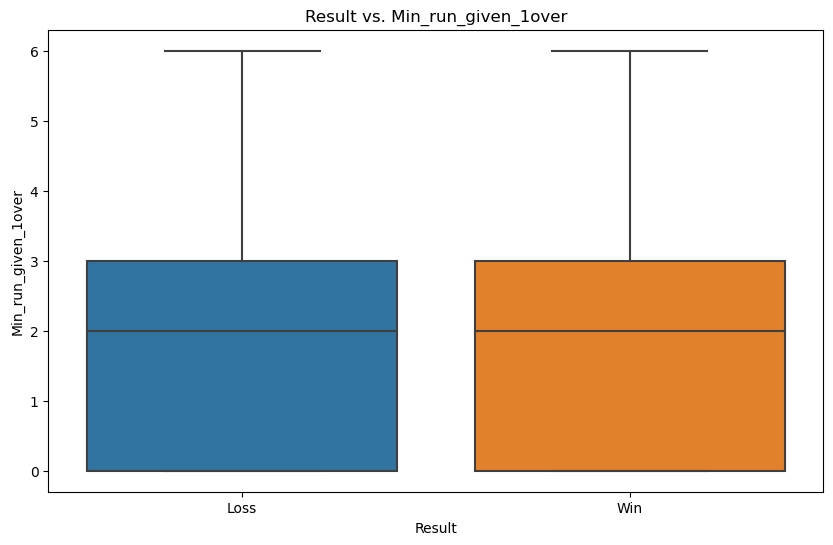

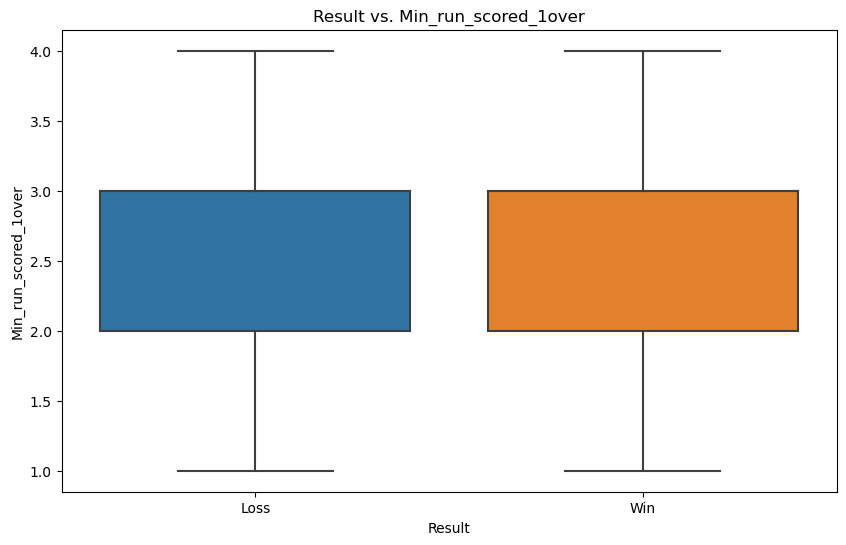

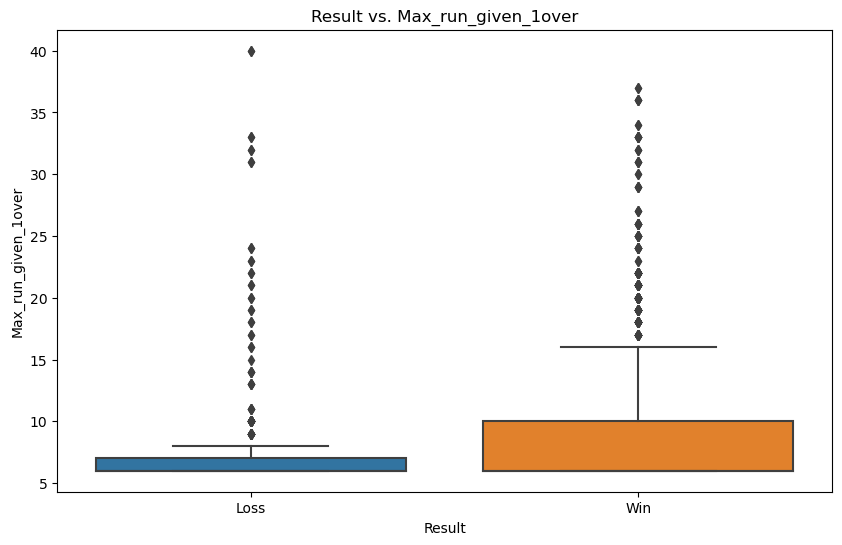

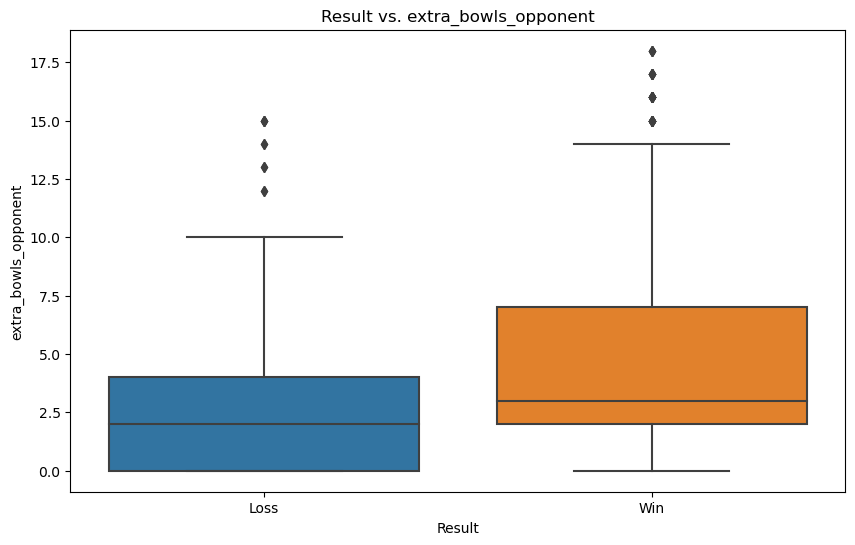

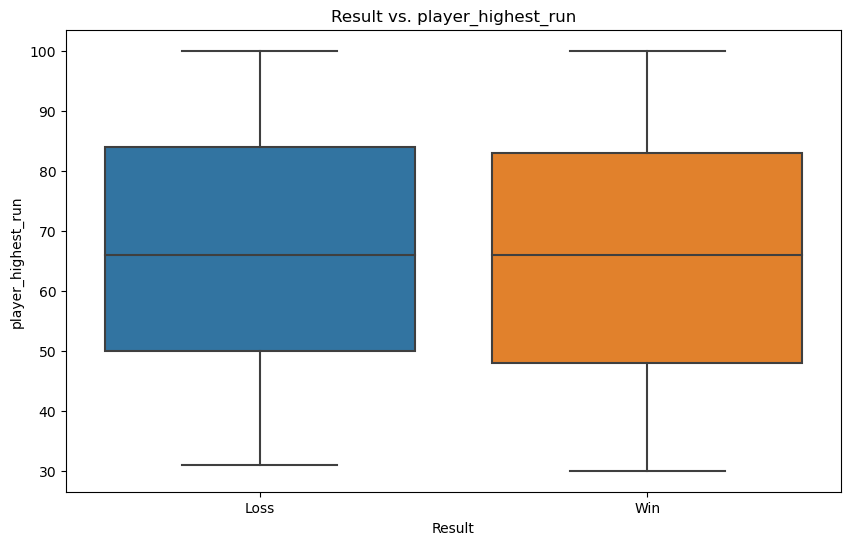

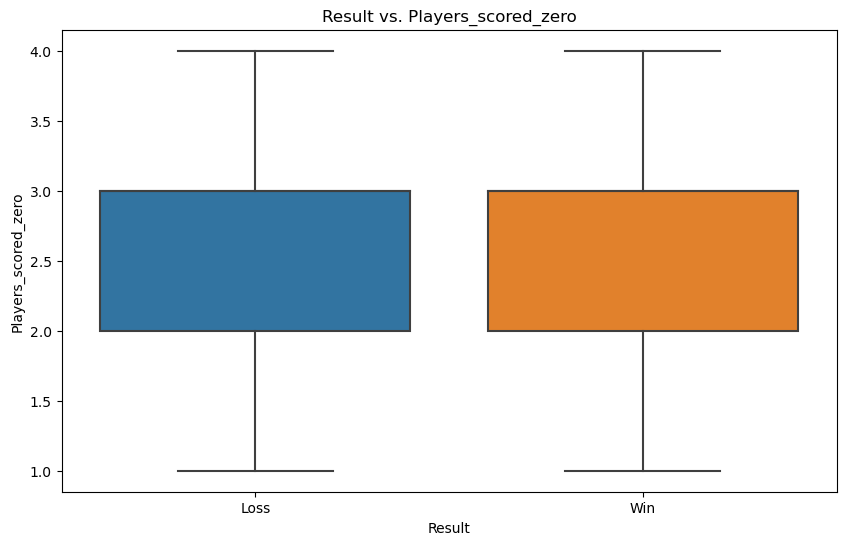

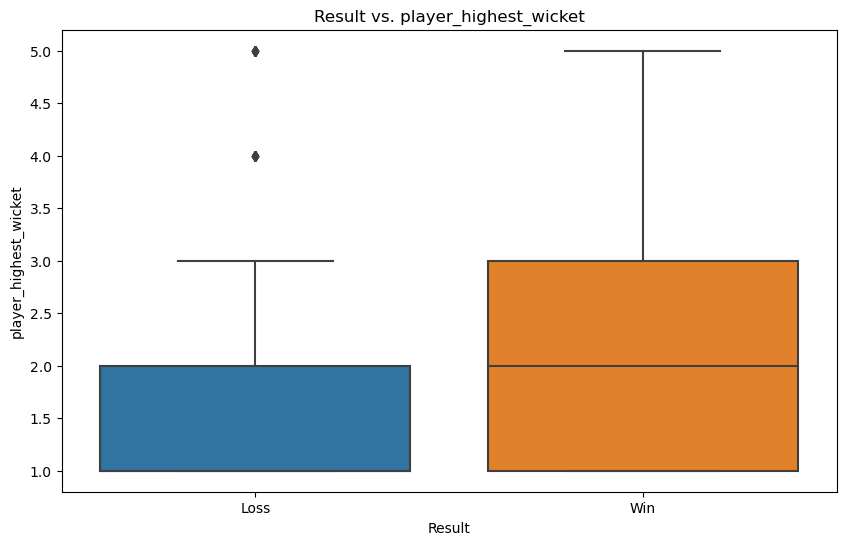

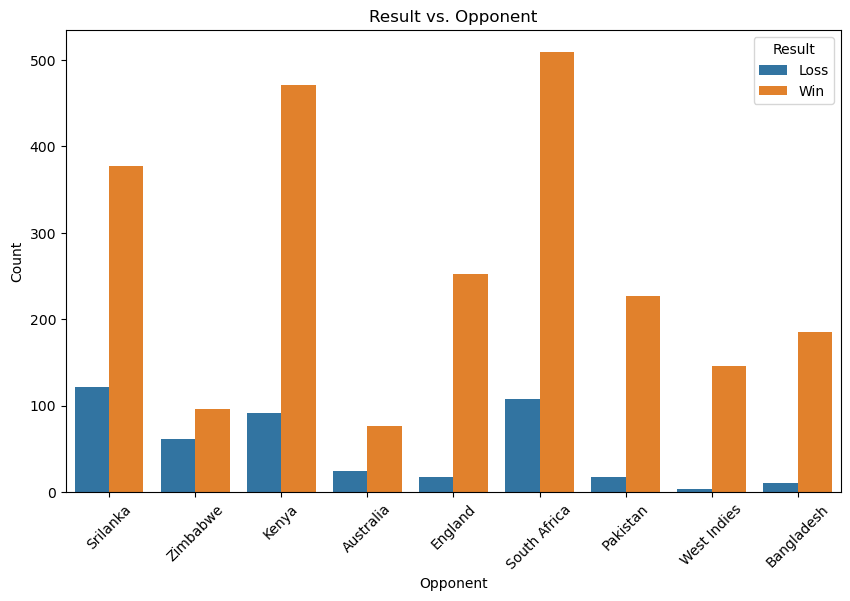

In [38]:
# Bivariate analysis with 'Result' as the target variable
categorical_features = win_pred.select_dtypes(include='object').columns
numerical_features = win_pred.select_dtypes(include=np.number).columns

for col in categorical_features:
    if col != 'Result':  # Exclude 'Result' itself
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='Result', data=win_pred)
        plt.title(f'Result vs. {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Result', y=col, data=win_pred)
    plt.title(f'Result vs. {col}')
    plt.xlabel('Result')
    plt.ylabel(col)
    plt.show()
    
#Specifically for Opponent
plt.figure(figsize=(10, 6))
sns.countplot(x='Opponent', hue='Result', data=win_pred)
plt.title(f'Result vs. Opponent')
plt.xlabel('Opponent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:

# Bivariate analysis with 'Result' as the target variable
categorical_features = win_pred.select_dtypes(include='object').columns
numerical_features = win_pred.select_dtypes(include=np.number).columns

for col in categorical_features:
    if col != 'Result':  # Exclude 'Result' itself
        print(f"Descriptive Statistics for Result vs. {col}:")
        print(pd.crosstab(win_pred[col], win_pred['Result'], normalize='index') * 100) # Normalized by each category in col
        print("-" * 20)

Descriptive Statistics for Result vs. Game_number:
Result        Loss    Win
Game_number              
Game_1       100.0    0.0
Game_10        0.0  100.0
Game_100       0.0  100.0
Game_1000    100.0    0.0
Game_1001    100.0    0.0
...            ...    ...
Game_995       0.0  100.0
Game_996     100.0    0.0
Game_997     100.0    0.0
Game_998       0.0  100.0
Game_999       0.0  100.0

[2793 rows x 2 columns]
--------------------
Descriptive Statistics for Result vs. Match_light_type:
Result                 Loss        Win
Match_light_type                      
Day               15.112219  84.887781
Day and Night     25.049310  74.950690
Night              8.185053  91.814947
--------------------
Descriptive Statistics for Result vs. Match_format:
Result             Loss        Win
Match_format                      
ODI           14.012042  85.987958
T20           20.497630  79.502370
Test          19.672131  80.327869
--------------------
Descriptive Statistics for Result vs. First_s

### Inferences from univariate Analsysis & Bivariate Analysis

The shape of the dataset has 2930 rows and 23 columns. There are 9 columns of float datatype, 4 columns of interger datatype and 10 columns of object datatype.

There are null values found in the columns of Avg_team_Age, Match_light_type, Match_format, Bowlers_in_team, All_rounder_in_team, First_selection, Opponent, Season, Audience_number, Offshore, Max_run_scored_1over, Extra_bowls_bowled, Min_run_scored_1over, Max_run_given_1over, player_highest_run.

I have Dropped rows where Avg_team_Age is greater than 50, the reason is the Indian players average team age greater than 50 seems unrelaistic and the players will not be fit at this age to play the match and the age is too old. Thus I have dropped the rows.

Imputed the null values of match format columns using KNN imputer and dropped the dataset with null values in the opponent column. Since we are not known about the opponent and treating null values will not yeild better results.

For treating match format column, I have used the randomforest classifier algorithm to impute null values in the dataset.
For categorical columns such as Offshore, Season, First_selection, Match_light_type imputed null values with mode.The mode value for each categorical columns are listed below,

Mode of Offshore: No
Mode of Season: Rainy
Mode of First_selection: Bowling
Mode of Match_light_type: Day

The columns such as Players_scored_zero, player_highest_wicket has object datatype due to string values present in it, has been replaced with the value and converted into integer datatype. The columns Match_format and First_selection had duplicate values and replaced with correct values. Converted columns into interger format such as All_rounder_in_team, Max_run_scored_1over, Extra_bowls_bowled, Min_run_scored_1over, Max_run_given_1over. 

The average team age found to be 30 years across all formats. The wicket keeper in the team is found to be 1.
The maximum number of bowlers found to be 3 acorss all formats. The maximum number of scored in 1 over is 25. The maximum wicket taken per over is 4. The minimum run given per over is 6 runs. Player highest run scores is 100 runs.
The mean total number of audience is 46204.

Most of the matches was conducted in Day format (71%) , followed by Day and night format (18%) and the least was night format (10%). Indian team has played ODI format (65%) the most followed by T20 (30%) and test formats(4%). Indian team has significantly more number of wins (84%) than lose (16%) in the matches and they have opted for first bowling (61%) has their choice when they won the toss than batting (39%).

Indian team has frequently faced with the South Africa (22%) as opponenet, followed by Kenya (20%), Srilanka (18%), England(10%), Pakistan (9%), Bangladesh(7%) , Zimbabwe (6%), West Indies(5%) and Australaia(4%). Most number of matches are played in rainy seasons (47%). Indian players played minimum matches in the off shore (28%). When the player highest wicket is high then the probablity of win in the match is also high.Player highest wicket is found to be high in Day format compared to Day & night and night format.

Player highest run mean value by match format is found to be 66 runs in ODI and T20 format, 60 runs in the test format. The mean value of highest run is high when the opt to choose for batting first.
The mean value of the maximum run given per over is close to 14 runs per over when the Indian team has played against the Bangladesh as opponent and 10 runs per over when they played against West Indies as opponent.
The maximum wicket taken per over is found to be least when the played against Srilanka as opponent.



In [40]:
win_pred1= win_pred.copy()

In [41]:
# Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder

categorical_cols = win_pred1.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    win_pred1[col] = label_encoder.fit_transform(win_pred1[col])

print(win_pred1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2793 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2793 non-null   int32  
 1   Result                  2793 non-null   int32  
 2   Avg_team_Age            2793 non-null   float64
 3   Match_light_type        2793 non-null   int32  
 4   Match_format            2793 non-null   int32  
 5   Bowlers_in_team         2793 non-null   int32  
 6   Wicket_keeper_in_team   2793 non-null   int32  
 7   All_rounder_in_team     2793 non-null   int32  
 8   First_selection         2793 non-null   int32  
 9   Opponent                2793 non-null   int32  
 10  Season                  2793 non-null   int32  
 11  Audience_number         2793 non-null   float64
 12  Offshore                2793 non-null   int32  
 13  Max_run_scored_1over    2793 non-null   int32  
 14  Max_wicket_taken_1over  2793 non-null   int32

In [42]:
# Drop the 'Game_Number' column
win_pred1 = win_pred1.drop('Game_number', axis=1)

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (y)
X = win_pred1.drop('Result', axis=1)  # Features
y = win_pred1['Result']  # Target variable

# Apply SelectKBest with ANOVA F-value for feature selection
selector = SelectKBest(score_func=f_classif, k='all') # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Create a DataFrame with feature names, scores, and p-values
feature_scores = pd.DataFrame({'Feature': selected_feature_names, 'Score': scores[selector.get_support()], 'P-value': p_values[selector.get_support()]})

# Sort the DataFrame by scores in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print or display the feature scores
feature_scores

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Feature       Score       P-value
10                Offshore  176.079056  5.157853e-39
0             Avg_team_Age   99.935111  3.839595e-23
13      Extra_bowls_bowled   88.962239  8.183609e-21
20   player_highest_wicket   82.418758  2.028842e-19
17    extra_bowls_opponent   73.853930  1.377311e-17
19     Players_scored_zero   58.339190  3.010627e-14
7                 Opponent   43.583898  4.843638e-11
9          Audience_number   36.467336  1.758309e-09
14     Min_run_given_1over   27.473737  1.711304e-07
5      All_rounder_in_team   24.496410  7.887364e-07
16     Max_run_given_1over   17.821340  2.503989e-05
2             Match_format   16.153839  5.994500e-05
15    Min_run_scored_1over   12.286666  4.633906e-04
12  Max_wicket_taken_1over    5.862136  1.553339e-02
3          Bowlers_in_team    3.305835  6.914142e-02
6          First_selection    1.856399  1.731509e-01
11    Max_run_scored_1over    0.983172  3.215030e-01
8                   Season    0.561880  4.535669e-01
18      player_highest_run    0.119778  7.293012e-01
1         Match_light_type    0.000880  9.763360e-01
4    Wicket_keeper_in_team         NaN           NaN

In [44]:
# Calculate the variance of each numerical feature
numerical_features = win_pred1.select_dtypes(include=np.number).columns
variances = win_pred1[numerical_features].var()

# Sort the variances in ascending order
sorted_variances = variances.sort_values()

# Print or display the sorted variances
sorted_variances

Wicket_keeper_in_team     0.000000e+00
Result                    1.359339e-01
Offshore                  2.005564e-01
First_selection           2.381211e-01
Match_format              3.252775e-01
Match_light_type          4.376247e-01
Min_run_scored_1over      4.945779e-01
Players_scored_zero       5.006543e-01
Season                    6.266318e-01
Bowlers_in_team           1.045809e+00
Max_wicket_taken_1over    1.170072e+00
All_rounder_in_team       1.177535e+00
player_highest_wicket     1.226977e+00
Min_run_given_1over       2.840688e+00
Avg_team_Age              3.278739e+00
Opponent                  4.065274e+00
extra_bowls_opponent      1.311546e+01
Max_run_scored_1over      1.337258e+01
Max_run_given_1over       2.478592e+01
Extra_bowls_bowled        6.046074e+01
player_highest_run        4.082346e+02
Audience_number           2.377921e+09
dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Use stratify for balanced split

# Now you have X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1955, 21) (838, 21) (1955,) (838,)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.8400954653937948
              precision    recall  f1-score   support

           0       0.54      0.10      0.17       136
           1       0.85      0.98      0.91       702

    accuracy                           0.84       838
   macro avg       0.69      0.54      0.54       838
weighted avg       0.80      0.84      0.79       838

Confusion Matrix:


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 14, 122],
       [ 12, 690]], dtype=int64)

In [47]:
# Drop the 'Audience_number' column
win_pred2 = win_pred1.drop('Audience_number', axis=1)

# Separate features (X) and target variable (y) after dropping 'Audience_number'
X = win_pred2.drop('Result', axis=1)  # Features
y = win_pred2['Result']  # Target variable

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Use stratify for balanced split

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test2)

# Evaluate the model
accuracy = accuracy_score(y_test2, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test2, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test2, y_pred)
print("Confusion Matrix:")
conf_matrix

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8544152744630071
              precision    recall  f1-score   support

           0       0.69      0.18      0.29       136
           1       0.86      0.98      0.92       702

    accuracy                           0.85       838
   macro avg       0.78      0.58      0.60       838
weighted avg       0.83      0.85      0.82       838

Confusion Matrix:


array([[ 25, 111],
       [ 11, 691]], dtype=int64)

Train AUC: 0.7954630367879579
Test AUC: 0.7885453326629797


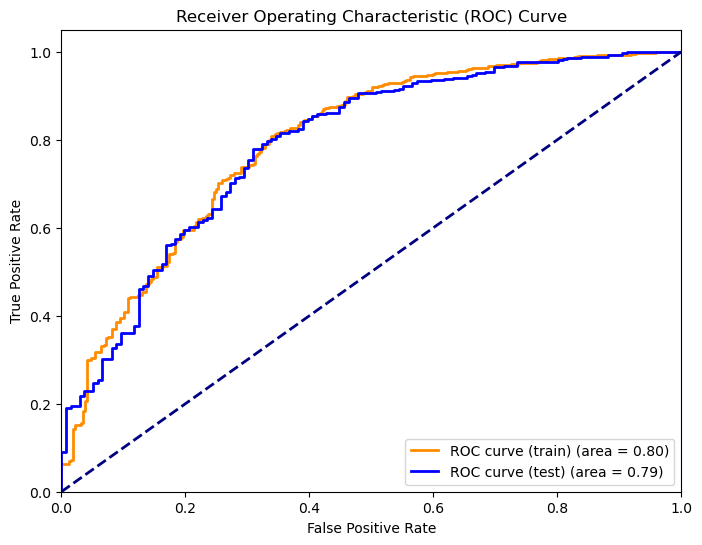

In [48]:
from sklearn.metrics import roc_curve, auc


# Predict probabilities for the positive class (Result = 1)
y_train_probs = logreg_model.predict_proba(X_train2)[:, 1]
y_test_probs = logreg_model.predict_proba(X_test2)[:, 1]

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train2, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)
print(f"Train AUC: {roc_auc_train}")
# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test2, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)
print(f"Test AUC: {roc_auc_test}")
# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (train) (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Drop the 'player_highest_wicket' column
win_pred3 = win_pred1.drop('player_highest_wicket', axis=1)

# Separate features (X) and target variable (y) after dropping 'player_highest_wicket'
X = win_pred3.drop('Result', axis=1)  # Features
y = win_pred3['Result']  # Target variable

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Use stratify for balanced split

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test3)

# Evaluate the model
accuracy = accuracy_score(y_test3, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test3, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test3, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.8400954653937948
              precision    recall  f1-score   support

           0       0.54      0.10      0.17       136
           1       0.85      0.98      0.91       702

    accuracy                           0.84       838
   macro avg       0.69      0.54      0.54       838
weighted avg       0.80      0.84      0.79       838

Confusion Matrix:


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 14, 122],
       [ 12, 690]], dtype=int64)

Train AUC: 0.7365930599369085
Test AUC: 0.6879399195575666


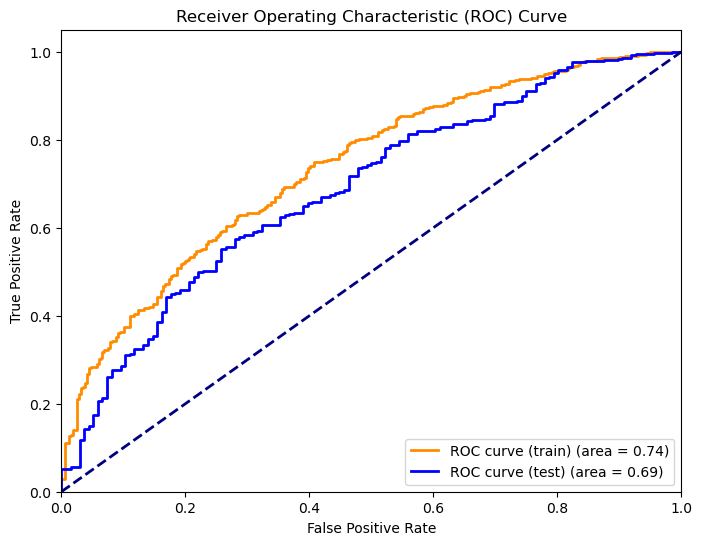

In [50]:
# Predict probabilities for the positive class (Result = 1)
y_train_probs = logreg_model.predict_proba(X_train3)[:, 1]
y_test_probs = logreg_model.predict_proba(X_test3)[:, 1]

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train3, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)
print(f"Train AUC: {roc_auc_train}")
# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test3, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)
print(f"Test AUC: {roc_auc_test}")
# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (train) (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
# Drop the 'Wicket_keeper_in_team' column
win_pred1 = win_pred2.drop('Wicket_keeper_in_team', axis=1)

# Separate features (X) and target variable (y) after dropping 'Wicket_keeper_in_team'
X = win_pred2.drop('Result', axis=1)  # Features
y = win_pred2['Result']  # Target variable

# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Use stratify for balanced split

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.8544152744630071
              precision    recall  f1-score   support

           0       0.69      0.18      0.29       136
           1       0.86      0.98      0.92       702

    accuracy                           0.85       838
   macro avg       0.78      0.58      0.60       838
weighted avg       0.83      0.85      0.82       838

Confusion Matrix:


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 25, 111],
       [ 11, 691]], dtype=int64)

Train AUC: 0.7954630367879579
Test AUC: 0.7885453326629797


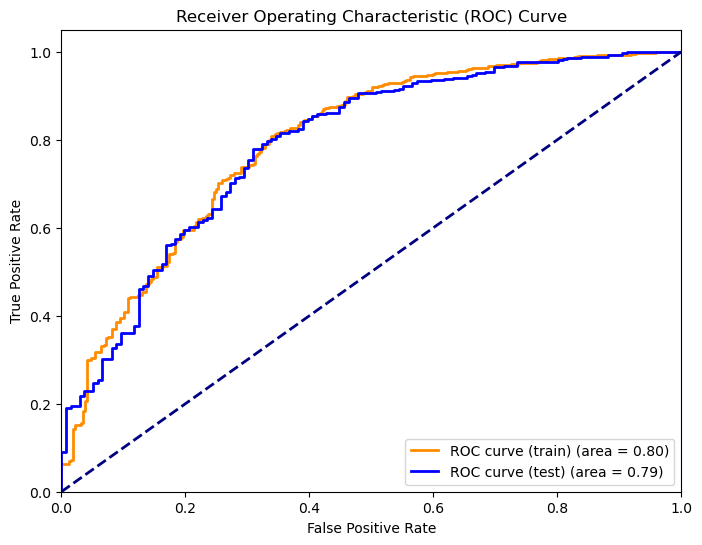

In [52]:
# Predict probabilities for the positive class (Result = 1)
y_train_probs = logreg_model.predict_proba(X_train4)[:, 1]
y_test_probs = logreg_model.predict_proba(X_test4)[:, 1]

# Calculate ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train4, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)
print(f"Train AUC: {roc_auc_train}")

# Calculate ROC curve and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test4, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)
print(f"Test AUC: {roc_auc_test}")

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (train) (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve (test) (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga']  # Solver algorithm
}

# Create a LogisticRegression model
logreg_model = LogisticRegression(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy') # Use 5-fold cross validation

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train4, y_train4)

# Get the best parameters and the best score
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test4)
accuracy = accuracy_score(y_test4, y_pred)

print(f"Test accuracy of the best model: {accuracy}")

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8526854219948848
Test accuracy of the best model: 0.8520286396181385


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train4, X_test4, y_train4, y_test4 are defined from previous code

# Initialize and train the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = lda_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.850835322195704
              precision    recall  f1-score   support

           0       0.60      0.24      0.34       136
           1       0.87      0.97      0.92       702

    accuracy                           0.85       838
   macro avg       0.74      0.60      0.63       838
weighted avg       0.82      0.85      0.82       838

Confusion Matrix:


array([[ 32, 104],
       [ 21, 681]], dtype=int64)

Test AUC: 0.788367269984917


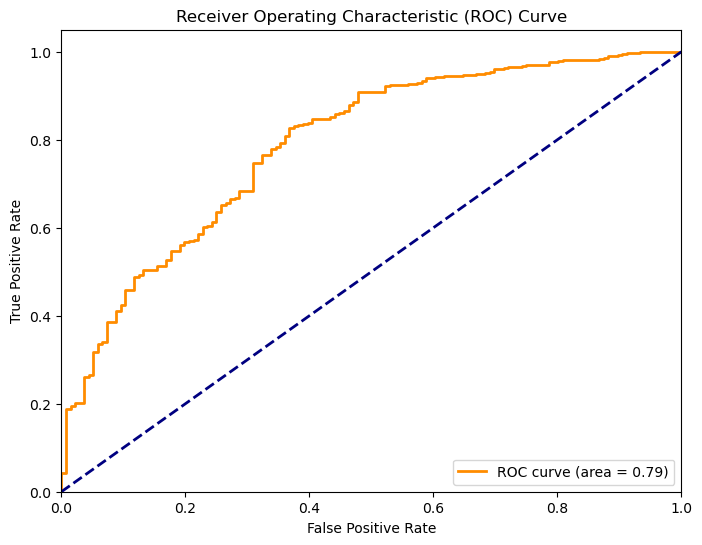

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (Result = 1)
y_probs = lda_model.predict_proba(X_test4)[:, 1]

# Calculate ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test4, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Test AUC: {roc_auc}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [56]:
# !pip install --upgrade scikit-learn==1.6.0

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train4, X_test4, y_train4, y_test4 are defined from previous code

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors
knn_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = knn_model.predict(X_test4.values)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
conf_matrix

C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.847255369928401
              precision    recall  f1-score   support

           0       0.56      0.29      0.38       136
           1       0.87      0.96      0.91       702

    accuracy                           0.85       838
   macro avg       0.72      0.62      0.65       838
weighted avg       0.82      0.85      0.83       838

Confusion Matrix:


array([[ 39,  97],
       [ 31, 671]], dtype=int64)

Test AUC: 0.7204730182671358


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


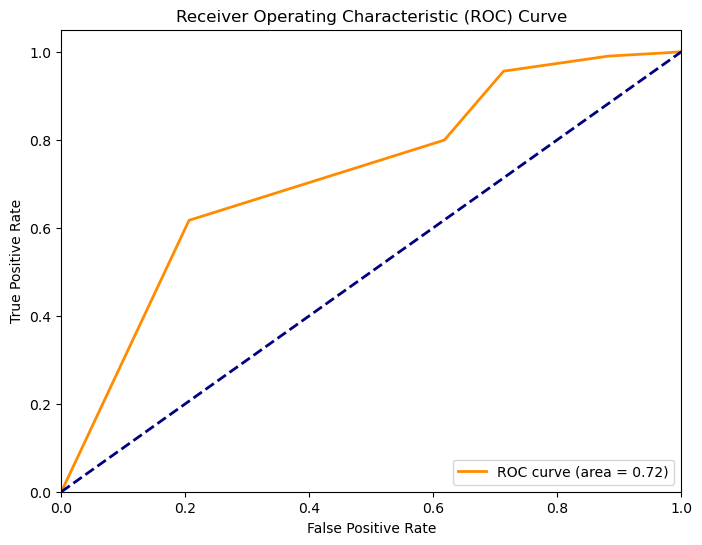

In [58]:
y_probs = knn_model.predict_proba(X_test4.values)[:, 1]

# Calculate ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test4, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Test AUC: {roc_auc}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9212410501193318
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       136
           1       0.96      0.95      0.95       702

    accuracy                           0.92       838
   macro avg       0.85      0.86      0.86       838
weighted avg       0.92      0.92      0.92       838

Confusion Matrix:
[[105  31]
 [ 35 667]]
Test AUC: 0.861100636835931


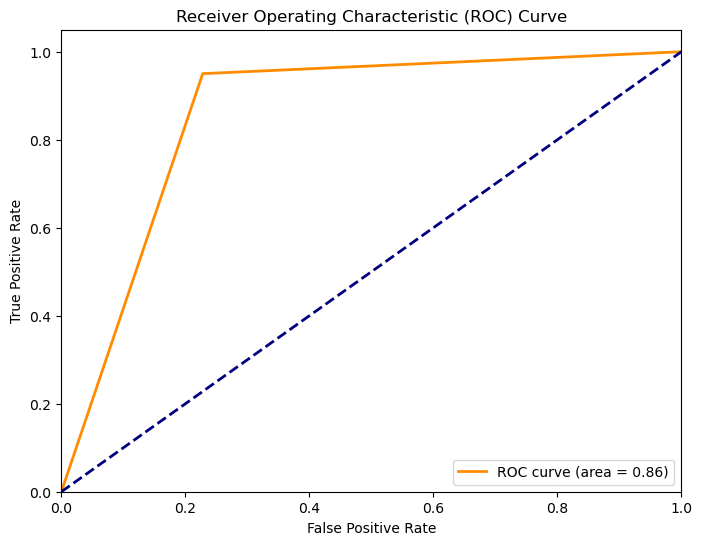

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42) # You can add hyperparameters here
dt_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = dt_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predict probabilities for the positive class
y_probs = dt_model.predict_proba(X_test4)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test4, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Test AUC: {roc_auc}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00      1638

    accuracy                           1.00      1955
   macro avg       1.00      1.00      1.00      1955
weighted avg       1.00      1.00      1.00      1955

Training Confusion Matrix:
[[ 317    0]
 [   0 1638]]
Test Accuracy: 0.9212410501193318
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       136
           1       0.96      0.95      0.95       702

    accuracy                           0.92       838
   macro avg       0.85      0.86      0.86       838
weighted avg       0.92      0.92      0.92       838

Test Confusion Matrix:
[[105  31]
 [ 35 667]]


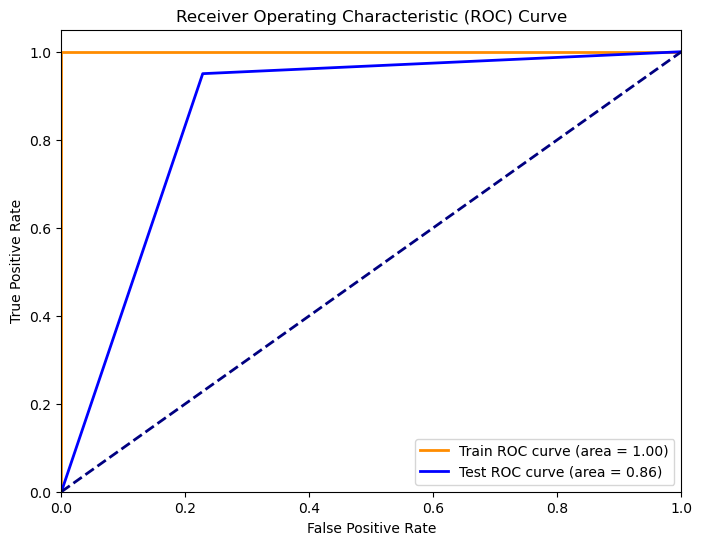

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Classifier model with Gini criterion
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)  # Explicitly set criterion to 'gini'
dt_model.fit(X_train4, y_train4)

# Make predictions on the training and test sets
y_train_pred = dt_model.predict(X_train4)
y_test_pred = dt_model.predict(X_test4)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train4, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Classification Report:\n{classification_report(y_train4, y_train_pred)}")
train_conf_matrix = confusion_matrix(y_train4, y_train_pred)
print(f"Training Confusion Matrix:\n{train_conf_matrix}")

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test4, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Classification Report:\n{classification_report(y_test4, y_test_pred)}")
test_conf_matrix = confusion_matrix(y_test4, y_test_pred)
print(f"Test Confusion Matrix:\n{test_conf_matrix}")


# Predict probabilities for the positive class
y_train_probs = dt_model.predict_proba(X_train4)[:, 1]
y_test_probs = dt_model.predict_proba(X_test4)[:, 1]

# ROC Curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train4, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC Curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test4, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Bagging Model Accuracy: 0.9463007159904535
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       136
           1       0.95      0.98      0.97       702

    accuracy                           0.95       838
   macro avg       0.93      0.87      0.89       838
weighted avg       0.94      0.95      0.94       838

Confusion Matrix:
[[102  34]
 [ 11 691]]
Test AUC: 0.9287173202614378


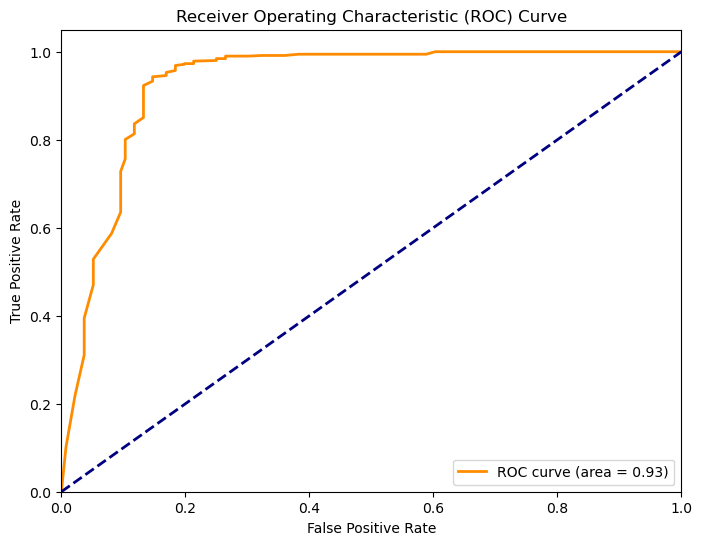

In [61]:
from sklearn.ensemble import BaggingClassifier


base_estimator = DecisionTreeClassifier(random_state=42)

# Create the Bagging Classifier
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42) # Adjust n_estimators

# Train the Bagging model
bagging_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Bagging Model Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predict probabilities for the positive class
y_probs = bagging_model.predict_proba(X_test4)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test4, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Test AUC: {roc_auc}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9474940334128878
              precision    recall  f1-score   support

           0       0.96      0.71      0.81       136
           1       0.95      0.99      0.97       702

    accuracy                           0.95       838
   macro avg       0.95      0.85      0.89       838
weighted avg       0.95      0.95      0.94       838

Confusion Matrix:
[[ 96  40]
 [  4 698]]
Test AUC: 0.9361278699513993


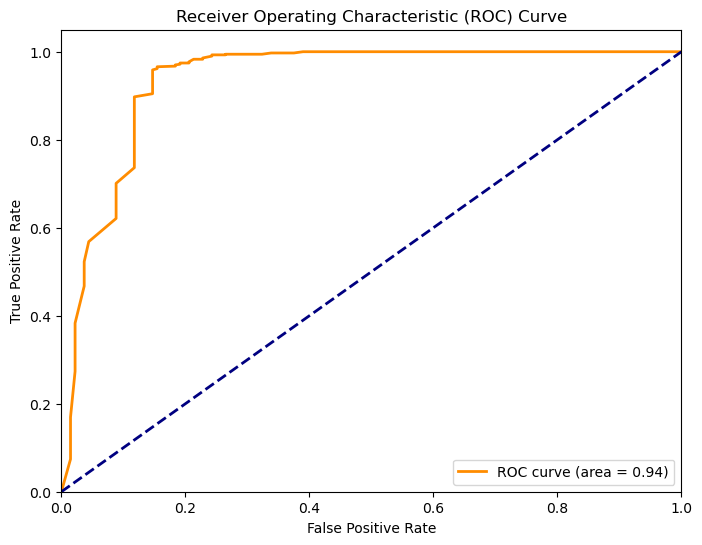

In [62]:
# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42) # You can add hyperparameters here
rf_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = rf_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predict probabilities for the positive class
y_probs = rf_model.predict_proba(X_test4)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test4, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Test AUC: {roc_auc}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train4, X_test4, y_train4, y_test4 are defined from previous code

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = nb_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.8233890214797136
              precision    recall  f1-score   support

           0       0.46      0.49      0.47       136
           1       0.90      0.89      0.89       702

    accuracy                           0.82       838
   macro avg       0.68      0.69      0.68       838
weighted avg       0.83      0.82      0.83       838

Confusion Matrix:


array([[ 66,  70],
       [ 78, 624]], dtype=int64)

Accuracy: 0.837708830548926
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.84      1.00      0.91       702

    accuracy                           0.84       838
   macro avg       0.42      0.50      0.46       838
weighted avg       0.70      0.84      0.76       838

Confusion Matrix:
[[  0 136]
 [  0 702]]


C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\u411715\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Test AUC: 0.7876759678230266


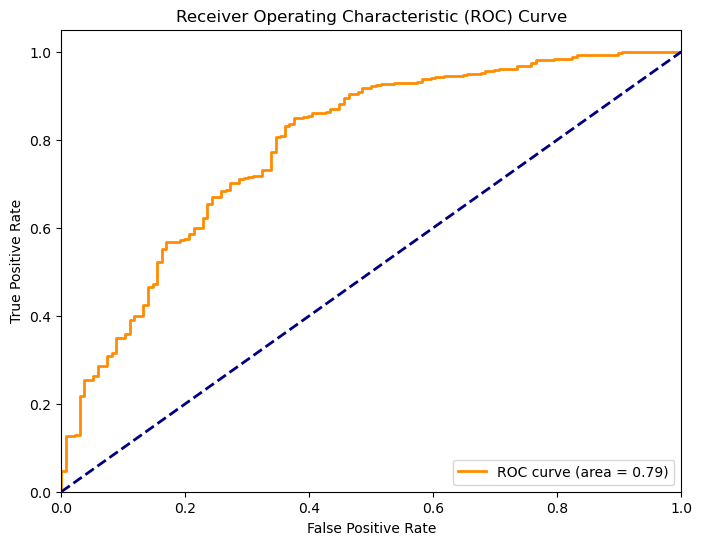

In [64]:

from sklearn.svm import SVC

# Assuming X_train4, X_test4, y_train4, y_test4 are defined from previous code

# Initialize and train the Support Vector Classifier model
svm_model = SVC(probability=True) # probability=True is needed for ROC curve
svm_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = svm_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predict probabilities for the positive class
y_probs = svm_model.predict_proba(X_test4)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test4, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Test AUC: {roc_auc}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.8615751789976134
              precision    recall  f1-score   support

           0       0.66      0.31      0.42       136
           1       0.88      0.97      0.92       702

    accuracy                           0.86       838
   macro avg       0.77      0.64      0.67       838
weighted avg       0.84      0.86      0.84       838

Confusion Matrix:
[[ 42  94]
 [ 22 680]]
Test AUC: 0.8136521702698174


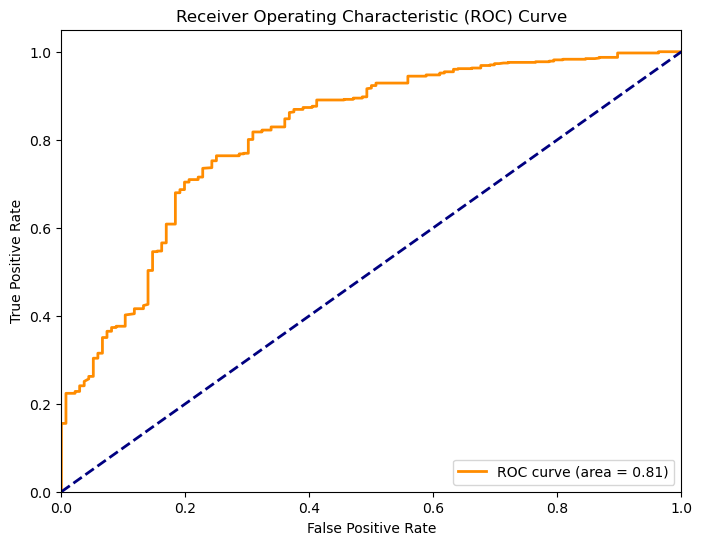

In [65]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming X_train4, X_test4, y_train4, y_test4 are defined from previous code

# Initialize and train the AdaBoost Classifier model
ada_model = AdaBoostClassifier(random_state=42) # You can add hyperparameters here
ada_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = ada_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predict probabilities for the positive class
y_probs = ada_model.predict_proba(X_test4)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test4, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Test AUC: {roc_auc}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.8878281622911695
              precision    recall  f1-score   support

           0       0.81      0.40      0.54       136
           1       0.89      0.98      0.94       702

    accuracy                           0.89       838
   macro avg       0.85      0.69      0.74       838
weighted avg       0.88      0.89      0.87       838

Confusion Matrix:
[[ 55  81]
 [ 13 689]]
Test AUC: 0.8561986760516171


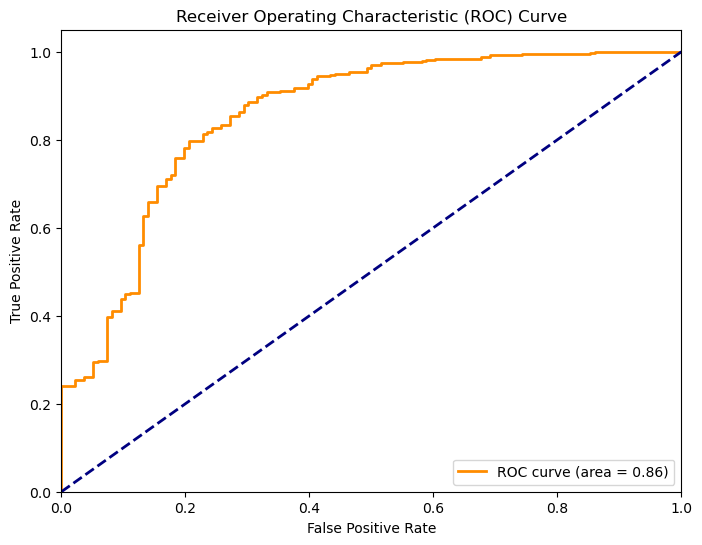

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train4, X_test4, y_train4, y_test4 are defined from previous code

# Initialize and train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42) # You can add hyperparameters here
gb_model.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred = gb_model.predict(X_test4)

# Evaluate the model
accuracy = accuracy_score(y_test4, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test4, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test4, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Predict probabilities for the positive class
y_probs = gb_model.predict_proba(X_test4)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test4, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Test AUC: {roc_auc}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [67]:

from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    recall = recall_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print("---"*10)

# Assuming X_train4 and y_train4 are your training data
evaluate_model(best_model, X_train4, y_train4, "Logistic Regression") # best_model is from your logistic regression
evaluate_model(lda_model, X_train4, y_train4, "LDA")
evaluate_model(knn_model, X_train4, y_train4, "KNN")
evaluate_model(dt_model, X_train4, y_train4, "Decision Tree")
evaluate_model(bagging_model, X_train4, y_train4, "Bagging")
evaluate_model(rf_model, X_train4, y_train4, "Random Forest")
evaluate_model(svm_model, X_train4, y_train4, "SVM")
evaluate_model(ada_model, X_train4, y_train4, "AdaBoost")
evaluate_model(gb_model, X_train4, y_train4, "Gradient Boost")

--- Logistic Regression ---
Confusion Matrix:
[[  58  259]
 [  22 1616]]
Precision: 0.8618666666666667
F1 Score: 0.9200113862795332
Recall: 0.9865689865689866
Accuracy: 0.8562659846547315
------------------------------
--- LDA ---
Confusion Matrix:
[[  81  236]
 [  45 1593]]
Precision: 0.8709677419354839
F1 Score: 0.9189501009518316
Recall: 0.9725274725274725
Accuracy: 0.8562659846547315
------------------------------
--- KNN ---
Confusion Matrix:
[[ 113  204]
 [  37 1601]]
Precision: 0.8869806094182825
F1 Score: 0.930002904443799
Recall: 0.9774114774114774
Accuracy: 0.8767263427109975
------------------------------
--- Decision Tree ---
Confusion Matrix:
[[ 317    0]
 [   0 1638]]
Precision: 1.0
F1 Score: 1.0
Recall: 1.0
Accuracy: 1.0
------------------------------
--- Bagging ---
Confusion Matrix:
[[ 317    0]
 [   0 1638]]
Precision: 1.0
F1 Score: 1.0
Recall: 1.0
Accuracy: 1.0
------------------------------
--- Random Forest ---
Confusion Matrix:
[[ 317    0]
 [   0 1638]]
Precision

In [68]:

from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

def evaluate_model(model, X_test, y_test, model_name):
  y_pred = model.predict(X_test)
  
  print(f"Evaluation for {model_name}:")
  
  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:\n", conf_matrix)

  precision = precision_score(y_test, y_pred)
  print(f"Precision: {precision}")

  f1 = f1_score(y_test, y_pred)
  print(f"F1 Score: {f1}")

  recall = recall_score(y_test, y_pred)
  print(f"Recall: {recall}")

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy}")
  print("-"*30)


# Assuming X_test4, y_test4, and all trained models exist from the previous code

evaluate_model(best_model, X_test4, y_test4, "Logistic Regression") # Assuming X_test2 and y_test2 are available.
evaluate_model(lda_model, X_test4, y_test4, "LDA")
evaluate_model(knn_model, X_test4, y_test4, "KNN")
evaluate_model(dt_model, X_test4, y_test4, "Decision Tree")
evaluate_model(bagging_model, X_test4, y_test4, "Bagging")
evaluate_model(rf_model, X_test4, y_test4, "Random Forest")
evaluate_model(svm_model, X_test4, y_test4, "SVM")
evaluate_model(ada_model, X_test4, y_test4, "AdaBoost")
evaluate_model(gb_model, X_test4, y_test4, "Gradient Boost")

Evaluation for Logistic Regression:
Confusion Matrix:
 [[ 19 117]
 [  7 695]]
Precision: 0.8559113300492611
F1 Score: 0.9180977542932629
Recall: 0.99002849002849
Accuracy: 0.8520286396181385
------------------------------
Evaluation for LDA:
Confusion Matrix:
 [[ 32 104]
 [ 21 681]]
Precision: 0.867515923566879
F1 Score: 0.9159381304640215
Recall: 0.9700854700854701
Accuracy: 0.850835322195704
------------------------------
Evaluation for KNN:
Confusion Matrix:
 [[ 39  97]
 [ 31 671]]
Precision: 0.8736979166666666
F1 Score: 0.9129251700680272
Recall: 0.9558404558404558
Accuracy: 0.847255369928401
------------------------------
Evaluation for Decision Tree:
Confusion Matrix:
 [[105  31]
 [ 35 667]]
Precision: 0.9555873925501432
F1 Score: 0.9528571428571428
Recall: 0.9501424501424501
Accuracy: 0.9212410501193318
------------------------------
Evaluation for Bagging:
Confusion Matrix:
 [[102  34]
 [ 11 691]]
Precision: 0.953103448275862
F1 Score: 0.9684653118430273
Recall: 0.9843304843304

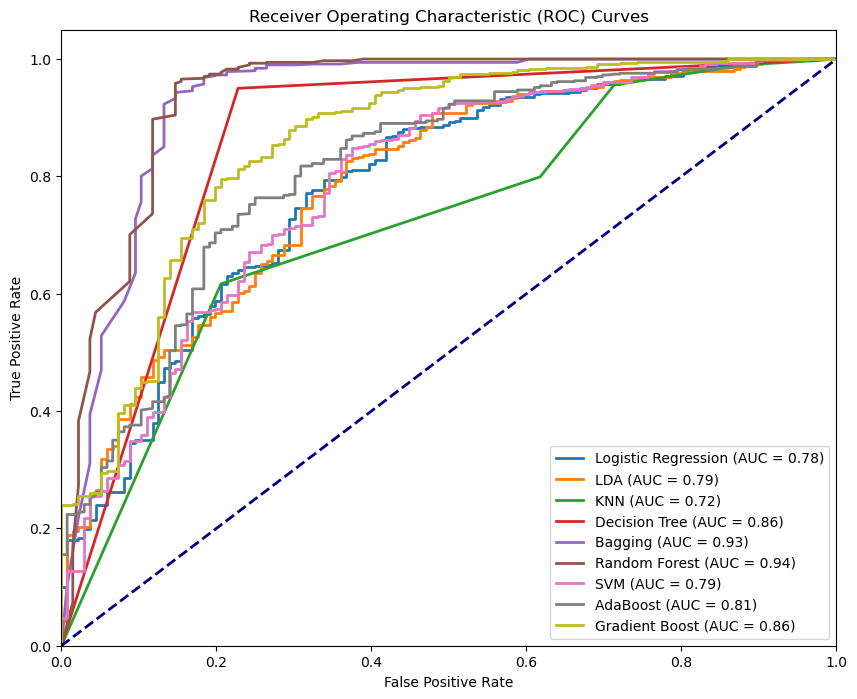

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X_test, y_test):
   
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        try:
            y_probs = model.predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, y_probs)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
        except AttributeError:
            print(f"Warning: {model_name} does not have a predict_proba method. Skipping.")

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

models = {
    'Logistic Regression': best_model,  # Use the best model from GridSearchCV
    'LDA': lda_model,
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'Bagging': bagging_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'AdaBoost': ada_model,
    'Gradient Boost': gb_model
}


plot_roc_curves(models, X_test4, y_test4)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy') 

# Fit the grid search to the training data
grid_search.fit(X_train4, y_train4)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_rf_model.predict(X_test4)
accuracy = accuracy_score(y_test4, y_pred)
print(f"Best Random Forest Model Accuracy: {accuracy}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Model Accuracy: 0.9498806682577565


In [71]:
# Predict on the whole dataset
y_pred_all = best_rf_model.predict(X)

# Create a new DataFrame with predictions
results_df = pd.DataFrame({'Predicted_Values': y_pred_all})

# Concatenate predictions with original dataset
final_df = pd.concat([X, results_df], axis=1)

# Export to Excel
final_df.to_excel('predicted_values.xlsx', index=False) 

In [72]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

win_pred1 = win_pred.copy()

# Label Encoding for categorical features
categorical_cols = win_pred1.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    win_pred1[col] = label_encoder.fit_transform(win_pred1[col])

# Print the mapping for each column
for col in categorical_cols:
    unique_values = win_pred[col].unique() # Use the original win_pred for original values
    encoded_values = win_pred1[col].unique()
    print(f"Label Encoding for column '{col}':")
    mapping_dict = dict(zip(unique_values, encoded_values))
    for key, value in mapping_dict.items():
      print(f"  {key} : {value}")
    print("-" * 20)

Label Encoding for column 'Game_number':
  Game_1 : 0
  Game_2 : 1049
  Game_3 : 2049
  Game_4 : 2157
  Game_5 : 2264
  Game_6 : 2370
  Game_7 : 2478
  Game_8 : 2583
  Game_9 : 2689
  Game_10 : 1
  Game_11 : 108
  Game_12 : 217
  Game_13 : 321
  Game_14 : 427
  Game_15 : 528
  Game_16 : 631
  Game_17 : 735
  Game_18 : 838
  Game_19 : 944
  Game_20 : 1050
  Game_21 : 1154
  Game_22 : 1256
  Game_23 : 1361
  Game_24 : 1470
  Game_25 : 1576
  Game_27 : 1791
  Game_28 : 1899
  Game_29 : 2008
  Game_30 : 2050
  Game_31 : 2061
  Game_32 : 2071
  Game_33 : 2082
  Game_34 : 2093
  Game_35 : 2104
  Game_36 : 2115
  Game_37 : 2125
  Game_38 : 2136
  Game_39 : 2146
  Game_40 : 2158
  Game_41 : 2169
  Game_42 : 2179
  Game_43 : 2190
  Game_44 : 2200
  Game_45 : 2211
  Game_46 : 2221
  Game_47 : 2232
  Game_48 : 2243
  Game_49 : 2253
  Game_51 : 2274
  Game_52 : 2285
  Game_53 : 2296
  Game_54 : 2306
  Game_55 : 2317
  Game_56 : 2327
  Game_57 : 2338
  Game_58 : 2348
  Game_59 : 2359
  Game_60 : 23

### 1 Test match with England in England. All the match are day matches. In England, it will be rainy season at the time to match.  
### 2 T20 match with Australia in India. All the match are Day and Night matches. In India, it will be winter season at the time to match.
### 2 ODI match with Sri Lanka in India. All the match are Day and Night matches. In India, it will be winter season at the time to match.
### To predict this matches we don't have the dataset to evaluate. Thus i am creating a new dataframe for the above match scenario

In [73]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train4, y_train4)

# In the prediction section for the India vs. England match:
# Create X_new as before, including the team composition features.
# We can change the parameter in the below dataframe to check the probability of win & loss
X_new = pd.DataFrame({
    'Opponent': ['England'],
    'Match_light_type': ['Day'],
    'Match_format': ['Test'],
    'Season': ['Rainy'],
    'Offshore': ['Yes'],
    'Bowlers_in_team': [3], 
    'All_rounder_in_team': [4],
    'Wicket_keeper_in_team': [1],
    'Avg_team_Age': [30],
    'First_selection': ['Batting'],
    'Max_run_scored_1over': [18],
    'Max_wicket_taken_1over': [2],
    'Extra_bowls_bowled': [20],
    'Min_run_given_1over': [6],
    'Min_run_scored_1over': [10],
    'Max_run_given_1over': [16],
    'extra_bowls_opponent': [4],
    'player_highest_run': [150],
    'Players_scored_zero': [2],
    'player_highest_wicket': [4]
})


# Reindexing to handle potential column mismatches
X_new = X_new.reindex(columns=X_train4.columns, fill_value=0)



categorical_cols = X_new.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    label_encoder.fit(win_pred[col]) # fit on training data
    X_new[col] = label_encoder.transform(X_new[col])
    

# Get predicted probabilities
y_prob_new = best_rf_model.predict_proba(X_new)

# Extract probabilities for win (class 1) and loss (class 0)
win_probability = y_prob_new[0, 1]  # Probability of class 1 (win)
loss_probability = y_prob_new[0, 0]  # Probability of class 0 (loss)

print(f"Probability of India Win in Test match Vs England in England: {win_probability:.4f}")
print(f"Probability of India Loss in Test match Vs England in England: {loss_probability:.4f}")

Probability of India Win in Test match Vs England in England: 0.8500
Probability of India Loss in Test match Vs England in England: 0.1500


In [74]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train4, y_train4)

# In the prediction section for the India vs. Sri Lanka match startegy 1:
# Create X_new as before, including the team composition features.
# We can change the parameter in the below dataframe to check the probability of win & loss
X_new = pd.DataFrame({
    'Opponent': ['Srilanka'],
    'Match_light_type': ['Day and Night'],
    'Match_format': ['ODI'],
    'Season': ['Winter'],
    'Offshore': ['No'],
    'Bowlers_in_team': [3], 
    'All_rounder_in_team': [4],
    'Wicket_keeper_in_team': [1],
    'Avg_team_Age': [30],
    'First_selection': ['Batting'],
    'Max_run_scored_1over': [18],
    'Max_wicket_taken_1over': [1],
    'Extra_bowls_bowled': [20],
    'Min_run_given_1over': [8],
    'Min_run_scored_1over': [10],
    'Max_run_given_1over': [16],
    'extra_bowls_opponent': [4],
    'player_highest_run': [100],
    'Players_scored_zero': [2],
    'player_highest_wicket': [5]
})


# Reindexing to handle potential column mismatches
X_new = X_new.reindex(columns=X_train4.columns, fill_value=0)



categorical_cols = X_new.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    label_encoder.fit(win_pred[col]) # fit on training data
    X_new[col] = label_encoder.transform(X_new[col])
    

# Get predicted probabilities
y_prob_new = best_rf_model.predict_proba(X_new)

# Extract probabilities for win (class 1) and loss (class 0)
win_probability = y_prob_new[0, 1]  # Probability of class 1 (win)
loss_probability = y_prob_new[0, 0]  # Probability of class 0 (loss)

print(f"Probability of India Win in ODI match Vs Sri Lanka in India: {win_probability:.4f}")
print(f"Probability of India Loss in ODI match Vs Sri Lanka in India: {loss_probability:.4f}")

Probability of India Win in ODI match Vs Sri Lanka in India: 0.8900
Probability of India Loss in ODI match Vs Sri Lanka in India: 0.1100


In [75]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train4, y_train4)

# In the prediction section for the India vs. Sri Lanka match startegy 2:
# Create X_new as before, including the team composition features.
# We can change the parameter in the below dataframe to check the probability of win & loss
X_new = pd.DataFrame({
    'Opponent': ['Srilanka'],
    'Match_light_type': ['Day and Night'],
    'Match_format': ['ODI'],
    'Season': ['Winter'],
    'Offshore': ['No'],
    'Bowlers_in_team': [3], 
    'All_rounder_in_team': [5],
    'Wicket_keeper_in_team': [1],
    'Avg_team_Age': [30],
    'First_selection': ['Bowling'],
    'Max_run_scored_1over': [16],
    'Max_wicket_taken_1over': [3],
    'Extra_bowls_bowled': [10],
    'Min_run_given_1over': [5],
    'Min_run_scored_1over': [10],
    'Max_run_given_1over': [16],
    'extra_bowls_opponent': [14],
    'player_highest_run': [120],
    'Players_scored_zero': [2],
    'player_highest_wicket': [5]
})


# Reindexing to handle potential column mismatches
X_new = X_new.reindex(columns=X_train4.columns, fill_value=0)



categorical_cols = X_new.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    label_encoder.fit(win_pred[col]) # fit on training data
    X_new[col] = label_encoder.transform(X_new[col])
    

# Get predicted probabilities
y_prob_new = best_rf_model.predict_proba(X_new)

# Extract probabilities for win (class 1) and loss (class 0)
win_probability = y_prob_new[0, 1]  # Probability of class 1 (win)
loss_probability = y_prob_new[0, 0]  # Probability of class 0 (loss)

print(f"Probability of India Win in ODI match Vs Sri Lanka in India: {win_probability:.4f}")
print(f"Probability of India Loss in ODI match Vs Sri Lanka in India: {loss_probability:.4f}")

Probability of India Win in ODI match Vs Sri Lanka in India: 0.9400
Probability of India Loss in ODI match Vs Sri Lanka in India: 0.0600


In [76]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train4, y_train4)


# In the prediction section for the India vs. Australia  startegy 1:
# Create X_new as before, including the team composition features.
# We can change the parameter in the below dataframe to check the probability of win & loss
X_new = pd.DataFrame({
    'Opponent': ['Australia'],
    'Match_light_type': ['Day and Night'],
    'Match_format': ['T20'],
    'Season': ['Winter'],
    'Offshore': ['No'],
    'Bowlers_in_team': [3], 
    'All_rounder_in_team': [4],
    'Wicket_keeper_in_team': [1],
    'Avg_team_Age': [30],
    'First_selection': ['Bowling'],
    'Max_run_scored_1over': [18],
    'Max_wicket_taken_1over': [2],
    'Extra_bowls_bowled': [3],
    'Min_run_given_1over': [6],
    'Min_run_scored_1over': [12],
    'Max_run_given_1over': [16],
    'extra_bowls_opponent': [4],
    'player_highest_run': [50],
    'Players_scored_zero': [2],
    'player_highest_wicket': [3]
})


# Reindexing to handle potential column mismatches
X_new = X_new.reindex(columns=X_train4.columns, fill_value=0)



categorical_cols = X_new.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    label_encoder.fit(win_pred[col]) # fit on training data
    X_new[col] = label_encoder.transform(X_new[col])
    

# Get predicted probabilities
y_prob_new = best_rf_model.predict_proba(X_new)

# Extract probabilities for win (class 1) and loss (class 0)
win_probability = y_prob_new[0, 1]  # Probability of class 1 (win)
loss_probability = y_prob_new[0, 0]  # Probability of class 0 (loss)

print(f"Probability of India Win in T20 match Vs Australia in India: {win_probability:.4f}")
print(f"Probability of India Loss in T20 match Vs Australia in India: {loss_probability:.4f}")

Probability of India Win in T20 match Vs Australia in India: 0.9250
Probability of India Loss in T20 match Vs Australia in India: 0.0750


In [77]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train4, y_train4)


# In the prediction section for the India vs. Australia  startegy 2:
# Create X_new as before, including the team composition features.
# We can change the parameter in the below dataframe to check the probability of win & loss
X_new = pd.DataFrame({
    'Opponent': ['Australia'],
    'Match_light_type': ['Day and Night'],
    'Match_format': ['T20'],
    'Season': ['Winter'],
    'Offshore': ['No'],
    'Bowlers_in_team': [3], 
    'All_rounder_in_team': [4],
    'Wicket_keeper_in_team': [1],
    'Avg_team_Age': [31],
    'First_selection': ['Batting'],
    'Max_run_scored_1over': [20],
    'Max_wicket_taken_1over': [2],
    'Extra_bowls_bowled': [3],
    'Min_run_given_1over': [10],
    'Min_run_scored_1over': [8],
    'Max_run_given_1over': [12],
    'extra_bowls_opponent': [4],
    'player_highest_run': [60],
    'Players_scored_zero': [2],
    'player_highest_wicket': [4]
})


# Reindexing to handle potential column mismatches
X_new = X_new.reindex(columns=X_train4.columns, fill_value=0)



categorical_cols = X_new.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    label_encoder.fit(win_pred[col]) # fit on training data
    X_new[col] = label_encoder.transform(X_new[col])
    

# Get predicted probabilities
y_prob_new = best_rf_model.predict_proba(X_new)

# Extract probabilities for win (class 1) and loss (class 0)
win_probability = y_prob_new[0, 1]  # Probability of class 1 (win)
loss_probability = y_prob_new[0, 0]  # Probability of class 0 (loss)

print(f"Probability of India Win in T20 match Vs Australia in India: {win_probability:.4f}")
print(f"Probability of India Loss in T20 match Vs Australia in India: {loss_probability:.4f}")

Probability of India Win in T20 match Vs Australia in India: 0.8950
Probability of India Loss in T20 match Vs Australia in India: 0.1050


### Conclusion



### Strategies:

In Indian team, select all-rounders of minimum 3 members and bowlers of minimum of 3 members will ensure the Indian team to win the matches across any formats.

### Test Match Strategy (With England in England, Rainy Season):
1. Prioritize strong batting lineup: given the rainy conditions, batting first and setting up a competitive total is key.
2. Utilize all-rounders: Select all-rounders who can contribute with both bat and ball, providing balance in challenging conditions.
3. Adapt to pitch conditions: have spin bowling option to capitalize on the conditions.
4. Strong opening partnership: The opening pair should aim to get a quick start to put pressure on the opponents.
5. Rotate bowlers carefully: Use the bowlers according to pitch and weather conditions.

### T20 Match Strategy (With Australia in India, Winter):
1. Focus on explosive batting: given the shorter format and conducive weather, the team should focus on aggressive batting from the outset.
2. Quick wickets:  Focus on taking early wickets to put pressure on opposition batting.
3. Utilize spinners: The winter season may aid spinners, so a well-rounded spin attack could be crucial.
4. Death bowling: focus on yorkers and slower balls to restrict the run flow.
5. Agility and fielding: Maintain an extremely agile fielding strategy, crucial for run-saving and taking quick wickets.

### ODI Match Strategy (With Sri Lanka in India, Winter, Day/Night):
1. Utilize Spin Attack: Favor spinners, exploiting the slower, turning pitch likely due to the winter conditions.
2. Dew Factor: Plan for the dew factor during night matches (if significant), affecting both batting and bowling.
3. Consistent batting: Ensure consistent batting throughout the innings, preventing collapses.
4. Strong death bowling: focus on accurate yorkers to defend the total in the slog overs.
5. Analyze Sri Lanka's batting order: identify their strengths and weaknesses to tailor your bowling attack accordingly.

### Recommendation

I would suggest to get more data from the matches which india played against each opponet to get precise startegy, the following are the addtional information good to have to in the data for better modeling, 

Match Context Features:
- 'PitchConditions': Categorical (Dry, Wet, etc.). If data is available.
- 'OpponentStrength':  Assign a numerical value (or use one-hot encoding) reflecting the opponent's ranking or recent performance.

Head-to-Head:
- 'HeadToHeadWins': Number of recent wins against this opponent.

Player-Specific Metrics:
- Top batsman's average in last 5 matches.
- Top bowler's economy/strike rate.

Advanced Statistics:
- Run rate in the first 10 overs
- Wicket-taking rate in the middle overs
- Number of extras conceded
- Average partnership runs
- Percentage of runs scored from boundaries
- 'FirstSixOversRunRate': Runs scored in the first six overs.
- 'MiddleOversWicketRate': Wickets taken in overs 7-15 (or similar).
- 'DeathOversEconomyRate': Runs conceded in the death overs.
- 'PowerplayScore': Runs in the first powerplay.